# MOODS AND ACTIVITIES IN MUSIC

This is the final project for the course Social Research.
<br>The project objective is the analysis and visualisation of the results of a research conducted on music-evoked emotion based on the Geneva Emotional Music Scale (GEMS).

Web sources:
- *[Moods and activities in music](https://reshare.ukdataservice.ac.uk/852024/)*
- *[Tagging online music contents for emotion. A systematic approach based on contemporary emotion research](https://gtr.ukri.org/project/07306D39-7843-4C55-978A-55C6DE90D278#/tabOverview)*

### What is GEMS?

GEMS stands for the Geneva Emotional Music Scale. <br>
It is a rating measure that was developed to describe the emotional effects of music. GEMS aims to provide a comprehensive and systematic framework for understanding and categorizing the emotional experiences evoked by music.

The scale consists of a set of labels that represent different emotional dimensions. These labels capture various aspects of emotional experiences, such as happiness, sadness, anger, tenderness, and excitement, among others. The GEMS labels are designed to cover a wide range of emotional states that can be evoked by music.

The development of GEMS involved collecting ratings from participants who listened to a diverse set of music pieces and reported their emotional responses using the provided labels. Through statistical analysis and validation procedures, the researchers identified the most salient and recurrent emotional dimensions and their corresponding labels.

By using GEMS, researchers and professionals can assess and describe the emotional effects of music in a standardized and consistent manner. It provides a valuable tool for studying the emotional aspects of music, conducting research in fields like psychology, neuroscience, and musicology, and organizing and retrieving music based on emotional characteristics in online databases and catalogues.

The specific labels used in the GEMS scale may vary depending on the version and study, but here are some examples of emotional dimensions that the scale aims to capture:
1. Wonder: Reflecting a sense of awe, curiosity, or amazement.
2. Transcendence: Describing feelings of being transported or elevated.
3. Tenderness: Representing emotions associated with gentleness, care, or affection.
4. Nostalgia: Reflecting a longing for the past or sentimental feelings.
5. Peacefulness: Conveying a sense of calmness, serenity, or tranquility.
6. Power: Describing emotions related to strength, dominance, or empowerment.
7. Joyfulness: Representing feelings of happiness, cheerfulness, or delight.
8. Tension: Conveying a sense of anticipation, suspense, or unease.
9. Sadness: Reflecting emotions associated with sadness, melancholy, or grief.
10. Solemnity: Describing emotions related to seriousness, reverence, or dignity.

### DATA COLLECTION METHOD, DATA DESCRIPTION and SAMPLING

Data has been collected from 1 June 2014, untill 30 September 2015. <br>
Data was collected using crowdsourcing method executed on Crowdflower platform. <br>
Participants completed the background information and then completed as many rounds of human annotations tasks as they wished. <br>
1 round contained 3 sub-tasks: 
1) mood and activity tagging, 
2) track search and tagging, 
3) track tagging for moods and activities task.

These were designed to map various moods and activities related to music. <br>
Types of information obtained is given in further documentation: *[Information sheet](FinalProject\Documentation\Information_Sheet.docx)* <br>

Data consists of annotations of music in terms of moods music may express and activities that music might fit. <br>
The data structures are related to different kinds of annotation tasks, which addressed these questions: 
1) annotations of 9 activities that fit a wide range of moods related to music, 
2) nominations of music tracks that best fit the a particular mood and annotating the activities that fit them, and 
3) annotations of these nominated tracks in terms of mood and activities. Users are anonymised, but the background information (gender, music preferences, age, etc.) are also available. Dataset consists of relational database, that is linked together by means of common ids (tracks, users, activities, moods, genres, expertise, language skill).

Summary: 
- 2.508 participants,
- from 95 countries, 
- providing 18.559 responses to mood-to-activity tagging task,
- 8.681 responses to track search task, 
- yielding 5129 unique tracks,
- 28.550 responses to a track tagging task,
- 88 mood terms,
- 9 activities,
- 113 genres. <br>

Population and sample: <br>
Participants are harvested from a cloudsourcing platform. The benefit is to tap into a massive pool of people easily. <br>
Participants were explained about the purpose of the study and the anonymisation of their information and answers via a consent form that they had to accept in order to go on with the questionnaire: *[Consent form](FinalProject\Documentation\Consent_Form.docx)*

## GENERAL BACKGROUND QUESTIONNAIRES

1. General questions: Age, Gender (male, female, other), Musical expertise (Nonmusician, Music-loving nonmusician, Amateur musician, Serious amateur musician, Semi-professional musician, and Professional musician), and English language proficiency (No proficiency, Elementary proficiency, Limited working proficiency, Professional working proficiency, Full professional proficiency, and Native or bilingual proficiency).
2. A question <b>“Which musical genres do you like?”</b> with 16 main genre checkboxes that each opens a popup window that includes 8 sub-genre checkboxes. Selecting one of these boxes activates the corresponding main genre box. One or more genres need to be selected.
3. A question <b>“How important are the following types of activities in your life?”</b> with 5-point Likert-scale for 9 activities (1: Not at all ... 5: Extremely).
4. A question <b>“How important is music to you in the following types of activities?”</b> with identical scales as in the previous question.

 *[The research background questionnaire and explanation of main task](FinalProject\Documentation\Questionnaire_Form.docx)*


### ANALYSIS OF GENERAL QUESTIONS

First of all, I import the libraries needed for this project and the first file containing general background questions and save it into a dataframe structure to facilitate further operations.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import country_converter as coco
import plotly.graph_objects as go

In [72]:
df_users = pd.read_csv('Data/moods_and_activities_in_music/users.csv')

Secondly, I perform some basic operations to understand the dataset shape and characteristics.

In [73]:
df_users.shape

(2508, 7)

The first finding is that the users dataset contains 2508 rows, this can be interpreted as there were <b> 2508 participants </b> taking part in this research. <br>
Additionally, it can be said that the participants were asked <b> 7 questions </b>, namely:

In [6]:
df_users.columns.tolist()

['userid',
 'expertise',
 'language_skill',
 'gender',
 'age',
 'country',
 'continent']

In [74]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userid          2508 non-null   int64  
 1   expertise       2508 non-null   object 
 2   language_skill  2508 non-null   object 
 3   gender          2507 non-null   object 
 4   age             2380 non-null   float64
 5   country         2503 non-null   object 
 6   continent       2504 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 137.3+ KB


From the <code> info() </code> method we can see that: 1 person has left the information about the gender empty; 228 did not specify their age; 5 did not specify their country and 4 did not specify their continent.

Now, I want to have a quick insight on what kind of information the user is asked to share.

In [75]:
df_users.head(15)

,userid,expertise,language_skill,gender,age,country,continent
0,5,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe
1,6,1 Nonmusician,4 Professional working proficiency,female,27.0,PT,Europe
2,7,2 Music-loving nonmusician,4 Professional working proficiency,male,20.0,SK,Europe
3,8,2 Music-loving nonmusician,3 Limited working proficiency,male,28.0,IN,Asia
4,10,1 Nonmusician,1 No proficiency,male,24.0,AL,Europe
5,11,1 Nonmusician,3 Limited working proficiency,female,28.0,HR,Europe
6,12,1 Nonmusician,4 Professional working proficiency,male,25.0,IT,Europe
7,13,2 Music-loving nonmusician,3 Limited working proficiency,male,16.0,PK,Asia
8,14,2 Music-loving nonmusician,4 Professional working proficiency,male,26.0,PH,Asia
9,15,1 Nonmusician,2 Elementary proficiency,male,23.0,PK,Asia


So, I can say I have some information about the users age that I want to analyse more deeply. Then, it can be interesting to see some analysis based on gender. Some other analysis based on the continent or country and of course the level of expertise and english proficiency.

#### Users age

Let's start to analyse basic statistics from the sample population of respondent.

In [80]:
a = round(df_users['age'].mean(),1).astype(int)
b = df_users['age'].max().astype(int)
c = df_users['age'].min().astype(int)
d = df_users['age'].median().astype(int)
e = df_users['age'].var().astype(int)

print(f'The mean age is {a},\nthe older user is {b},\non the youngest is {c},\nthe median value is {d},\nand the variance is {e}.')


The mean age is 32,
the older user is 79,
on the youngest is 16,
the median value is 30,
and the variance is 103.


Let's call the <code>describe()</code> function that shows a summary of basic standard statistics.

In [81]:
df_users[['age','language_skill', 'expertise', 'gender','country', 'continent']].describe(include=[object, np.number])

,age,language_skill,expertise,gender,country,continent
count,2380.000000,2508,2508,2507,2503,2504
unique,NaN,6,6,3,94,6
top,NaN,3 Limited working proficiency,2 Music-loving nonmusician,male,IN,Europe
freq,NaN,649,1195,1786,214,1204
mean,32.013025,NaN,NaN,NaN,NaN,NaN
std,10.185059,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN


Let's see the age distribution of participant.

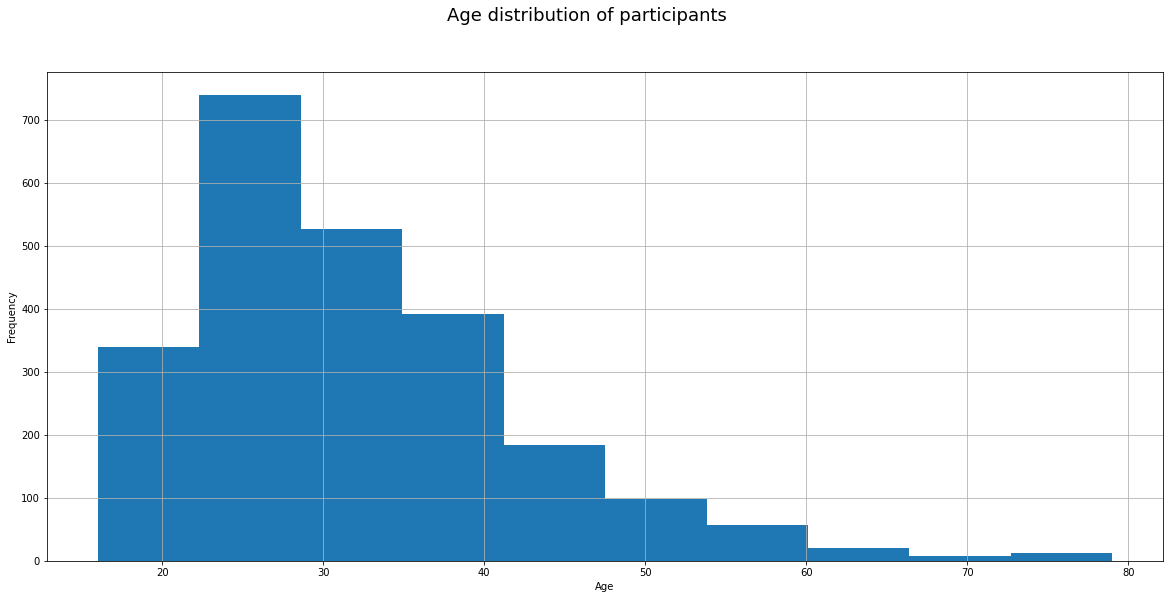

In [82]:
ax = df_users['age'].hist(figsize=(20,9))
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.suptitle('Age distribution of participants', fontsize=(18))
plt.show()

#### Users musical expertise level

It's interesting to further investigate the expertise level of users. <br>
Therefore, I count the values in the expertise column and then calculate the percentage of the total.

In [83]:
count_users = df_users['expertise'].value_counts()
percentage_users = round(df_users['expertise'].value_counts(normalize=True),2)


show_expertise = pd.concat(
    [count_users,percentage_users], 
    axis = 1, 
    keys = ('Count', 'Percentage')
)
show_expertise

,Count,Percentage
2 Music-loving nonmusician,1195,0.48
1 Nonmusician,658,0.26
3 Amateur musician,427,0.17
4 Serious amateur musician,107,0.04
5 Semi-professional musician,73,0.03
6 Professional musician,48,0.02


Let's plot this information in a pie chart, to have a graphical more friendly representation.

In [84]:
fig = px.pie(df_users, values=count_users.values, names=count_users.index)
fig.update_traces(textinfo='percent')
fig.update_layout(title_text='Distribution of users expertise')
fig.show()

At first glance we can see that almost half of the participants in the experiment are non musicians, who love music, followed by non musicians and amateur musicians.

Now, we might be interested in seeing how the expertise level is distributed between male and female users. <br>
Therefore, I start by aggregating the values by expertise and gender. And then calulate the percentage over the aggregated values.


In [85]:
aggregate_gender = df_users.groupby(['expertise','gender']).agg({'userid':'count'})
aggregate_gender.rename(columns = {'userid':'user count'}, inplace = True)

In [86]:
aggregate_gender['user percentage'] = round(aggregate_gender.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
aggregate_gender

user count  user percentage
expertise                    gender                             
1 Nonmusician                female         196            29.83
                             male           461            70.17
2 Music-loving nonmusician   female         389            32.55
                             male           806            67.45
3 Amateur musician           female          86            20.14
                             male           339            79.39
                             other            2             0.47
4 Serious amateur musician   female          22            20.56
                             male            84            78.50
                             other            1             0.93
5 Semi-professional musician female          14            19.18
                             male            59            80.82
6 Professional musician      female          11            22.92
                             male            37            77.08

From a first glance at the data we can see that the majority of participants are men. <br>
Now, I reset the index to be able to plot the data in a bar chart to better visualise the distribution.

In [87]:
aggregate_gender = aggregate_gender.reset_index()

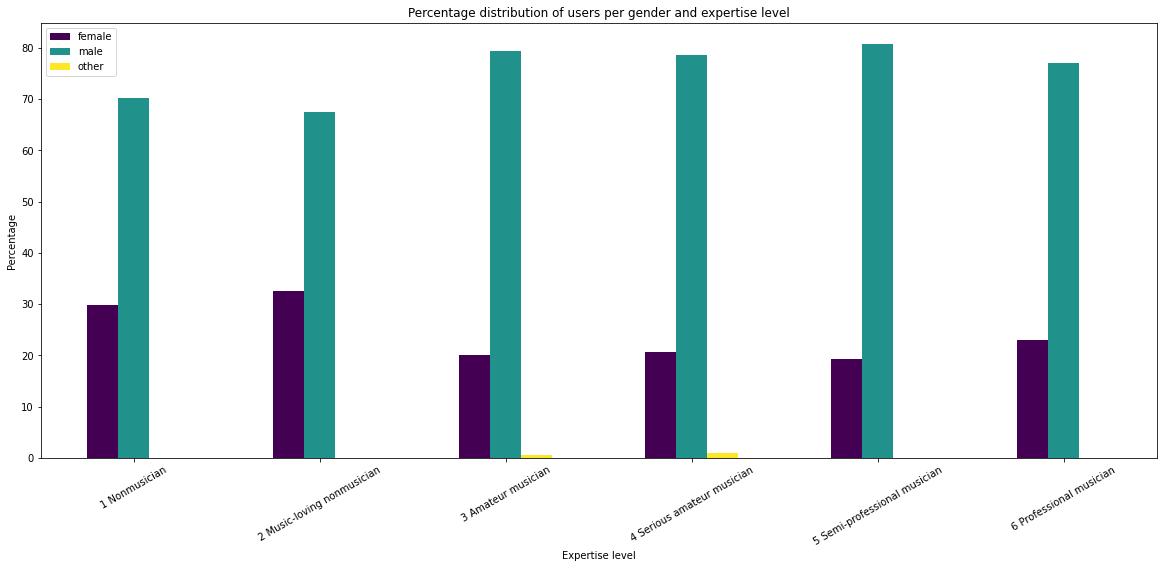

In [88]:
plotpivot = pd.pivot_table(aggregate_gender, index='expertise', columns='gender', values='user percentage')
ax = plotpivot.plot.bar(rot=30, figsize=(20,8), colormap='viridis')
ax.set_xlabel('Expertise level')
ax.set_ylabel('Percentage')
ax.set_title('Percentage distribution of users per gender and expertise level')
ax.legend(loc='upper left')
plt.show()

#### Users continent and country

Another interesting aspect is to understand which country the users are from. <br>
From the <code>info()</code> method called before, I remember we had 5 users who did not specify their origin country. In order to go on with the analysis I have to transform this missing information into something meaningful. The best choice in this case is to create a new temporary dataset and drop the null rows, since we just want to investigate the distribution of partecipants to the experiment.

In [103]:
df_users[['country', 'continent']].isnull().sum()

country      5
continent    4
dtype: int64

In [104]:
df_users_country = df_users[(df_users['country']!="null")].dropna()
# Let's check again
#df_users[['country', 'continent']].isnull().sum()

Let's start with the distribution per continent.

In [105]:
count_users_continent = df_users_country['continent'].value_counts()
percentage_users_continent = round(df_users_country['continent'].value_counts(normalize=True),2)


show_continent = pd.concat(
    [count_users_continent, percentage_users_continent], 
    axis = 1, 
    keys = ('Count', 'Percentage')
)
show_continent

,Count,Percentage
Europe,1153,0.49
Asia,668,0.28
South America,281,0.12
North America,212,0.09
Africa,52,0.02
Oceania,8,0.00


In [373]:
fig = px.pie(df_users_country, values=count_users_continent.values, names=percentage_users_continent.index)
fig.update_traces(textinfo='percent')
fig.update_layout(title_text='Distribution of participants per continent')
fig.show(figsize=(10,10))

The majority of respondents are in Europe, Asia and South America.

Now, we are interested in the count of respondent per country. To do this we have to aggregate the data by country. <br>
It is nice to see this plotted on a world map. To do so, we have to first transform the format of the country from <i>ISO3166-1-Alpha-2</i> to <i>ISO3</i>, the format accepted from the <code> plotly.express </code> python package. And then proceed with the aggragation operation. <br>
<code>country_converter</code> is a python packeage that converts formats of countries.

In [106]:
df_users_country['country ISO3'] = coco.convert(names=df_users_country['country'], to='ISO3')
df_users_country['country names'] = coco.convert(names=df_users_country['country'], to='name_short')

In [107]:
df_users_country.head(10)

,userid,expertise,language_skill,gender,age,country,continent,country ISO3,country names
0,5,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,GBR,United Kingdom
1,6,1 Nonmusician,4 Professional working proficiency,female,27.0,PT,Europe,PRT,Portugal
2,7,2 Music-loving nonmusician,4 Professional working proficiency,male,20.0,SK,Europe,SVK,Slovakia
3,8,2 Music-loving nonmusician,3 Limited working proficiency,male,28.0,IN,Asia,IND,India
4,10,1 Nonmusician,1 No proficiency,male,24.0,AL,Europe,ALB,Albania
5,11,1 Nonmusician,3 Limited working proficiency,female,28.0,HR,Europe,HRV,Croatia
6,12,1 Nonmusician,4 Professional working proficiency,male,25.0,IT,Europe,ITA,Italy
7,13,2 Music-loving nonmusician,3 Limited working proficiency,male,16.0,PK,Asia,PAK,Pakistan
8,14,2 Music-loving nonmusician,4 Professional working proficiency,male,26.0,PH,Asia,PHL,Philippines
9,15,1 Nonmusician,2 Elementary proficiency,male,23.0,PK,Asia,PAK,Pakistan


In [112]:
df_users_country_group = df_users_country.groupby(['country ISO3', 'country names']).agg({'userid':'count'})
df_users_country_group.rename(columns = {'userid':'user count'}, inplace = True)

Let's check if everything is fine:

In [114]:
df_users_country_group = df_users_country_group.sort_values(['user count']).reset_index()
df_users_country_group.tail(25)

,country ISO3,country names,user count
69,DEU,Germany,33
70,HRV,Croatia,33
71,ARG,Argentina,34
72,POL,Poland,36
73,UKR,Ukraine,36
74,GRC,Greece,41
75,VNM,Vietnam,42
76,MEX,Mexico,44
77,RUS,Russia,45
78,BRA,Brazil,50


And now, we can plot the information on a choroplet map.

In [115]:
fig = px.choropleth(df_users_country_group,   
    locationmode='ISO-3',
    locations='country ISO3',
    color='user count',
    featureidkey="userid",
    hover_name = 'country names',
    hover_data=['user count', "country ISO3"],
    color_continuous_scale='algae'
)
fig.update_layout(paper_bgcolor=None, plot_bgcolor=None, height=500, width=1200)
fig.show()

So, the majority of partecipants comes from India, Bosnia Herzegovina, Venezuela, Spain, Serbia, Turkie, USA, etc.

#### Users English language proficiency and age

Another interesting aspect to analyse is the age distribution of respondent. <br>
From the <code> info() </code> method called before, I remember we have 128 users who did not specify their age.

In [117]:
df_users['age'].isnull().sum()

128

In order to treat this case, we will fill this missing information with the average of the respondents age.

In [118]:
age_avg = df_users['age'].mean()
age_avg

32.01302521008403

In [119]:
df_users['age'] = df_users['age'].fillna(age_avg)
#Let's check for correctness
#df_users['age'].isnull().sum()

Now we can start with the grouping. <br>
Firstly I am putting participants together into 6 age-groups.

In [120]:
#Function definition to create the groups for the assignment of users.
def age_group(age):
    
    int_age = int(age)
    
    if int_age < 20:
        group = '<20'

    if int_age in range(20, 30):
       group = '20-29'

    if int_age in range(30, 40):
        group = '30-39'
        
    if int_age in range(40, 50):
        group = '40-49'
        
    if int_age in range(50, 60):
        group = '50-59'
   
    if int_age >= 60:
        group = '60+'
        
    return group

In [121]:
df_users['age_group'] = df_users['age'].apply(age_group)
df_users.head(10)

,userid,expertise,language_skill,gender,age,country,continent,age_group
0,5,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
1,6,1 Nonmusician,4 Professional working proficiency,female,27.0,PT,Europe,20-29
2,7,2 Music-loving nonmusician,4 Professional working proficiency,male,20.0,SK,Europe,20-29
3,8,2 Music-loving nonmusician,3 Limited working proficiency,male,28.0,IN,Asia,20-29
4,10,1 Nonmusician,1 No proficiency,male,24.0,AL,Europe,20-29
5,11,1 Nonmusician,3 Limited working proficiency,female,28.0,HR,Europe,20-29
6,12,1 Nonmusician,4 Professional working proficiency,male,25.0,IT,Europe,20-29
7,13,2 Music-loving nonmusician,3 Limited working proficiency,male,16.0,PK,Asia,<20
8,14,2 Music-loving nonmusician,4 Professional working proficiency,male,26.0,PH,Asia,20-29
9,15,1 Nonmusician,2 Elementary proficiency,male,23.0,PK,Asia,20-29


Let's plot the results for a visual understanging of the data.

In [122]:
language_grouped = df_users.groupby(['age_group','language_skill']).agg({'userid':'count'})
language_grouped.rename(columns = {'userid':'user count'}, inplace = True)
language_grouped['user percentage'] = round(language_grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
language_grouped

user count  user percentage
age_group language_skill                                                 
20-29     1 No proficiency                            84             7.84
          2 Elementary proficiency                   201            18.77
          3 Limited working proficiency              286            26.70
          4 Professional working proficiency         264            24.65
          5 Full professional proficiency            132            12.32
          6 Native or bilingual proficiency          104             9.71
30-39     1 No proficiency                            53             6.09
          2 Elementary proficiency                   196            22.53
          3 Limited working proficiency              218            25.06
          4 Professional working proficiency         229            26.32
          5 Full professional proficiency             90            10.34
          6 Native or bilingual proficiency           84             9.66
40-49     1 No proficiency                            25             7.79
          2 Elementary proficiency                    84            26.17
          3 Limited working proficiency               76            23.68
          4 Professional working proficiency          77            23.99
          5 Full professional proficiency             19             5.92
          6 Native or bilingual proficiency           40            12.46
50-59     1 No proficiency                             3             2.83
          2 Elementary proficiency                    16            15.09
          3 Limited working proficiency               29            27.36
          4 Professional working proficiency          17            16.04
          5 Full professional proficiency             12            11.32
          6 Native or bilingual proficiency           29            27.36
60+       1 No proficiency                             3             6.52
          2 Elementary proficiency                    16            34.78
          3 Limited working proficiency               10            21.74
          4 Professional working proficiency          10            21.74
          5 Full professional proficiency              1             2.17
          6 Native or bilingual proficiency            6            13.04
<20       1 No proficiency                            10            10.64
          2 Elementary proficiency                    19            20.21
          3 Limited working proficiency               30            31.91
          4 Professional working proficiency          21            22.34
          5 Full professional proficiency              3             3.19
          6 Native or bilingual proficiency           11            11.70

Let's reset the index and create an order variable for the plotting.

In [123]:
language_grouped = language_grouped.reset_index()

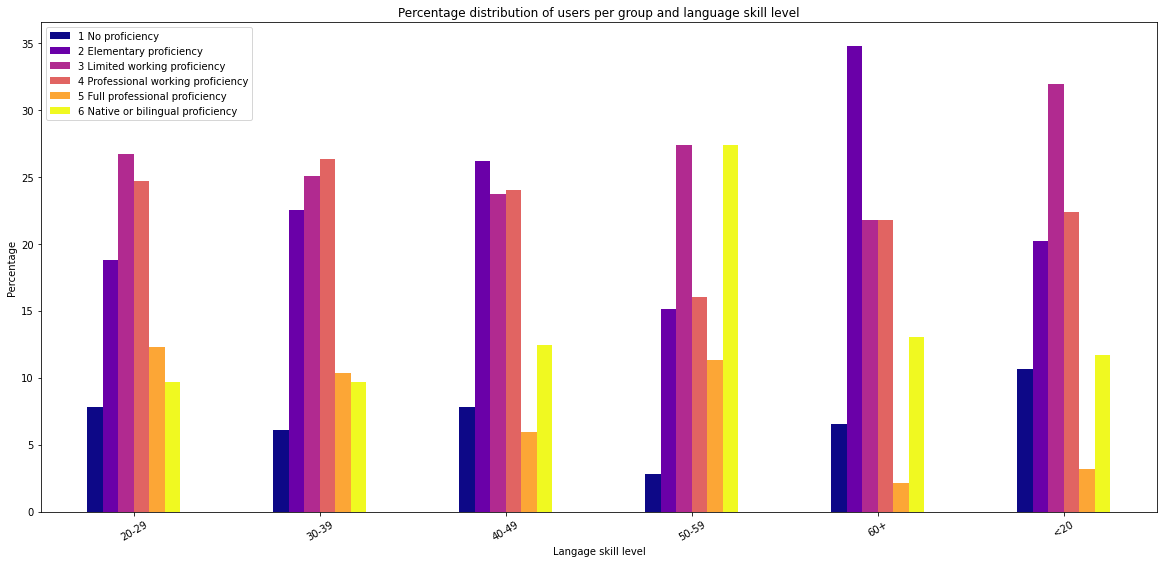

In [124]:
plotpivot = pd.pivot_table(language_grouped, index='age_group', columns='language_skill', values='user percentage')
ax = plotpivot.plot.bar(rot=30, figsize=(20,9), colormap='plasma')
ax.set_xlabel('Langage skill level')
ax.set_ylabel('Percentage')
ax.set_title('Percentage distribution of users per group and language skill level')
ax.legend(loc='upper left')
plt.show()

Since from a previous analysis we know that the majority of respondent comes from India, I expect that most of the proficient in english users are located there. <br>
Let's see

In [125]:
continent_grouped = df_users.groupby(['continent','language_skill']).agg({'userid':'count'})
continent_grouped.rename(columns = {'userid':'user count'}, inplace = True)
continent_grouped['user percentage'] = round(continent_grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
continent_grouped

user count  user percentage
continent     language_skill                                                 
Africa        1 No proficiency                             3             5.17
              2 Elementary proficiency                    14            24.14
              3 Limited working proficiency               19            32.76
              4 Professional working proficiency          14            24.14
              5 Full professional proficiency              5             8.62
              6 Native or bilingual proficiency            3             5.17
Asia          1 No proficiency                            45             6.28
              2 Elementary proficiency                   115            16.04
              3 Limited working proficiency              196            27.34
              4 Professional working proficiency         226            31.52
              5 Full professional proficiency             95            13.25
              6 Native or bilingual proficiency           40             5.58
Europe        1 No proficiency                            99             8.22
              2 Elementary proficiency                   306            25.42
              3 Limited working proficiency              327            27.16
              4 Professional working proficiency         265            22.01
              5 Full professional proficiency             94             7.81
              6 Native or bilingual proficiency          113             9.39
North America 1 No proficiency                             5             2.23
              2 Elementary proficiency                    25            11.16
              3 Limited working proficiency               27            12.05
              4 Professional working proficiency          36            16.07
              5 Full professional proficiency             40            17.86
              6 Native or bilingual proficiency           91            40.62
Oceania       4 Professional working proficiency           2            25.00
              6 Native or bilingual proficiency            6            75.00
South America 1 No proficiency                            25             8.53
              2 Elementary proficiency                    71            24.23
              3 Limited working proficiency               80            27.30
              4 Professional working proficiency          74            25.26
              5 Full professional proficiency             22             7.51
              6 Native or bilingual proficiency           21             7.17

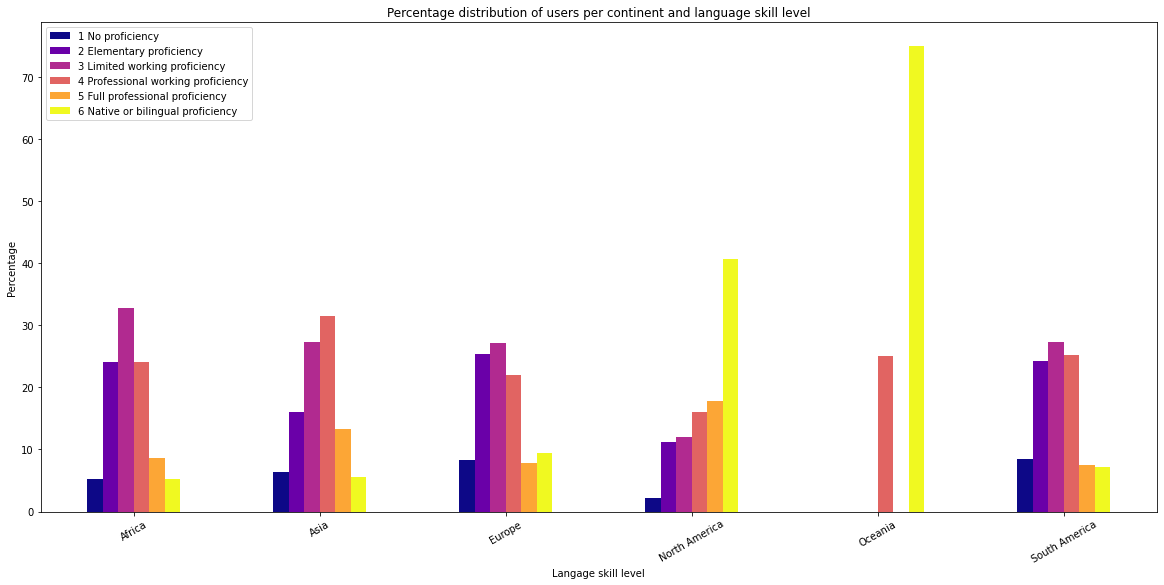

In [332]:
plotpivot = pd.pivot_table(continent_grouped, index='continent', columns='language_skill', values='user percentage')
ax = plotpivot.plot.bar(rot=30, figsize=(20,9), colormap='plasma')
ax.set_xlabel('Langage skill level')
ax.set_ylabel('Percentage')
ax.set_title('Percentage distribution of users per continent and language skill level')
ax.legend(loc='upper left')
plt.show()

In [333]:
country_grouped = df_users.groupby(['country','language_skill']).agg({'userid':'count'})
country_grouped.rename(columns = {'userid':'user count'}, inplace = True)
country_grouped['user percentage'] = round(country_grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
country_grouped = country_grouped.reset_index()

In [334]:
country_grouped.loc[country_grouped['country'] == 'IN']

,country,language_skill,user count,user percentage
145,IN,1 No proficiency,13,6.07
146,IN,2 Elementary proficiency,31,14.49
147,IN,3 Limited working proficiency,60,28.04
148,IN,4 Professional working proficiency,62,28.97
149,IN,5 Full professional proficiency,38,17.76
150,IN,6 Native or bilingual proficiency,10,4.67


In [335]:
country_grouped.loc[country_grouped['country'] == 'IT']

,country,language_skill,user count,user percentage
151,IT,1 No proficiency,2,2.86
152,IT,2 Elementary proficiency,9,12.86
153,IT,3 Limited working proficiency,29,41.43
154,IT,4 Professional working proficiency,19,27.14
155,IT,5 Full professional proficiency,7,10.00
156,IT,6 Native or bilingual proficiency,4,5.71


In [336]:
country_grouped.loc[country_grouped['country'] == 'ES']

,country,language_skill,user count,user percentage
93,ES,1 No proficiency,13,8.97
94,ES,2 Elementary proficiency,55,37.93
95,ES,3 Limited working proficiency,43,29.66
96,ES,4 Professional working proficiency,27,18.62
97,ES,5 Full professional proficiency,5,3.45
98,ES,6 Native or bilingual proficiency,2,1.38


As expected, India has more users proficient in english than Italy or Spain. <br>
This can influence the result of the mood tagging, because there can be difficulties in understanding the questionnaire questions or mood or activities prompted to the user. <br>
Moreover, I think that the understanding of the lyrics of a song have an influence on the mood associated to it.

### ANALYSIS OF BACKGROUND QUESTIONS

#### Which musical genres do you like?

First of all, as usual, I import the data, and give a first look at the shape and the info of the dataset.

In [126]:
df_genres = pd.read_csv('Data/moods_and_activities_in_music/bg_genres.csv')

In [127]:
df_genres.shape

(2508, 113)

In [340]:
df_genres.head(10)

,userid,genre.a_cappella,genre.acid_jazz,genre.alternative,genre.alternative_country,genre.alternative_rock,genre.ambient,genre.anime,genre.baroque,genre.bluegrass,...,genre.tango,genre.thrash_metal,genre.turntablism,genre.underground_hip_hop,genre.underground_rap,genre.video_game_music,genre.violin,genre.vocal_jazz,genre.world,genre.worship
0,5,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I want to see in a list form how many genres are represented as columns in the dataset.

In [341]:
df_genres.columns.tolist()

['userid',
 'genre.a_cappella',
 'genre.acid_jazz',
 'genre.alternative',
 'genre.alternative_country',
 'genre.alternative_rock',
 'genre.ambient',
 'genre.anime',
 'genre.baroque',
 'genre.bluegrass',
 'genre.blues',
 'genre.blues_rock',
 'genre.bossa_nova',
 'genre.broadway',
 'genre.celtic',
 'genre.chicago_blues',
 'genre.choral',
 'genre.christian_rock',
 'genre.christmas',
 'genre.classic_rock',
 'genre.classical',
 'genre.contemporary_classical',
 'genre.country',
 'genre.country_rock',
 'genre.dancehall',
 'genre.death_metal',
 'genre.delta_blues',
 'genre.disco',
 'genre.doujin',
 'genre.dub',
 'genre.easy_listening',
 'genre.electric_blues',
 'genre.electro',
 'genre.electronic',
 'genre.electronica',
 'genre.emo',
 'genre.enka',
 'genre.experimental',
 'genre.flamenco',
 'genre.folk',
 'genre.folk_rock',
 'genre.funk',
 'genre.garage_rock',
 'genre.gospel',
 'genre.grime',
 'genre.grunge',
 'genre.hard_rock',
 'genre.hardcore',
 'genre.harmonica_blues',
 'genre.heavy_metal'

So, from this first insight the 2.508 users are asked to rate 113 genres.

I pick <i>the harmonica_blues</i> column as an example, to understend how many values are stored in the rows, i.e. which answers the respondent gave to the question.

In [342]:
df_genres['genre.harmonica_blues'].value_counts()

0    2449
1      59
Name: genre.harmonica_blues, dtype: int64

From this first insight we understand that each column represents a <b>music genre</b> and the row values are <b>either 0 or 1</b>, i.e. dislike or like the genre respectively.

#### Genre clustering


A very interesting thing to do when dealing with a large set of columns like the one above, is to find similarity and cluster them into smaller groups, reducing the dimensionality of the data. It's clear that genres are similar with eachother, and so a EFA is a smart choice in order to facilitate the future analysis and visualisations.

In [130]:
df_genres[df_genres.columns[1:113]]

,genre.a_cappella,genre.acid_jazz,genre.alternative,genre.alternative_country,genre.alternative_rock,genre.ambient,genre.anime,genre.baroque,genre.bluegrass,genre.blues,...,genre.tango,genre.thrash_metal,genre.turntablism,genre.underground_hip_hop,genre.underground_rap,genre.video_game_music,genre.violin,genre.vocal_jazz,genre.world,genre.worship
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2505,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2506,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


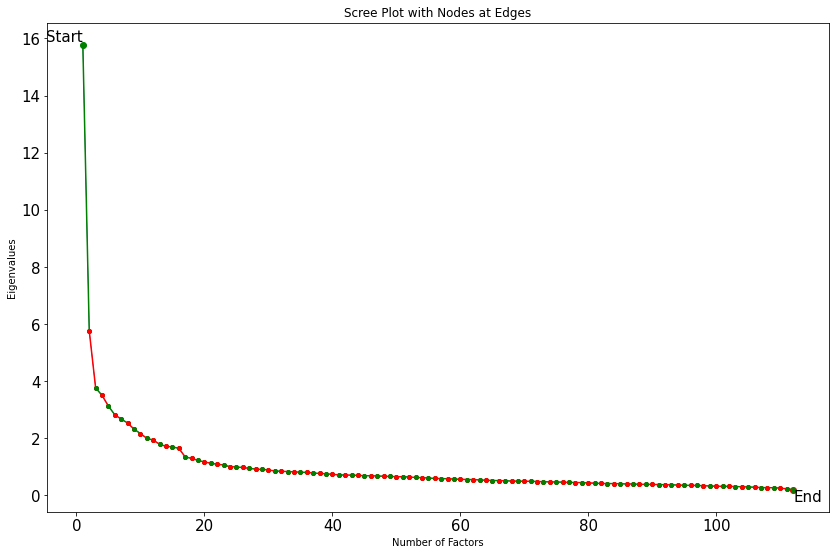

In [131]:
from factor_analyzer import FactorAnalyzer

fig = plt.figure(figsize=(14, 9))

x = df_genres[df_genres.columns[1:113]]

fa = FactorAnalyzer()
fa.fit(x)

# Get Eigen values and plot them
ev,v= fa.get_eigenvalues()

# Plot the line graph
plt.plot(range(1, x.shape[1] + 1), ev, 'b-', linewidth=0.5)

# Add markers at the edges
plt.plot(1, ev[0], 'go', label='Start', markersize=6)
plt.plot(x.shape[1], ev[-1], 'ro', label='End', markersize=6)

# Add nodes between the lines at edges
for i in range(1, x.shape[1]):
    color = 'r' if i % 2 == 0 else 'g'  # Alternate colors between red and green
    plt.plot([i, i + 1], [ev[i - 1], ev[i]], color=color, linestyle='-', marker='o', markersize=4)

# Add text annotations for 'Start' and 'End' with customized font properties
plt.text(1, ev[0], 'Start', ha='right', va='bottom', fontsize=15)
plt.text(x.shape[1], ev[-1], 'End', ha='left', va='top', fontsize=15)

# Set labels and title
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot with Nodes at Edges')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

# Show the plot
plt.show()

In [132]:
Fa_Ana = FactorAnalyzer(16, rotation='varimax', method='principal')
#Rotation Aim:It aims to simplify the factor structure and make the factors more orthogonal (uncorrelated)
Fa_Ana.fit(x)
loads = Fa_Ana.loadings_
print(loads)
#Factor loadings represent the correlations between the observed variables and the latent factors extracted from the analysis.
#These loadings indicate the strength and direction of the relationship between each variable (Feature) and each factor.
#a matrix where the rows represent the observed variables and the columns represent the extracted factors. 

[[ 0.13976622  0.02901215  0.10864875 ...  0.0819377  -0.00879492
   0.09209346]
 [ 0.54753299  0.08169372 -0.03352173 ...  0.10283663 -0.01737908
   0.09129641]
 [ 0.12839306  0.10137575  0.10675133 ...  0.0691304   0.09262786
   0.04199844]
 ...
 [ 0.57186658  0.02127319  0.09265821 ...  0.12051999  0.01188414
   0.18321161]
 [ 0.11356025  0.0426029   0.1329417  ...  0.57965956 -0.00856228
   0.15164454]
 [ 0.07365872 -0.04917934  0.05014226 ...  0.02618547 -0.01404389
   0.01082782]]


In [133]:
FactorLoading_DF = pd.DataFrame.from_records(loads)
FactorLoading_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.139766,0.029012,0.108649,0.011570,0.660762,0.079456,0.001993,0.015387,0.038420,0.006561,0.056028,0.042929,0.042741,0.081938,-0.008795,0.092093
1,0.547533,0.081694,-0.033522,0.074625,0.039362,0.069475,0.195252,0.083085,0.026883,0.140211,0.063723,0.099211,-0.005226,0.102837,-0.017379,0.091296
2,0.128393,0.101376,0.106751,0.087407,0.037036,0.058674,0.639363,0.124165,0.072916,-0.060754,0.069864,0.012430,0.063005,0.069130,0.092628,0.041998
3,0.124683,0.016280,0.061884,0.050558,0.070420,0.034001,0.114462,0.083828,0.089473,0.085458,0.618635,0.050268,0.062229,0.090111,-0.001497,0.071639
4,0.061366,0.165636,0.089591,0.038156,0.036004,0.057910,0.666968,0.135790,0.089822,-0.058428,0.042962,0.008084,0.017664,0.028290,0.236200,-0.009222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.077162,0.091145,0.036066,0.039802,0.035714,-0.009302,0.072438,0.192886,0.689167,0.035329,-0.001635,0.051663,-0.014356,0.047005,0.116239,0.093508
108,0.111210,0.071224,0.028225,0.051567,0.087195,0.097924,0.004054,0.028709,0.077051,0.007146,0.055481,-0.010091,0.047399,0.073927,0.045753,0.685004
109,0.571867,0.021273,0.092658,-0.005980,0.146636,0.202413,0.072441,0.014913,0.059243,0.138885,0.076994,0.039969,0.090662,0.120520,0.011884,0.183212
110,0.113560,0.042603,0.132942,0.089836,0.043519,0.080790,0.040015,0.087248,0.050647,0.113016,0.118085,0.038976,0.006917,0.579660,-0.008562,0.151645


In [134]:
# Load the variable names (assuming they are in the same order as the columns in the factor loadings dataset)
variable_names = df_genres.iloc[:, 1:].columns.to_list()  # Replace with your actual variable names

# Create a dictionary to store the variables associated with each factor
factor_variables = {}

# Iterate over each factor and find the variables with the highest loadings
for factor in FactorLoading_DF.columns:
    factor_variables[factor] = []

    # Get the column of factor loadings for the current factor
    factor_loadings_column = FactorLoading_DF[factor]

    # Find the variables with the highest loadings for the current factor
    for i in range(len(factor_loadings_column)):
        if abs(factor_loadings_column[i]) >= 0.4:  # Replace 0.5 with your desired threshold for determining significant loadings
            factor_variables[factor].append(variable_names[i])

# Print the variables associated with each factor
for factor, variables in factor_variables.items():
    print(f"Factor {factor}: {variables}")

Factor 0: ['genre.acid_jazz', 'genre.blues', 'genre.chicago_blues', 'genre.jazz', 'genre.lounge', 'genre.nu_jazz', 'genre.smooth_jazz', 'genre.swing', 'genre.vocal_jazz']
Factor 1: ['genre.death_metal', 'genre.hard_rock', 'genre.hardcore', 'genre.heavy_metal', 'genre.metal', 'genre.metalcore', 'genre.thrash_metal']
Factor 2: ['genre.christmas', 'genre.disco', 'genre.easy_listening', 'genre.pop', 'genre.pop_rock', 'genre.romantic', 'genre.soft_rock']
Factor 3: ['genre.grime', 'genre.hip_hop', 'genre.rap', 'genre.spoken_word', 'genre.turntablism', 'genre.underground_hip_hop', 'genre.underground_rap']
Factor 4: ['genre.a_cappella', 'genre.choral', 'genre.christian_rock', 'genre.gospel', 'genre.medieval', 'genre.renaissance', 'genre.worship']
Factor 5: ['genre.bossa_nova', 'genre.flamenco', 'genre.latin', 'genre.mpb', 'genre.salsa', 'genre.samba', 'genre.tango']
Factor 6: ['genre.alternative', 'genre.alternative_rock', 'genre.garage_rock', 'genre.grunge', 'genre.indie_pop', 'genre.indie_ro

So the Factor Analysis I have performed suggests 16 clusters. <br>
Let's check the authors clusterization result and compare the two.

In [135]:
df_genre_clusters = pd.read_csv('Data/moods_and_activities_in_music/genreclusters.csv')

In [136]:
df_genre_clusters['cluster'].value_counts()

BLUES          7
CLASSICAL      7
COUNTRY        7
ELECTRONIC     7
FOLK           7
HIP_HOP        7
JAZZ           7
LATIN          7
METAL          7
POP            7
REGGAE         7
ROCK           7
SOUL           7
SOUNDTRACK     7
RELIGIOUS      7
ALTERNATIVE    7
Name: cluster, dtype: int64

In [137]:
df_genre_clusters.loc[df_genre_clusters['cluster'] == 'FOLK']

,genre,cluster
28,indie_folk,FOLK
29,world,FOLK
30,singer_songwriter,FOLK
31,celtic,FOLK
32,folk,FOLK
33,folk_rock,FOLK
34,neofolk,FOLK


It looks like the cluster created with the FactorAnalyzer package are quite correct. <br>
Let's analyse further and try to see some insight of which type of users are more interested in some genre.

#### Users analysis based on genres

In [138]:
#This cell performs an UNPIVOT operation, putting the columns as rows and storing the values of each previous column as a row value in a new one.

df_genre_unpivot = df_genres.melt(id_vars='userid', var_name='genre', value_name='like_or_not')
df_genre_unpivot['genre'].replace('genre.','',regex=True,inplace=True)

In [139]:
#let's check if the transformation worked correctly by testing with one user
df_genre_unpivot.loc[df_genre_unpivot['userid'] == 5]

,userid,genre,like_or_not
0,5,a_cappella,0
2508,5,acid_jazz,0
5016,5,alternative,1
7524,5,alternative_country,0
10032,5,alternative_rock,1
...,...,...,...
268356,5,video_game_music,0
270864,5,violin,0
273372,5,vocal_jazz,0
275880,5,world,0


Now, I perform a SQL basic JOIN operation to put together two tables/datasets using the primary key genre, in order to associate each users information with their preference on each genre. 

In [140]:
df_clusters = pd.merge( df_genre_unpivot, df_genre_clusters, how='left', on='genre' )

In [141]:
df_clusters.shape

(280896, 4)

Let's see which genres is preferred from respondent.
I filter only responses equal to 1, so the user likes the genre.

In [142]:
df_clusters_plot = df_clusters['cluster'].loc[df_clusters['like_or_not'] == 1].value_counts()
df_clusters_plot = df_clusters_plot.reset_index()

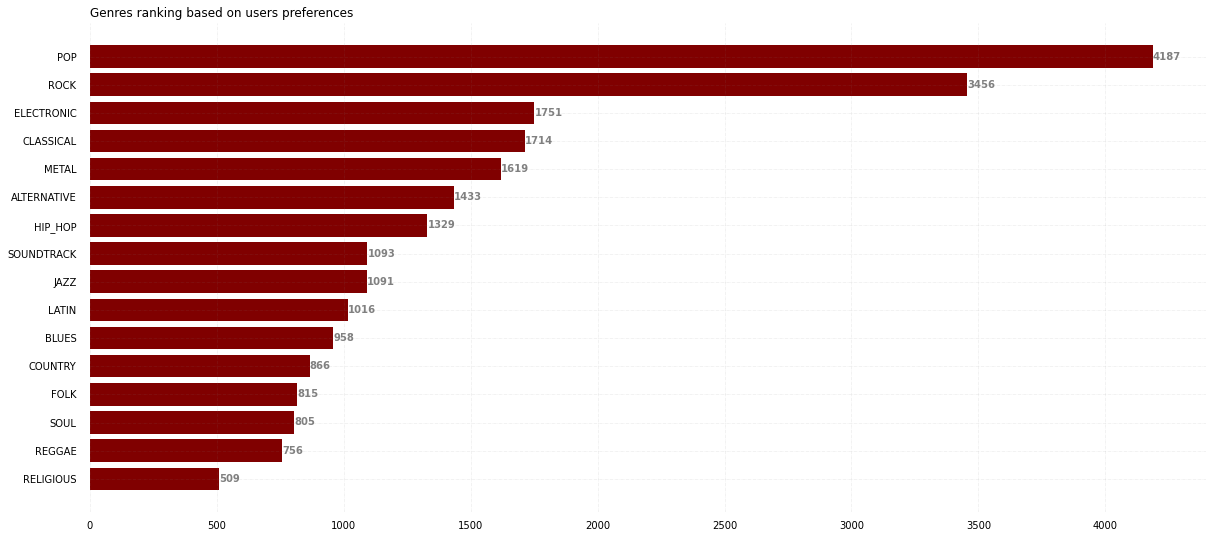

In [143]:
# Figure Size
fig, ax = plt.subplots(figsize =(20, 9))

# Horizontal Bar Plot
ax.barh(df_clusters_plot['index'],  df_clusters_plot['cluster'], color='maroon')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold', color ='grey')

# Add Plot Title
ax.set_title('Genres ranking based on users preferences', loc ='left', )

# Show Plot
plt.show()

As expected, the general ranking of genres sees the POP at the first place, the ROCK at second and ELECTRONIC at the third position.

Let's see which genres are the most popular in each age group of respondents.
As done before, the cluster dataframe is joined with the users dataframe using the userid key column.

In [144]:
df_users_and_clusters = pd.merge( df_clusters, df_users, how='left', on='userid' )

In [145]:
# Filter only liked genres by users
df_users_and_clusters = df_users_and_clusters.loc[df_clusters['like_or_not'] == 1]

In [146]:
df_users_and_clusters.head(15)

,userid,genre,like_or_not,cluster,expertise,language_skill,gender,age,country,continent,age_group
57,67,a_cappella,1,RELIGIOUS,1 Nonmusician,2 Elementary proficiency,male,19.000000,VE,South America,<20
167,196,a_cappella,1,RELIGIOUS,2 Music-loving nonmusician,4 Professional working proficiency,male,39.000000,HU,Europe,30-39
192,228,a_cappella,1,RELIGIOUS,3 Amateur musician,3 Limited working proficiency,male,19.000000,CZ,Europe,<20
234,279,a_cappella,1,RELIGIOUS,2 Music-loving nonmusician,3 Limited working proficiency,male,39.000000,IL,Asia,30-39
294,364,a_cappella,1,RELIGIOUS,3 Amateur musician,6 Native or bilingual proficiency,female,59.000000,JM,North America,50-59
308,389,a_cappella,1,RELIGIOUS,6 Professional musician,4 Professional working proficiency,male,38.000000,AR,South America,30-39
353,460,a_cappella,1,RELIGIOUS,1 Nonmusician,1 No proficiency,female,45.000000,BG,Europe,40-49
434,586,a_cappella,1,RELIGIOUS,3 Amateur musician,3 Limited working proficiency,female,40.000000,IT,Europe,40-49
462,638,a_cappella,1,RELIGIOUS,2 Music-loving nonmusician,6 Native or bilingual proficiency,male,31.000000,IN,Asia,30-39
478,665,a_cappella,1,RELIGIOUS,1 Nonmusician,4 Professional working proficiency,male,20.000000,RS,Europe,20-29


And now that the two dataframes are together, I can go on with finding prefreneces based on some groupings, like the gender, the musical expertise, the english proficiency, etc.

##### GENDER
Let's analyse preferences based on gender.

In [151]:
df_users_and_clusters_gender = df_users_and_clusters.groupby(['cluster','gender']).agg({'userid':'count'})
df_users_and_clusters_gender.rename(columns = {'userid':'count'}, inplace = True)
df_users_and_clusters_gender['percentage'] = round(df_users_and_clusters_gender.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
df_users_and_clusters_gender

count  percentage
cluster     gender                   
ALTERNATIVE female    534       37.26
            male      894       62.39
            other       5        0.35
BLUES       female    303       31.63
            male      653       68.16
            other       2        0.21
CLASSICAL   female    603       35.18
            male     1108       64.64
            other       3        0.18
COUNTRY     female    357       41.22
            male      508       58.66
            other       1        0.12
ELECTRONIC  female    381       21.76
            male     1368       78.13
            other       2        0.11
FOLK        female    296       36.41
            male      515       63.35
            other       2        0.25
HIP_HOP     female    329       24.76
            male      996       74.94
            other       4        0.30
JAZZ        female    388       35.56
            male      702       64.34
            other       1        0.09
LATIN       female    443       43.60
            male      573       56.40
METAL       female    306       18.90
            male     1305       80.61
            other       8        0.49
POP         female   1627       38.86
            male     2556       61.05
            other       4        0.10
REGGAE      female    227       30.03
            male      529       69.97
RELIGIOUS   female    186       36.54
            male      323       63.46
ROCK        female   1005       29.08
            male     2442       70.66
            other       9        0.26
SOUL        female    344       42.73
            male      461       57.27
SOUNDTRACK  female    384       35.23
            male      700       64.22
            other       6        0.55

In [149]:
df_users_and_clusters_gender.sort_values(by='percentage', ascending=False)

,,count,percentage
cluster,gender,,
METAL,male,1305,80.61
ELECTRONIC,male,1368,78.13
HIP_HOP,male,996,74.94
ROCK,male,2442,70.66
REGGAE,male,529,69.97
BLUES,male,653,68.16
CLASSICAL,male,1108,64.64
JAZZ,male,702,64.34
SOUNDTRACK,male,700,64.22


Now, I pivot the table in order to transform the rows of the gender index into columns containing the percentage of users who liked the genre of the genre index.

In [152]:
plotpivot_genre_gender= pd.pivot_table(df_users_and_clusters_gender, index='cluster', columns='gender', values='percentage')
plotpivot_genre_gender

gender,female,male,other
cluster,,,
ALTERNATIVE,37.26,62.39,0.35
BLUES,31.63,68.16,0.21
CLASSICAL,35.18,64.64,0.18
COUNTRY,41.22,58.66,0.12
ELECTRONIC,21.76,78.13,0.11
FOLK,36.41,63.35,0.25
HIP_HOP,24.76,74.94,0.30
JAZZ,35.56,64.34,0.09
LATIN,43.60,56.40,NaN


Let's see it in a bar chart graphical visualisation.

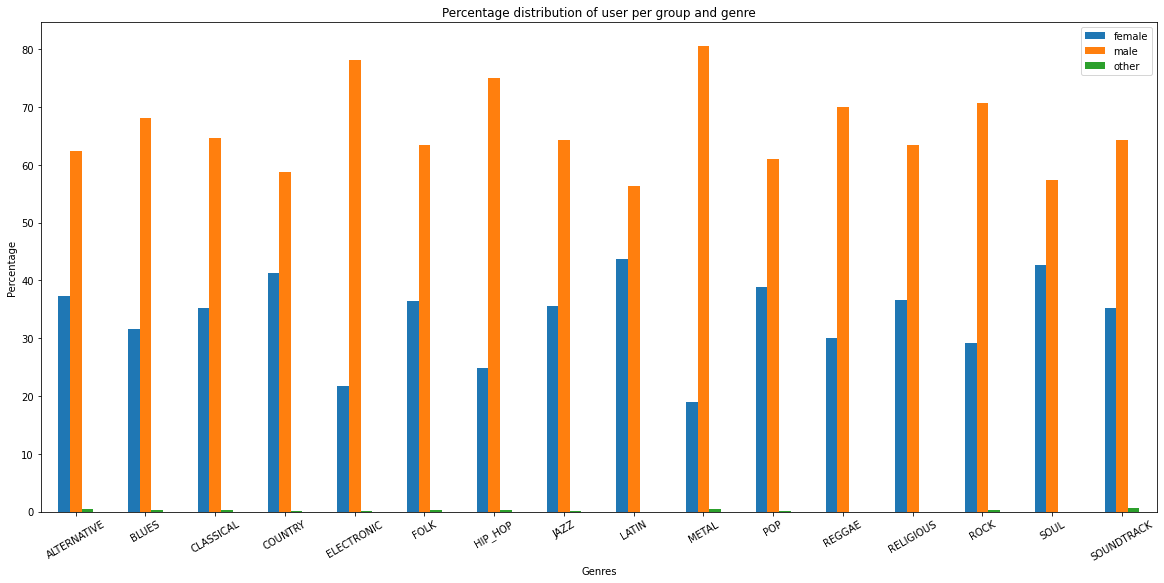

In [153]:
ax = plotpivot_genre_gender.plot.bar(rot=30, figsize=(20,9))
ax.set_xlabel('Genres')
ax.set_ylabel('Percentage')
ax.set_title('Percentage distribution of user per group and genre')
ax.legend(loc='upper right')
plt.show()

It's interesting to notice that the few people who identified their gender as <i>other</i> did not give an affirmative 1 (i.e. like the genre) for the genres in the cluster of religious music.

##### AGE GROUP

Again, I perform a group by operation on this time on the age_group column.

In [155]:
df_users_and_clusters_group = df_users_and_clusters.groupby(['cluster','age_group']).agg({'userid':'count'})
df_users_and_clusters_group.rename(columns = {'userid':'user count'}, inplace = True)
df_users_and_clusters_group['user percentage'] = round(df_users_and_clusters_group.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
df_users_and_clusters_group

user count  user percentage
cluster     age_group                             
ALTERNATIVE 20-29             587            40.96
            30-39             533            37.19
            40-49             189            13.19
            50-59              34             2.37
            60+                20             1.40
...                           ...              ...
SOUNDTRACK  30-39             358            32.75
            40-49             115            10.52
            50-59              16             1.46
            60+                 8             0.73
            <20                50             4.57

[96 rows x 2 columns]

I prepare the filtered objects needed for the grafical visualisation. <br>
And then pivot them transforming the percentage as a column.

In [156]:
# Pivting tables for the visualisation.

plotpivot_genres20 = df_users_and_clusters.loc[df_users_and_clusters['age_group'] == '<20']
plotpivot_genres20 = plotpivot_genres20.groupby(['cluster','age_group']).agg({'userid':'count'})
plotpivot_genres20['percentage'] = round(plotpivot_genres20.groupby(level='age_group').apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_genres20 = pd.pivot_table(plotpivot_genres20, index='age_group', columns='cluster', values='percentage')


plotpivot_genres20_29 = df_users_and_clusters.loc[df_users_and_clusters['age_group'] == '20-29']
plotpivot_genres20_29 = plotpivot_genres20_29.groupby(['cluster','age_group']).agg({'userid':'count'})
plotpivot_genres20_29['percentage'] = round(plotpivot_genres20_29.groupby(level='age_group').apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_genres20_29 = pd.pivot_table(plotpivot_genres20_29, index='age_group', columns='cluster', values='percentage')


plotpivot_genres30_39 = df_users_and_clusters.loc[df_users_and_clusters['age_group'] == '30-39']
plotpivot_genres30_39 = plotpivot_genres30_39.groupby(['cluster','age_group']).agg({'userid':'count'})
plotpivot_genres30_39['percentage'] = round(plotpivot_genres30_39.groupby(level='age_group').apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_genres30_39 = pd.pivot_table(plotpivot_genres30_39, index='age_group', columns='cluster', values='percentage')


plotpivot_genres40_49 = df_users_and_clusters.loc[df_users_and_clusters['age_group'] == '40-49']
plotpivot_genres40_49 = plotpivot_genres40_49.groupby(['cluster','age_group']).agg({'userid':'count'})
plotpivot_genres40_49['percentage'] = round(plotpivot_genres40_49.groupby(level='age_group').apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_genres40_49 = pd.pivot_table(plotpivot_genres40_49, index='age_group', columns='cluster', values='percentage')


plotpivot_genres50_59 = df_users_and_clusters.loc[df_users_and_clusters['age_group'] == '50-59']
plotpivot_genres50_59 = plotpivot_genres50_59.groupby(['cluster','age_group']).agg({'userid':'count'})
plotpivot_genres50_59['percentage'] = round(plotpivot_genres50_59.groupby(level='age_group').apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_genres50_59 = pd.pivot_table(plotpivot_genres50_59, index='age_group', columns='cluster', values='percentage')


plotpivot_genres60 = df_users_and_clusters.loc[df_users_and_clusters['age_group'] == '60+']
plotpivot_genres60 = plotpivot_genres60.groupby(['cluster','age_group']).agg({'userid':'count'})
plotpivot_genres60['percentage'] = round(plotpivot_genres60.groupby(level='age_group').apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_genres60 = pd.pivot_table(plotpivot_genres60, index='age_group', columns='cluster', values='percentage')

Sorting the values for an easier visualisation.

In [185]:
plotpivot_genres20 = plotpivot_genres20.T.sort_values(by='<20',ascending=False).T
plotpivot_genres20_29 = plotpivot_genres20_29.T.sort_values(by='20-29',ascending=False).T
plotpivot_genres30_39 = plotpivot_genres30_39.T.sort_values(by='30-39',ascending=False).T
plotpivot_genres40_49 = plotpivot_genres40_49.T.sort_values(by='40-49',ascending=False).T
plotpivot_genres50_59 = plotpivot_genres50_59.T.sort_values(by='50-59',ascending=False).T
plotpivot_genres60 = plotpivot_genres60.T.sort_values(by='60+',ascending=False).T

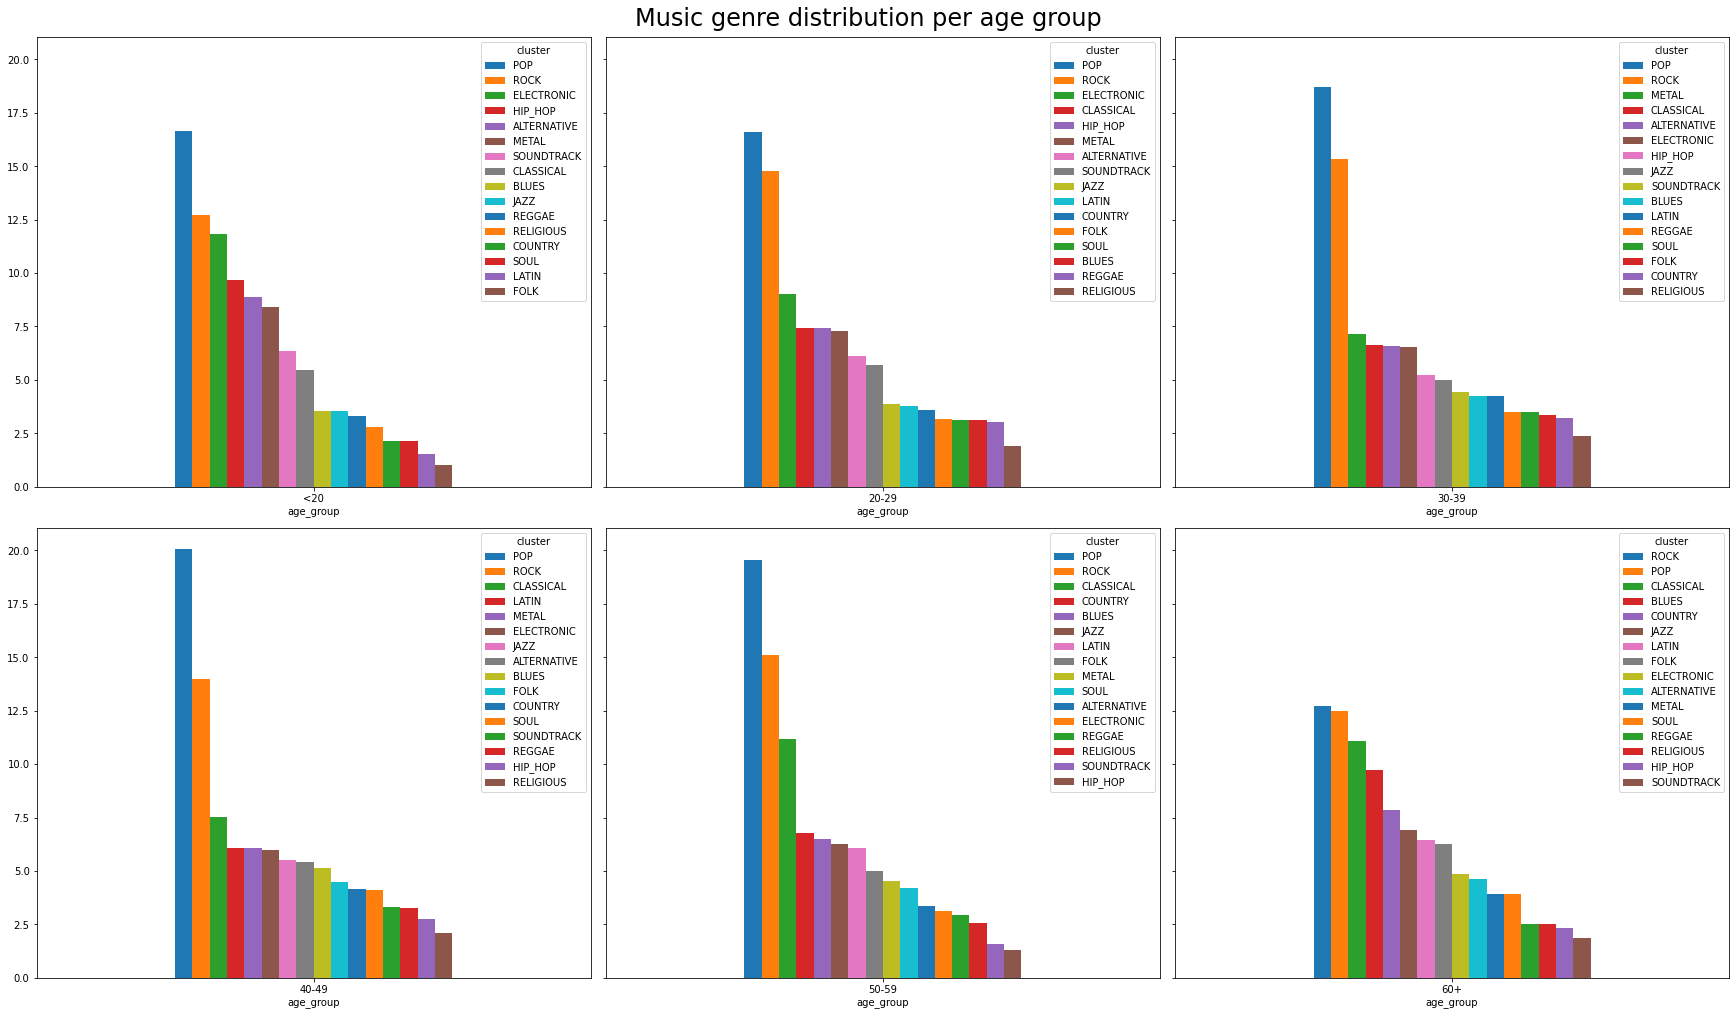

In [187]:
f, ax = plt.subplots(ncols=3, nrows=2, sharey=True, layout='constrained', figsize=(24,14))

plotpivot_genres20.plot(ax=ax[0,0], kind='bar', rot=0)
plotpivot_genres20_29.plot(ax=ax[0,1], kind='bar', rot=0)
plotpivot_genres30_39.plot(ax=ax[0,2], kind='bar', rot=0)
plotpivot_genres40_49.plot(ax=ax[1,0], kind='bar', rot=0)
plotpivot_genres50_59.plot(ax=ax[1,1], kind='bar', rot=0)
plotpivot_genres60.plot(ax=ax[1,2], kind='bar', rot=0)


f.suptitle('Music genre distribution per age group', fontsize=24 )
plt.show()

As expected, POP genre is the most popular between young respondents, also followed by ROCK and ELECTRONIC. <br>
Moreover I also expected that elderly people are more interested in RELIGIOUS, BLUES and CLASSICAL.

##### CONTINENT

Genre distribution per continent.

In [220]:
df_users_and_clusters_country = df_users_and_clusters.groupby(['cluster','continent']).agg({'userid':'count'})
df_users_and_clusters_country.rename(columns = {'userid':'count'}, inplace = True)
df_users_and_clusters_country['percentage'] = round(df_users_and_clusters_country.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
df_users_and_clusters_country

count  percentage
cluster     continent                       
ALTERNATIVE Africa            13        0.91
            Asia             260       18.14
            Europe           749       52.27
            North America    207       14.45
            Oceania           11        0.77
...                          ...         ...
SOUNDTRACK  Asia             318       29.09
            Europe           486       44.46
            North America    109        9.97
            Oceania            7        0.64
            South America    149       13.63

[96 rows x 2 columns]

In [223]:
plotpivot_genre_country = pd.pivot_table(df_users_and_clusters_country, index='continent', columns='cluster', values='count')
plotpivot_genre_country

cluster,ALTERNATIVE,BLUES,CLASSICAL,COUNTRY,ELECTRONIC,FOLK,HIP_HOP,JAZZ,LATIN,METAL,POP,REGGAE,RELIGIOUS,ROCK,SOUL,SOUNDTRACK
continent,,,,,,,,,,,,,,,,
Africa,13,19,43,24,35,17,36,20,26,23,66,13,12,37,25,24
Asia,260,225,519,277,290,197,359,338,133,213,1215,100,166,639,210,318
Europe,749,471,752,316,894,440,608,509,483,932,1981,371,166,1837,395,486
North America,207,100,167,155,132,84,134,106,118,159,413,107,88,395,86,109
Oceania,11,8,10,11,10,8,10,5,7,6,29,3,5,22,14,7
South America,193,134,216,80,388,66,178,110,248,286,470,162,72,520,74,149


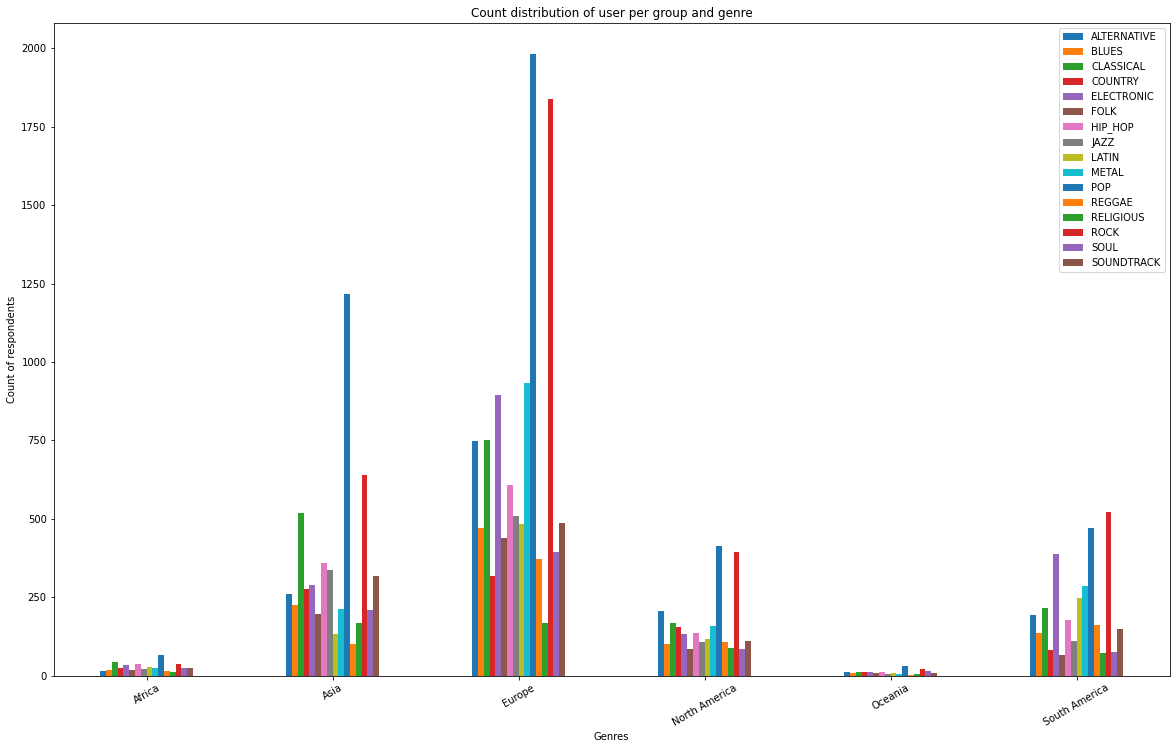

In [225]:
ax = plotpivot_genre_country.plot.bar(rot=30, figsize=(20,12))
ax.set_xlabel('Genres')
ax.set_ylabel('Count of respondents')
ax.set_title('Count distribution of user per group and genre')
ax.legend(loc='upper right')
plt.show()

For a more cleaned visualisation, let's create 6 subplots visualisations, one for each continent.

In [217]:
# Piovting tables for the visualisation.

plotpivot_Africa = df_users_and_clusters.loc[df_users_and_clusters['continent'] == 'Africa']
plotpivot_Africa = plotpivot_Africa.groupby(['cluster','continent']).agg({'userid':'count'})
plotpivot_Africa['percentage'] = round(plotpivot_Africa.groupby(level=1).apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_Africa = pd.pivot_table(plotpivot_Africa, index='continent', columns='cluster', values='percentage')


plotpivot_Asia = df_users_and_clusters.loc[df_users_and_clusters['continent'] == 'Asia']
plotpivot_Asia = plotpivot_Asia.groupby(['cluster','continent']).agg({'userid':'count'})
plotpivot_Asia['percentage'] = round(plotpivot_Asia.groupby(level=1).apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_Asia = pd.pivot_table(plotpivot_Asia, index='continent', columns='cluster', values='percentage')


plotpivot_Europe = df_users_and_clusters.loc[df_users_and_clusters['continent'] == 'Europe']
plotpivot_Europe = plotpivot_Europe.groupby(['cluster','continent']).agg({'userid':'count'})
plotpivot_Europe['percentage'] = round(plotpivot_Europe.groupby(level=1).apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_Europe = pd.pivot_table(plotpivot_Europe, index='continent', columns='cluster', values='percentage')


plotpivot_NA = df_users_and_clusters.loc[df_users_and_clusters['continent'] == 'North America']
plotpivot_NA = plotpivot_NA.groupby(['cluster','continent']).agg({'userid':'count'})
plotpivot_NA['percentage'] = round(plotpivot_NA.groupby(level=1).apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_NA = pd.pivot_table(plotpivot_NA, index='continent', columns='cluster', values='percentage')


plotpivot_Oceania = df_users_and_clusters.loc[df_users_and_clusters['continent'] == 'Oceania']
plotpivot_Oceania = plotpivot_Oceania.groupby(['cluster','continent']).agg({'userid':'count'})
plotpivot_Oceania['percentage'] = round(plotpivot_Oceania.groupby(level=1).apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_Oceania = pd.pivot_table(plotpivot_Oceania, index='continent', columns='cluster', values='percentage')


plotpivot_SA = df_users_and_clusters.loc[df_users_and_clusters['continent'] == 'South America']
plotpivot_SA = plotpivot_SA.groupby(['cluster','continent']).agg({'userid':'count'})
plotpivot_SA['percentage'] = round(plotpivot_SA.groupby(level=1).apply(lambda x:100 * x / float(x.sum())),2)

plotpivot_SA = pd.pivot_table(plotpivot_SA, index='continent', columns='cluster', values='percentage')

Let's order the results.

In [218]:
plotpivot_Africa = plotpivot_Africa.T.sort_values(by='Africa',ascending=False).T
plotpivot_Asia = plotpivot_Asia.T.sort_values(by='Asia',ascending=False).T
plotpivot_Europe = plotpivot_Europe.T.sort_values(by='Europe',ascending=False).T
plotpivot_NA = plotpivot_NA.T.sort_values(by='North America',ascending=False).T
plotpivot_Oceania= plotpivot_Oceania.T.sort_values(by='Oceania',ascending=False).T
plotpivot_SA = plotpivot_SA.T.sort_values(by='South America',ascending=False).T

Let's see the precentages of for the genres prefrences.

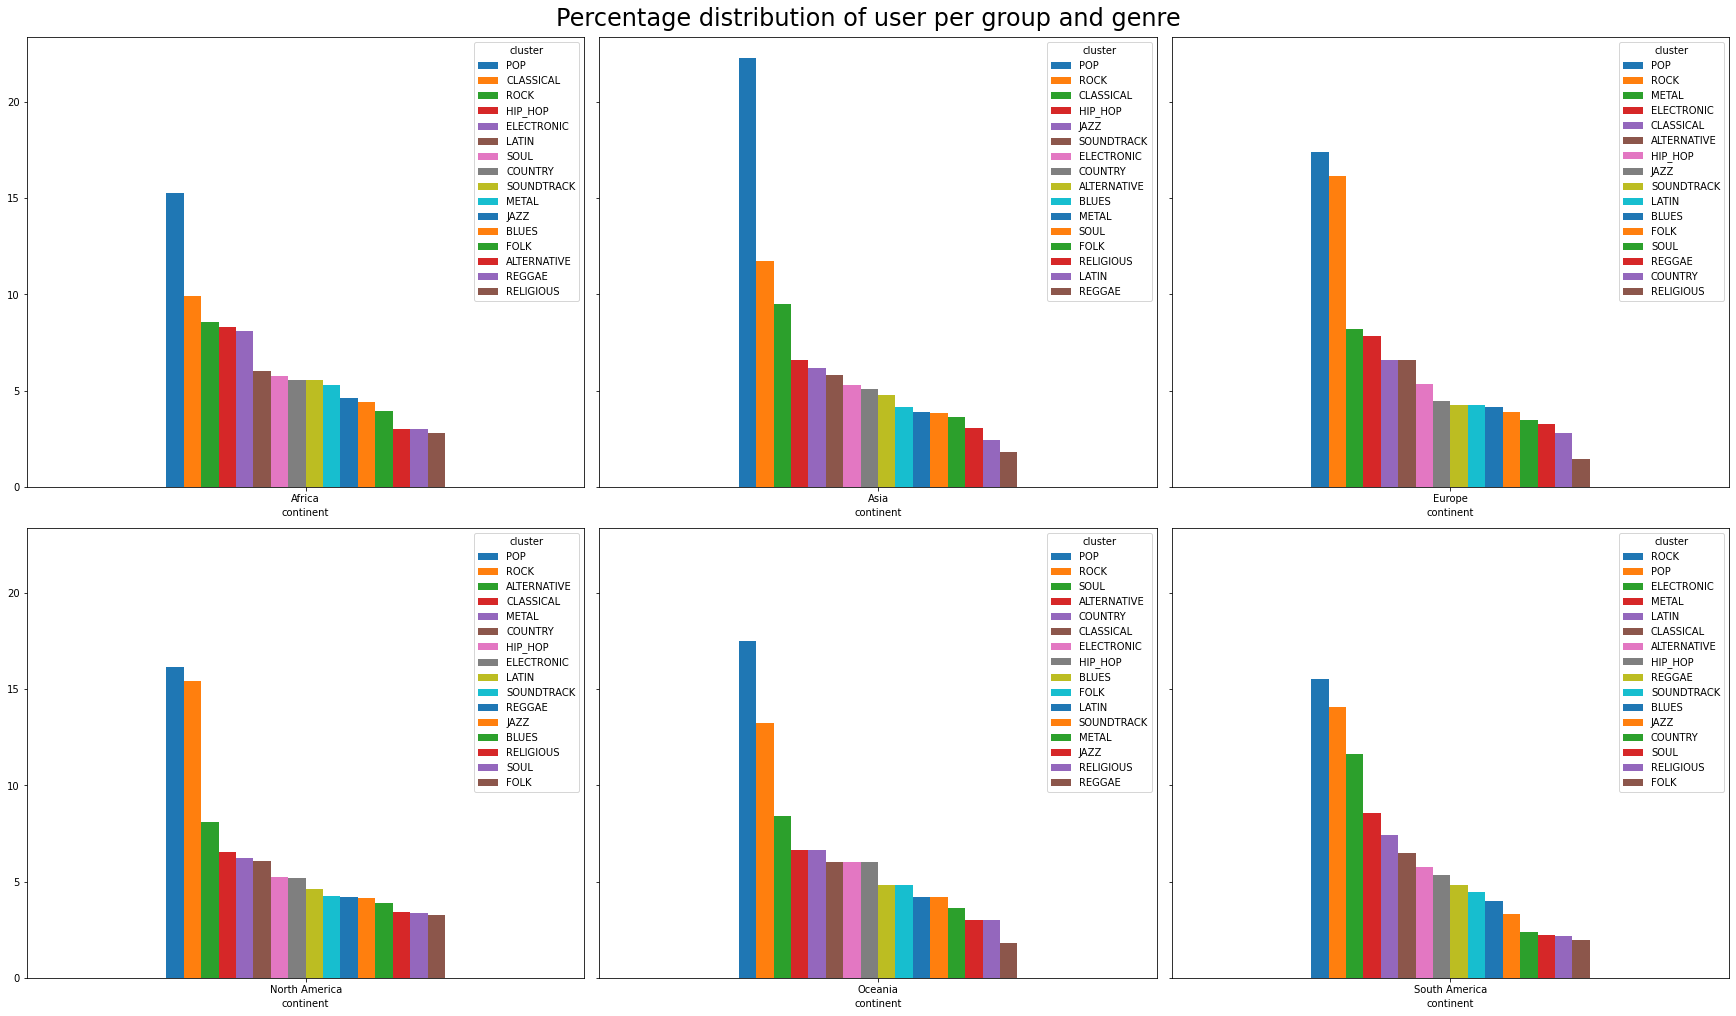

In [226]:
f, ax = plt.subplots(ncols=3, nrows=2, sharey=True, layout='constrained', figsize=(24,14))

plotpivot_Africa.plot(ax=ax[0,0], kind='bar', rot=0)
plotpivot_Asia.plot(ax=ax[0,1], kind='bar', rot=0)
plotpivot_Europe.plot(ax=ax[0,2], kind='bar', rot=0)
plotpivot_NA.plot(ax=ax[1,0], kind='bar', rot=0)
plotpivot_Oceania.plot(ax=ax[1,1], kind='bar', rot=0)
plotpivot_SA.plot(ax=ax[1,2], kind='bar', rot=0)


f.suptitle('Percentage distribution of user per group and genre', fontsize=24 )
plt.show()

As expected LATIN is very much liked in South America whereas SOUL in Africa. 
<br> It's interesting to notice that METAL is at third position in EUROPE, in my opinion it depends strongly on the fact that the majority of respondents are based in country of north-eastern Europe, where (based on some online research) METAL is very famous and appreciated.

In [227]:
df_users_country.loc[df_users_country['continent'] == 'Europe'].groupby('country names').agg({'userid':'count'}).sort_values(by='userid', ascending=False).head(15)

,userid
country names,
Bosnia and Herzegovina,156
Spain,134
Serbia,132
Romania,87
Bulgaria,78
Italy,67
Portugal,66
United Kingdom,58
Russia,45


As we can see in the ranked list above the first countries are from the eastern of Europe.

### How important are the following types of activities in your life?

Let's analyse the activities.

In [228]:
df_activities = pd.read_csv('Data/moods_and_activities_in_music/activities.csv')

In [229]:
df_activities.shape

(9, 3)

In [230]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   activity     9 non-null      object
 1   examples     9 non-null      object
 2   description  9 non-null      object
dtypes: object(3)
memory usage: 344.0+ bytes


In [231]:
df_activities

,activity,examples,description
0,on_the_move,"driving, walking, transport",Moving from one place to another by any means ...
1,daily_routines,"washing, cleaning, cooking",Domestic chores and everyday tasks
2,intellectual,"studying, reading, writing","Brain work, such as private study and desk wor..."
3,entertainment,"tv, internet, games",Using primarily non-musical media for entertai...
4,physical,"dancing, sports, relaxing","Physical activities such as exercise, relaxati..."
5,emotional,"reminiscing, meditating, charging",Mental activities whose purpose is to manage m...
6,live_music,"concert, gig, performance",Participating to activities involving live mus...
7,social,"gatherings, dining, night out",Any activity involving a social aspect - both ...
8,music_listening,focussing on music,Music listening as the main activity


Now each user is asked to give a preference in a likert scale from 1 (not at all) to 5 (extremely).

In [232]:
df_activities_general = pd.read_csv('Data/moods_and_activities_in_music/bg_activities_general.csv')

In [233]:
df_activities_general.shape

(2508, 10)

In [234]:
df_activities_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   userid                    2508 non-null   int64  
 1   activity.daily_routines   2508 non-null   int64  
 2   activity.emotional        2508 non-null   int64  
 3   activity.entertainment    2508 non-null   int64  
 4   activity.intellectual     2507 non-null   float64
 5   activity.live_music       2508 non-null   int64  
 6   activity.music_listening  2508 non-null   int64  
 7   activity.on_the_move      2508 non-null   int64  
 8   activity.physical         2508 non-null   int64  
 9   activity.social           2508 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 196.1 KB


I see every user has answerd the question, except one in the activity intellectual. Let's see who.

In [235]:
df_activities_general.loc[df_activities_general['activity.intellectual'].isnull() == True]

,userid,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
2307,3194,4,3,5,NaN,5,5,4,3,2


So, user 2307 did not give a value. Let's clean the NaN by replacing it with the average value for that activity.

In [236]:
intell_avg = df_activities_general['activity.intellectual'].mean().round(0)
df_activities_general['activity.intellectual'] = df_activities_general['activity.intellectual'].fillna(intell_avg).astype(int)

Let's see distribution of importance for the 9 activity groups listed.

In [237]:
#Counting the values for each activity
valuecount_general = df_activities_general.loc[:, df_activities_general.columns != df_activities_general.columns[0]].apply(pd.value_counts)

In [238]:
#Replacing the numerical value of the likert scale with a description
valuecount_general = valuecount_general.rename(index={1: "Not At All", 2: "Low importance", 3: "Neutral", 4:"Important", 5:"Very Important"})
valuecount_general

,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
Not At All,121,179,52,150,278,70,66,101,157
Low importance,383,445,223,272,486,174,238,370,426
Neutral,772,798,559,650,718,535,619,757,812
Important,792,654,918,810,626,906,915,796,740
Very Important,440,432,756,626,400,823,670,484,373


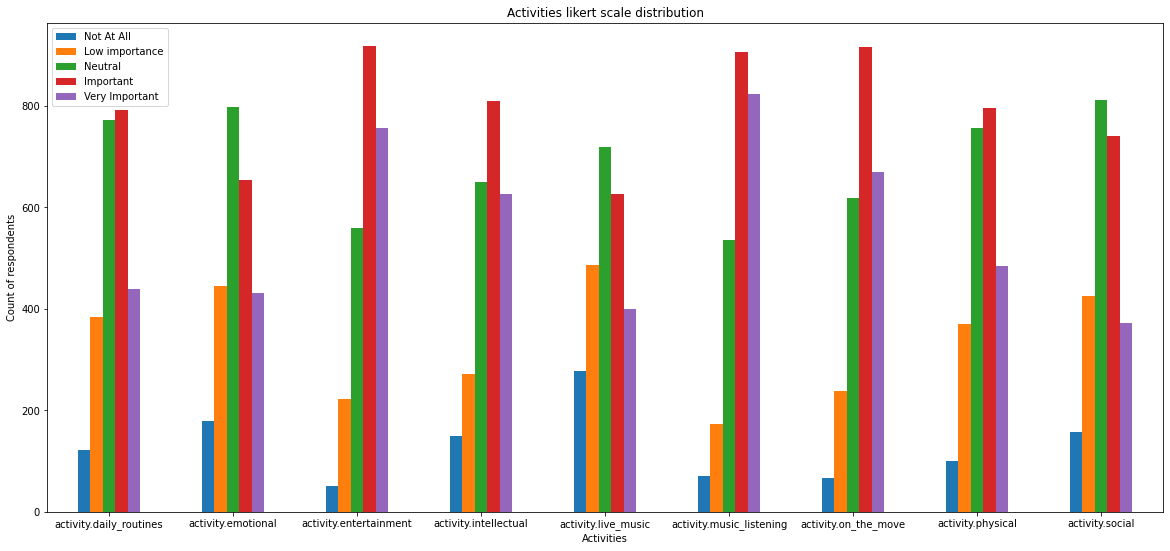

In [240]:
ax = valuecount_general.T.plot.bar(rot=0, figsize=(20,9))
ax.set_xlabel('Activities')
ax.set_ylabel('Count of respondents')
ax.set_title('Activities likert scale distribution')
ax.legend(loc='upper left')
plt.show()

So, the most important activities are ENTERTAINMENT, MUSIC LISTENING, MOTION, INTELLECTUAL, DAILY ROUTINES

Now, I put together the information about users and their preference about activities to go deeper in the analysis. <br>
The melt operation performs a sort of UNPIVOT, i.e. it transforms the columns into rows based on a key column, which is in this case the userid.

In [241]:
df_activities_general_unpivot = df_activities_general.melt(id_vars='userid', var_name='activity', value_name='preferenceDegree')

#remove the activity. prefix from the rows
df_activities_general_unpivot['activity'].replace('activity.','',regex=True,inplace=True)
df_activities_general_unpivot

,userid,activity,preferenceDegree
0,5,daily_routines,2
1,6,daily_routines,5
2,7,daily_routines,3
3,8,daily_routines,4
4,10,daily_routines,4
...,...,...,...
22567,3413,social,3
22568,3415,social,3
22569,3416,social,3
22570,3417,social,4


Now, that I have for each user a column containing wich type of activity they have assigned a preference degree, by joining it with the dataset of the general background information it can be fruther investigated how moods and activities might be influcenced by other factors like the gender, the age, the country and musical expertise.

In [242]:
df_activities_general_users = pd.merge( df_activities_general_unpivot, df_users, how='left', on='userid' )
df_activities_general_users.loc[df_activities_general_users['userid'] == 5]

,userid,activity,preferenceDegree,expertise,language_skill,gender,age,country,continent,age_group
0,5,daily_routines,2,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
2508,5,emotional,5,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
5016,5,entertainment,2,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
7524,5,intellectual,4,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
10032,5,live_music,3,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
12540,5,music_listening,4,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
15048,5,on_the_move,3,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
17556,5,physical,5,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
20064,5,social,3,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39


From the above preview, it looks like the information have been correctly put together. 

#### GENDER

I remove the gender other, because for the investigation I will perform from now on, it is an outlier and it makes all the operations more complicated.

In [243]:
df_activities_general_users = df_activities_general_users.loc[df_activities_general_users['gender'] != 'other']

As usual I perform a grouping based on gender and activity to investigate these two information.

In [244]:
df_activities_general_users_gender = df_activities_general_users.groupby(['gender','activity','preferenceDegree']).agg({'userid':'count'})
df_activities_general_users_gender.rename(columns = {'userid':'count'}, inplace = True)
df_activities_general_users_gender['percentage'] = round(df_activities_general_users_gender.groupby(level=['gender','activity']).apply(lambda x:100 * x / float(x.sum())),2)
df_activities_general_users_gender

count  percentage
gender activity       preferenceDegree                   
female daily_routines 1                    18        2.51
                      2                    64        8.91
                      3                   188       26.18
                      4                   247       34.40
                      5                   201       27.99
...                                       ...         ...
male   social         1                   121        6.77
                      2                   306       17.13
                      3                   574       32.14
                      4                   515       28.84
                      5                   270       15.12

[90 rows x 2 columns]

I pivot the degree rows as columns to facilitate the plotting in the visualisation graph.

In [246]:
plotpivot_genre_activity_general = pd.pivot_table(df_activities_general_users_gender, index=['gender','activity'], columns=['preferenceDegree'], values='percentage')
plotpivot_genre_activity_general.fillna(value=0, inplace=True)
plotpivot_genre_activity_general

preferenceDegree            1      2      3      4      5
gender activity                                          
female daily_routines    2.51   8.91  26.18  34.40  27.99
       emotional         6.27  15.60  28.83  26.60  22.70
       entertainment     2.09   7.52  23.54  35.10  31.75
       intellectual      5.57   7.52  20.75  32.59  33.57
       live_music       11.28  20.19  28.83  22.70  16.99
       music_listening   1.81   6.69  22.84  35.10  33.57
       on_the_move       1.67   9.19  26.60  34.12  28.41
       physical          3.06  12.12  33.15  31.48  20.19
       social            4.87  16.71  33.01  31.06  14.35
male   daily_routines    5.77  17.86  32.64  30.46  13.27
       emotional         7.50  18.65  33.03  25.87  14.95
       entertainment     2.07   9.46  21.84  37.29  29.34
       intellectual      6.16  12.21  28.00  32.14  21.50
       live_music       11.03  19.04  28.56  25.81  15.57
       music_listening   3.19   7.05  20.77  36.56  32.42
       on_the_move       2.97   9.63  23.91  37.51  25.98
       physical          4.42  15.68  29.06  31.91  18.92
       social            6.77  17.13  32.14  28.84  15.12

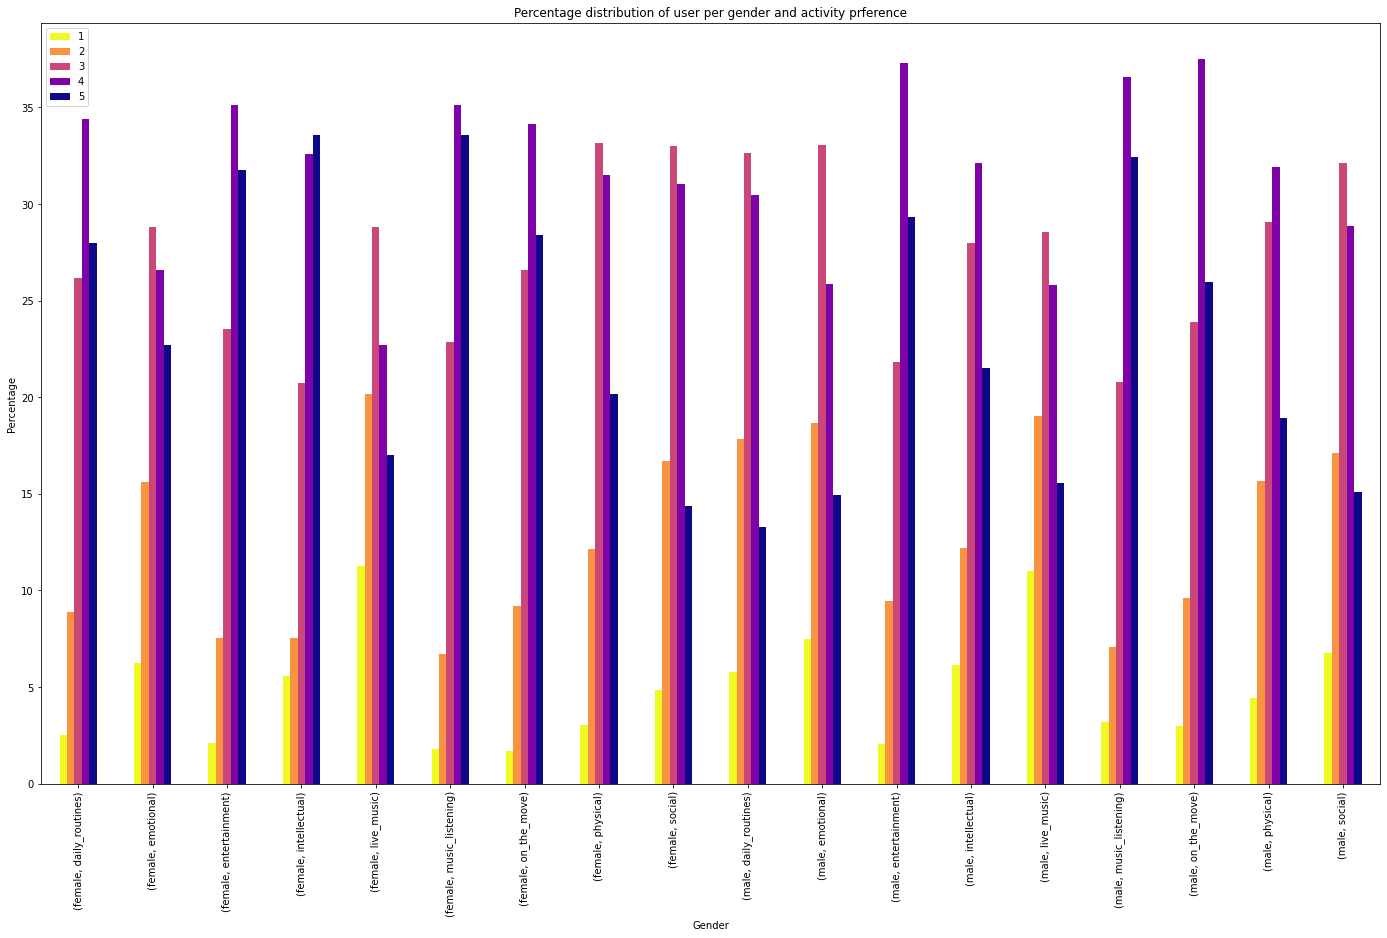

In [247]:
ax = plotpivot_genre_activity_general.plot.bar(rot=90, figsize=(24,14),  cmap='plasma_r')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_title('Percentage distribution of user per gender and activity prference')
ax.legend(loc='upper left')
plt.show()

From this visualisation, we can see that women like "intellectual, music listening, entertainment, emotional" activities the most. <br>
Men, moreover, like "on the move" activities.

#### CONTINENT

Let's do the same based on the continent. And I am going to filter only the rows where the users has given a 4 or 5 in the likert scale to simplify the understanding.

In [256]:
df_activities_general_users_continent = df_activities_general_users.groupby(['continent','activity','preferenceDegree']).agg({'userid':'count'})
df_activities_general_users_continent.rename(columns = {'userid':'count'}, inplace = True)
df_activities_general_users_continent['percentage'] = round(df_activities_general_users_continent.groupby(level=['continent']).apply(lambda x:100 * x / float(x.sum())),2)
df_activities_general_users_continent_query = df_activities_general_users_continent.query("preferenceDegree == 5 or preferenceDegree == 4")
df_activities_general_users_continent_query

count  percentage
continent     activity       preferenceDegree                   
Africa        daily_routines 4                    11        2.11
                             5                     8        1.53
              emotional      4                     9        1.72
                             5                    10        1.92
              entertainment  4                    22        4.21
...                                              ...         ...
South America on_the_move    5                    84        3.19
              physical       4                   102        3.87
                             5                    59        2.24
              social         4                   103        3.91
                             5                    50        1.90

[105 rows x 2 columns]

In [257]:
df_activities_general_users_continent_query = df_activities_general_users_continent_query.groupby(level=['continent', 'activity'], axis=0).sum()
df_activities_general_users_continent_query

count  percentage
continent     activity                          
Africa        daily_routines      19        3.64
              emotional           19        3.64
              entertainment       37        7.08
              intellectual        28        5.37
              live_music          11        2.10
              music_listening     31        5.94
              on_the_move         30        5.75
              physical            25        4.79
              social              11        2.11
Asia          daily_routines     359        5.56
              emotional          299        4.63
              entertainment      474        7.35
              intellectual       391        6.06
              live_music         287        4.44
              music_listening    492        7.63
              on_the_move        440        6.82
              physical           364        5.64
              social             312        4.83
Europe        daily_routines     583        5.39
              emotional          538        4.97
              entertainment      779        7.20
              intellectual       686        6.34
              live_music         508        4.70
              music_listening    819        7.57
              on_the_move        761        7.03
              physical           606        5.60
              social             532        4.91
North America daily_routines     130        6.48
              emotional          112        5.58
              entertainment      160        7.97
              intellectual       137        6.83
              live_music          90        4.48
              music_listening    158        7.88
              on_the_move        147        7.32
              physical           120        5.98
              social             100        4.99
Oceania       daily_routines       7        9.73
              emotional            2        2.78
              entertainment        7        9.73
              intellectual         5        6.95
              live_music           1        1.39
              music_listening      4        5.56
              on_the_move          5        6.95
              physical             1        1.39
              social               2        2.78
South America daily_routines     130        4.93
              emotional          113        4.28
              entertainment      210        7.97
              intellectual       185        7.02
              live_music         126        4.78
              music_listening    219        8.31
              on_the_move        197        7.48
              physical           161        6.11
              social             153        5.81

In [258]:
plotpivot_activities_general_users_continent_query = pd.pivot_table(df_activities_general_users_continent_query, index='continent', columns='activity', values='percentage')
plotpivot_activities_general_users_continent_query

activity,daily_routines,emotional,entertainment,intellectual,live_music,music_listening,on_the_move,physical,social
continent,,,,,,,,,
Africa,3.64,3.64,7.08,5.37,2.10,5.94,5.75,4.79,2.11
Asia,5.56,4.63,7.35,6.06,4.44,7.63,6.82,5.64,4.83
Europe,5.39,4.97,7.20,6.34,4.70,7.57,7.03,5.60,4.91
North America,6.48,5.58,7.97,6.83,4.48,7.88,7.32,5.98,4.99
Oceania,9.73,2.78,9.73,6.95,1.39,5.56,6.95,1.39,2.78
South America,4.93,4.28,7.97,7.02,4.78,8.31,7.48,6.11,5.81


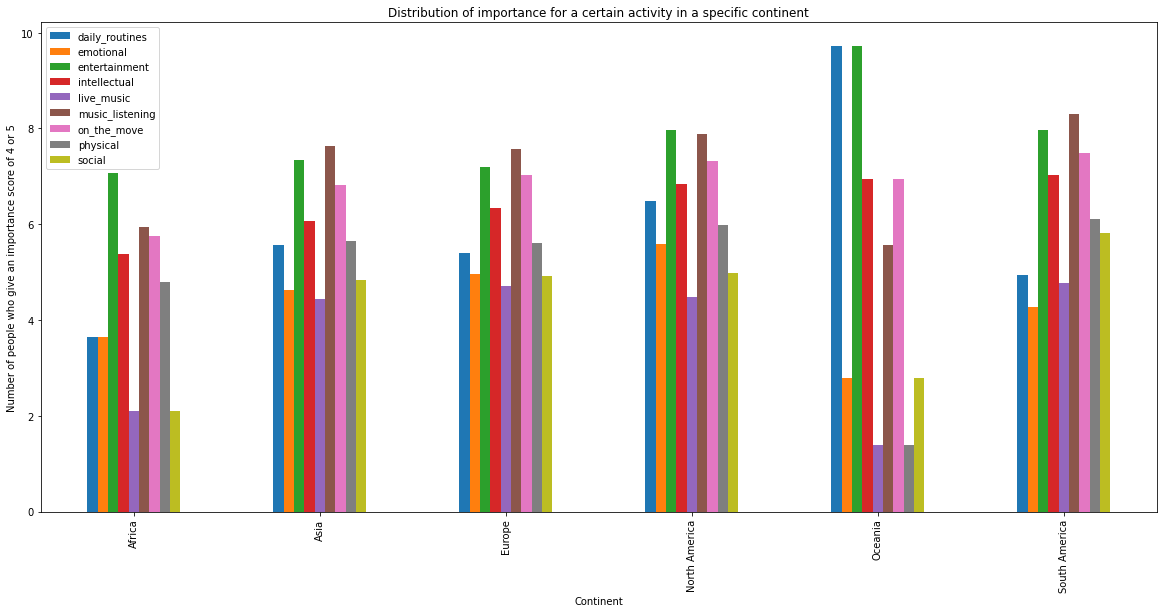

In [259]:
ax = plotpivot_activities_general_users_continent_query.plot.bar(figsize=(20,9))
ax.set_ylabel('Number of people who give an importance score of 4 or 5')
ax.set_xlabel('Continent')
ax.set_title('Distribution of importance for a certain activity in a specific continent')
ax.legend(loc='upper left')
plt.show()

Unexpectedly, Oceania's respondent give low importance to physical and live music activities.

#### AGE GROUP

Let's do the same operations performed previously, to see which activity are the most common based on the respondents' age.

In [260]:
df_activities_general_users_group_query = df_activities_general_users.groupby(['age_group','activity','preferenceDegree']).agg({'userid':'count'})
df_activities_general_users_group_query.rename(columns = {'userid':'count'}, inplace = True)
df_activities_general_users_group_query['percentage'] = round(df_activities_general_users_group_query.groupby(level=['age_group']).apply(lambda x:100 * x / float(x.sum())),2)
df_activities_general_users_group_query = df_activities_general_users_group_query.query("preferenceDegree == 5 or preferenceDegree == 4")
df_activities_general_users_group_query.head(15)

count  percentage
age_group activity        preferenceDegree                   
20-29     daily_routines  4                   351        3.64
                          5                   194        2.01
          emotional       4                   279        2.90
                          5                   161        1.67
          entertainment   4                   358        3.72
                          5                   364        3.78
          intellectual    4                   347        3.60
                          5                   281        2.92
          live_music      4                   276        2.87
                          5                   183        1.90
          music_listening 4                   363        3.77
                          5                   379        3.94
          on_the_move     4                   357        3.71
                          5                   341        3.54
          physical        4                   338        3.51

In [261]:
df_activities_general_users_group_query = df_activities_general_users_group_query.groupby(level=['age_group', 'activity'], axis=0).sum()
df_activities_general_users_group_query

count  percentage
age_group activity                          
20-29     daily_routines     545        5.65
          emotional          440        4.57
          entertainment      722        7.50
          intellectual       628        6.52
          live_music         459        4.77
          music_listening    742        7.71
          on_the_move        698        7.25
          physical           552        5.73
          social             516        5.35
30-39     daily_routines     418        5.35
          emotional          400        5.11
          entertainment      585        7.48
          intellectual       484        6.19
          live_music         364        4.65
          music_listening    605        7.73
          on_the_move        546        6.98
          physical           468        5.98
          social             375        4.79
40-49     daily_routines     149        5.16
          emotional          141        4.88
          entertainment      201        6.96
          intellectual       184        6.37
          live_music         117        4.05
          music_listening    213        7.38
          on_the_move        197        6.82
          physical           154        5.33
          social             127        4.40
50-59     daily_routines      56        5.87
          emotional           51        5.35
          entertainment       63        6.60
          intellectual        63        6.61
          live_music          29        3.04
          music_listening     74        7.75
          on_the_move         66        6.92
          physical            39        4.09
          social              40        4.19
60+       daily_routines      18        4.35
          emotional           15        3.62
          entertainment       31        7.49
          intellectual        20        4.84
          live_music          22        5.31
          music_listening     28        6.76
          on_the_move         23        5.55
          physical            18        4.35
          social              17        4.11
<20       daily_routines      44        5.26
          emotional           37        4.42
          entertainment       69        8.24
          intellectual        55        6.57
          live_music          34        4.06
          music_listening     64        7.65
          on_the_move         54        6.45
          physical            48        5.74
          social              37        4.42

In [262]:
plotpivot_df_activities_general_users_group_query = pd.pivot_table(df_activities_general_users_group_query, index='age_group', columns='activity', values='percentage')
plotpivot_df_activities_general_users_group_query

activity,daily_routines,emotional,entertainment,intellectual,live_music,music_listening,on_the_move,physical,social
age_group,,,,,,,,,
20-29,5.65,4.57,7.50,6.52,4.77,7.71,7.25,5.73,5.35
30-39,5.35,5.11,7.48,6.19,4.65,7.73,6.98,5.98,4.79
40-49,5.16,4.88,6.96,6.37,4.05,7.38,6.82,5.33,4.40
50-59,5.87,5.35,6.60,6.61,3.04,7.75,6.92,4.09,4.19
60+,4.35,3.62,7.49,4.84,5.31,6.76,5.55,4.35,4.11
<20,5.26,4.42,8.24,6.57,4.06,7.65,6.45,5.74,4.42


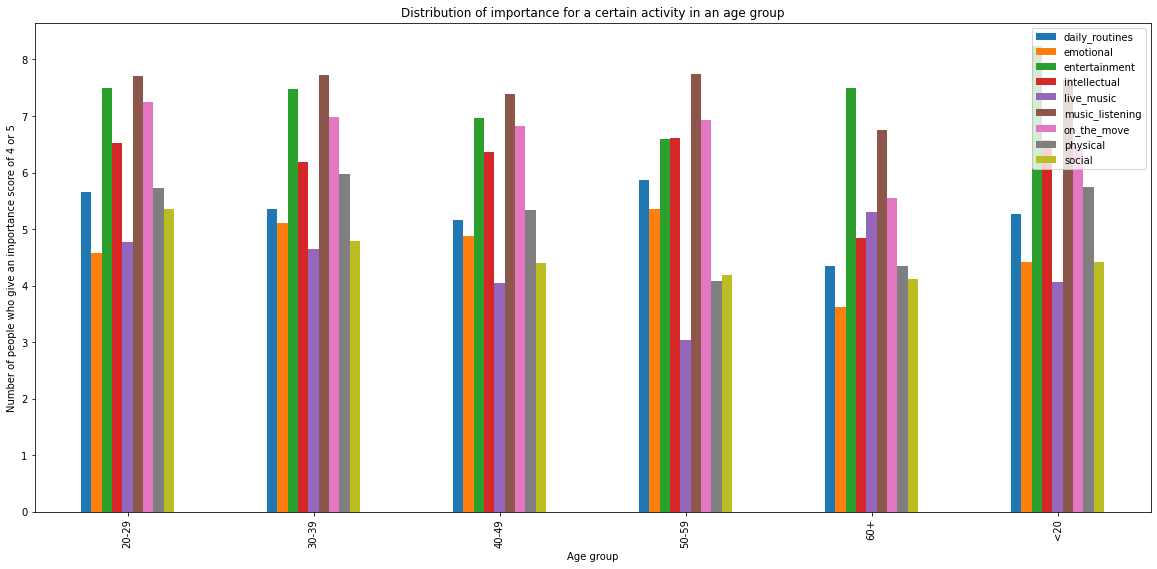

In [263]:
ax = plotpivot_df_activities_general_users_group_query.plot.bar(figsize=(20,9))
ax.set_ylabel('Number of people who give an importance score of 4 or 5')
ax.set_xlabel('Age group')
ax.set_title('Distribution of importance for a certain activity in an age group')
ax.legend(loc='upper right')
plt.show()

As expected, for young people music listening is very important.
It's very interesting to notice that elderly people give a high importance to live music. I can suppose this is because young generations usually listen to music on streaming platforms like Spotify.

### How important is music to you in the following types of activities?

In [264]:
df_activities_musical = pd.read_csv('Data/moods_and_activities_in_music/bg_activities_musical.csv')

In [265]:
df_activities_musical.shape

(2508, 10)

In [266]:
df_activities_musical.head()

,userid,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,5,4,5,2,3,5,5,3,3,4
1,6,5,5,5,5,5,5,5,5,5
2,7,3,1,4,1,5,5,5,1,3
3,8,4,1,5,3,3,5,4,4,1
4,10,3,5,3,4,5,4,2,4,2


In [267]:
df_activities_musical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   userid                    2508 non-null   int64
 1   activity.daily_routines   2508 non-null   int64
 2   activity.emotional        2508 non-null   int64
 3   activity.entertainment    2508 non-null   int64
 4   activity.intellectual     2508 non-null   int64
 5   activity.live_music       2508 non-null   int64
 6   activity.music_listening  2508 non-null   int64
 7   activity.on_the_move      2508 non-null   int64
 8   activity.physical         2508 non-null   int64
 9   activity.social           2508 non-null   int64
dtypes: int64(10)
memory usage: 196.1 KB


There are no null or nan values. So we can go on without any further cleaning of the dataset.

Let's see in which activity music is most important based on respondents answers.

In [269]:
valuecount_musical = df_activities_musical.loc[:, df_activities_musical.columns != df_activities_musical.columns[0]].apply(pd.value_counts)
valuecount_musical

,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
1,184,220,122,440,168,59,109,115,167
2,324,354,282,484,243,110,219,213,332
3,732,675,618,705,572,373,548,592,741
4,778,684,884,579,624,666,831,837,791
5,490,575,602,300,901,1300,801,751,477


Let's create a variable containing low-importance-score, and another one containing high-importance-score activities.

In [270]:
valuecount_musical_not_important = valuecount_musical.iloc[[0, 1, 2]].sum()
valuecount_musical_not_important

activity.daily_routines     1240
activity.emotional          1249
activity.entertainment      1022
activity.intellectual       1629
activity.live_music          983
activity.music_listening     542
activity.on_the_move         876
activity.physical            920
activity.social             1240
dtype: int64

In [271]:
valuecount_musical_important = valuecount_musical.iloc[[3, 4]].sum()
valuecount_musical_important = valuecount_musical_important.sort_values(ascending=False)
valuecount_musical_important

activity.music_listening    1966
activity.on_the_move        1632
activity.physical           1588
activity.live_music         1525
activity.entertainment      1486
activity.daily_routines     1268
activity.social             1268
activity.emotional          1259
activity.intellectual        879
dtype: int64

Let's see a pie chart of the activities while performed, the listening to music is rated as important.

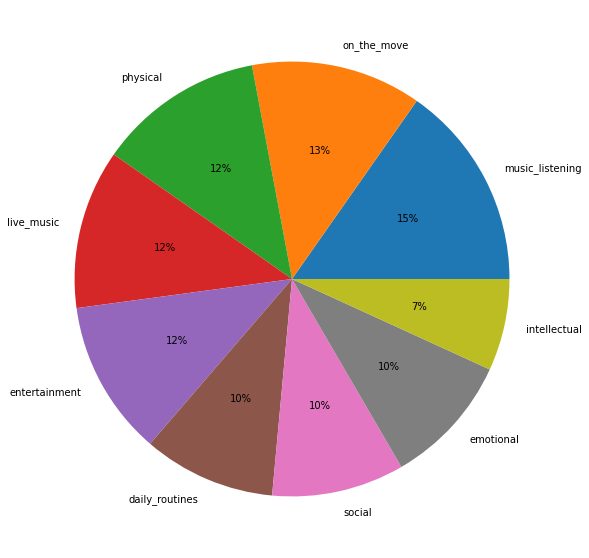

In [272]:
labels = ['music_listening','on_the_move','physical','live_music', 'entertainment','daily_routines','social', 'emotional','intellectual']

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(valuecount_musical_important, labels=labels, autopct='%.0f%%')
ax.set(facecolor = "black")
plt.show()

So, music listening is very important when of course listening to music (also live), being on the move, doing physical activities and entertainment. The resul is quite obvious.

Let's see now the distribution of all the ratings for the music listening during the 9 activities.

In [273]:
valuecount_musical = valuecount_musical.rename(index={1: "Not At All", 2: "Low importance", 3: "Neutral", 4:"Important", 5:"Very Important"})

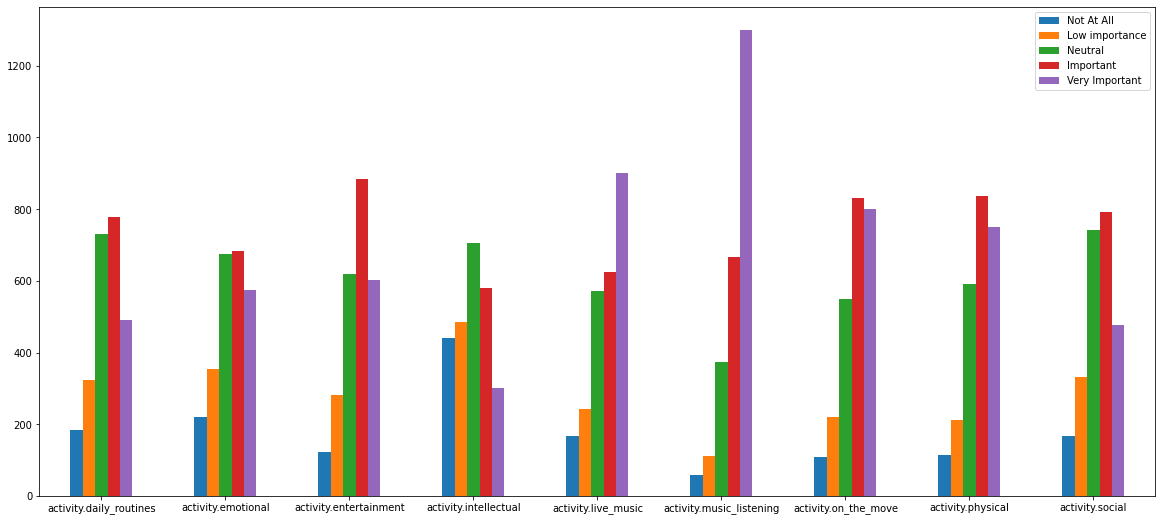

In [274]:
valuecount_musical.T.plot.bar(rot=0, figsize=(20,9))
plt.show()

It looks like music is not fundamental when performing intellectual activities and emotional activities.

Let's put together the info with the one of users to further analyse the topics as it was done previously.

In [275]:
df_activities_musical_unpivot = df_activities_musical.melt(id_vars='userid', var_name='activity', value_name='preferenceDegree')
df_activities_musical_unpivot['activity'].replace('activity.','',regex=True,inplace=True)
df_activities_musical_unpivot

,userid,activity,preferenceDegree
0,5,daily_routines,4
1,6,daily_routines,5
2,7,daily_routines,3
3,8,daily_routines,4
4,10,daily_routines,3
...,...,...,...
22567,3413,social,4
22568,3415,social,4
22569,3416,social,4
22570,3417,social,3


Join operation on the two datasets.

In [276]:
df_activities_musical_users = pd.merge( df_activities_musical_unpivot, df_users, how='left', on='userid' )
df_activities_musical_users.loc[df_activities_musical_users['userid'] == 5]

,userid,activity,preferenceDegree,expertise,language_skill,gender,age,country,continent,age_group
0,5,daily_routines,4,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
2508,5,emotional,5,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
5016,5,entertainment,2,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
7524,5,intellectual,3,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
10032,5,live_music,5,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
12540,5,music_listening,5,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
15048,5,on_the_move,3,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
17556,5,physical,3,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
20064,5,social,4,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39


And now, let's investigate by grouping on gender, age group and continent as we did previously.


#### GENDER

In [277]:
df_activities_musical_users = df_activities_musical_users.loc[df_activities_musical_users['gender'] != 'other']
df_activities_musical_users_gender = df_activities_musical_users.groupby(['gender','activity','preferenceDegree']).agg({'userid':'count'})
df_activities_musical_users_gender.rename(columns = {'userid':'count'}, inplace = True)
df_activities_musical_users_gender['percentage'] = round(df_activities_musical_users_gender.groupby(level=['gender','activity']).apply(lambda x:100 * x / float(x.sum())),2)
df_activities_musical_users_gender

count  percentage
gender activity       preferenceDegree                   
female daily_routines 1                    24        3.34
                      2                    70        9.75
                      3                   178       24.79
                      4                   246       34.26
                      5                   200       27.86
...                                       ...         ...
male   social         1                   132        7.39
                      2                   245       13.72
                      3                   525       29.40
                      4                   565       31.63
                      5                   319       17.86

[90 rows x 2 columns]

In [278]:
plotpivot_genre_activity_musical = pd.pivot_table(df_activities_musical_users_gender, index=['gender','activity'], columns=['preferenceDegree'], values='percentage')
plotpivot_genre_activity_musical.fillna(value=0, inplace=True)
plotpivot_genre_activity_musical

preferenceDegree            1      2      3      4      5
gender activity                                          
female daily_routines    3.34   9.75  24.79  34.26  27.86
       emotional         7.52  12.12  25.35  29.25  25.77
       entertainment     4.60  12.12  25.35  35.10  22.84
       intellectual     17.69  20.47  27.44  21.45  12.95
       live_music        5.43  10.58  19.78  20.61  43.59
       music_listening   2.09   3.48  13.51  23.68  57.24
       on_the_move       4.18  10.17  17.69  30.92  37.05
       physical          3.20   6.55  20.47  34.12  35.65
       social            4.87  11.98  29.81  31.34  22.01
male   daily_routines    8.96  14.17  31.02  29.73  16.13
       emotional         9.29  14.89  27.60  26.43  21.78
       entertainment     4.98  10.92  24.36  35.27  24.47
       intellectual     17.47  18.81  28.44  23.74  11.53
       live_music        7.22   9.35  24.02  26.48  32.92
       music_listening   2.46   4.76  15.45  27.77  49.55
       on_the_move       4.37   8.12  23.52  34.10  29.90
       physical          5.15   9.24  24.80  33.15  27.66
       social            7.39  13.72  29.40  31.63  17.86

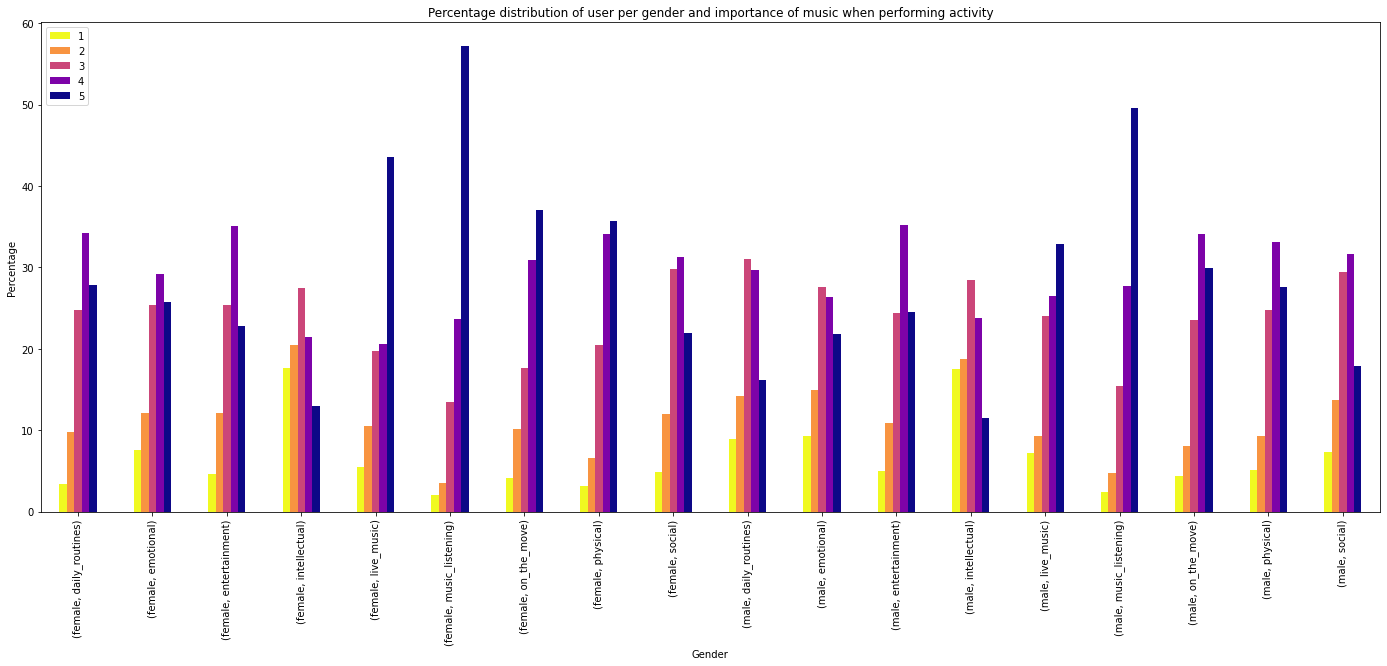

In [279]:
ax = plotpivot_genre_activity_musical.plot.bar(rot=90, figsize=(24,9),  cmap='plasma_r')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_title('Percentage distribution of user per gender and importance of music when performing activity')
ax.legend(loc='upper left')
plt.show()

Excluded from the considerations the music listening activities in which of course music is fundamental, for women music is important when doing pyhiscal activities, being on the move and doing daily routines, as it is for men.
There are no particular differences between the two genders.

#### CONTINENT

In [280]:
df_activities_musical_users_continent = df_activities_musical_users.groupby(['continent','activity','preferenceDegree']).agg({'userid':'count'})
df_activities_musical_users_continent.rename(columns = {'userid':'count'}, inplace = True)
df_activities_musical_users_continent['percentage'] = round(df_activities_musical_users_continent.groupby(level=['continent']).apply(lambda x:100 * x / float(x.sum())),2)
df_activities_musical_users_continent_query = df_activities_musical_users_continent.query("preferenceDegree == 5 or preferenceDegree == 4")
df_activities_musical_users_continent_query

count  percentage
continent     activity       preferenceDegree                   
Africa        daily_routines 4                    16        3.07
                             5                     9        1.72
              emotional      4                    12        2.30
                             5                    11        2.11
              entertainment  4                    21        4.02
...                                              ...         ...
South America on_the_move    5                   112        4.25
              physical       4                   104        3.94
                             5                   101        3.83
              social         4                    90        3.41
                             5                    77        2.92

[106 rows x 2 columns]

In [281]:
df_activities_musical_users_continent_query = df_activities_musical_users_continent_query.groupby(level=['continent', 'activity'], axis=0).sum()
df_activities_musical_users_continent_query

count  percentage
continent     activity                          
Africa        daily_routines      25        4.79
              emotional           23        4.41
              entertainment       35        6.70
              intellectual        21        4.02
              live_music          19        3.64
              music_listening     43        8.24
              on_the_move         28        5.36
              physical            30        5.75
              social              17        3.26
Asia          daily_routines     336        5.21
              emotional          356        5.51
              entertainment      447        6.93
              intellectual       276        4.27
              live_music         390        6.05
              music_listening    542        8.40
              on_the_move        426        6.60
              physical           417        6.47
              social             341        5.29
Europe        daily_routines     606        5.60
              emotional          632        5.84
              entertainment      688        6.36
              intellectual       382        3.53
              live_music         793        7.33
              music_listening    957        8.85
              on_the_move        808        7.47
              physical           784        7.25
              social             622        5.75
North America daily_routines     122        6.08
              emotional          106        5.28
              entertainment      125        6.23
              intellectual        76        3.78
              live_music         132        6.58
              music_listening    177        8.82
              on_the_move        153        7.62
              physical           144        7.18
              social             114        5.68
Oceania       daily_routines       6        8.34
              emotional            3        4.17
              entertainment        4        5.56
              intellectual         1        1.39
              live_music           3        4.17
              music_listening      4        5.56
              on_the_move          6        8.34
              physical             3        4.17
              social               4        5.56
South America daily_routines     168        6.37
              emotional          134        5.08
              entertainment      182        6.90
              intellectual       121        4.59
              live_music         181        6.87
              music_listening    236        8.95
              on_the_move        208        7.89
              physical           205        7.77
              social             167        6.33

In [282]:
plotpivot_activities_musical_users_continent_query = pd.pivot_table(df_activities_musical_users_continent_query, index='continent', columns='activity', values='percentage')
plotpivot_activities_musical_users_continent_query

activity,daily_routines,emotional,entertainment,intellectual,live_music,music_listening,on_the_move,physical,social
continent,,,,,,,,,
Africa,4.79,4.41,6.70,4.02,3.64,8.24,5.36,5.75,3.26
Asia,5.21,5.51,6.93,4.27,6.05,8.40,6.60,6.47,5.29
Europe,5.60,5.84,6.36,3.53,7.33,8.85,7.47,7.25,5.75
North America,6.08,5.28,6.23,3.78,6.58,8.82,7.62,7.18,5.68
Oceania,8.34,4.17,5.56,1.39,4.17,5.56,8.34,4.17,5.56
South America,6.37,5.08,6.90,4.59,6.87,8.95,7.89,7.77,6.33


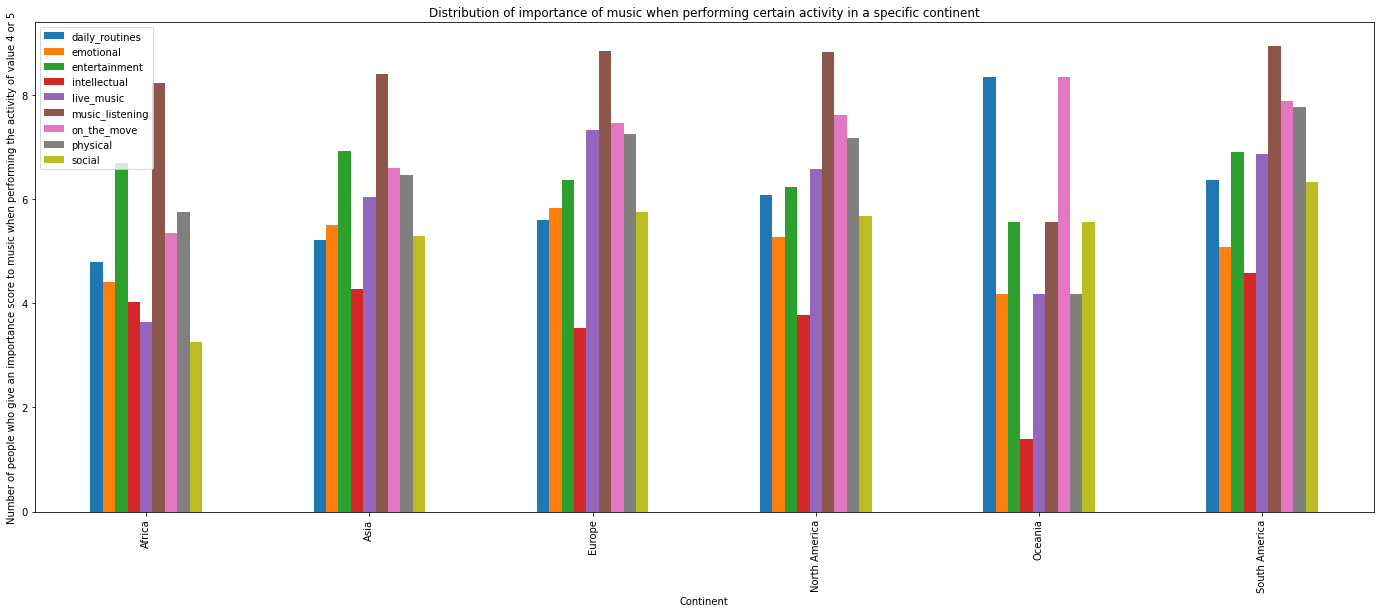

In [284]:
ax = plotpivot_activities_musical_users_continent_query.plot.bar(figsize=(24,9))
ax.set_ylabel('Number of people who give an importance score to music when performing the activity of value 4 or 5')
ax.set_xlabel('Continent')
ax.set_title('Distribution of importance of music when performing certain activity in a specific continent')
ax.legend(loc='upper left')
plt.show()

As expected music is not fundamental when doing intellectual activities, it's interesting to notice that in South America music is more important when doing social activities, than in other continents. And in Africa while performing daily routines music is not so important as it is for example in Oceania.

#### AGE GROUP

In [285]:
df_activities_musical_users_group_query = df_activities_musical_users.groupby(['age_group','activity','preferenceDegree']).agg({'userid':'count'})
df_activities_musical_users_group_query.rename(columns = {'userid':'count'}, inplace = True)
df_activities_musical_users_group_query['percentage'] = round(df_activities_musical_users_group_query.groupby(level=['age_group']).apply(lambda x:100 * x / float(x.sum())),2)
df_activities_musical_users_group_query = df_activities_musical_users_group_query.query("preferenceDegree == 5 or preferenceDegree == 4")
df_activities_musical_users_group_query.head(15)

count  percentage
age_group activity        preferenceDegree                   
20-29     daily_routines  4                   326        3.39
                          5                   236        2.45
          emotional       4                   265        2.75
                          5                   276        2.87
          entertainment   4                   387        4.02
                          5                   295        3.06
          intellectual    4                   294        3.05
                          5                   148        1.54
          live_music      4                   272        2.82
                          5                   381        3.96
          music_listening 4                   289        3.00
                          5                   558        5.79
          on_the_move     4                   310        3.22
                          5                   409        4.25
          physical        4                   341        3.54

In [286]:
df_activities_musical_users_group_query = df_activities_musical_users_group_query.groupby(level=['age_group', 'activity'], axis=0).sum()
df_activities_musical_users_group_query

count  percentage
age_group activity                          
20-29     daily_routines     562        5.84
          emotional          541        5.62
          entertainment      682        7.08
          intellectual       442        4.59
          live_music         653        6.78
          music_listening    847        8.79
          on_the_move        719        7.47
          physical           682        7.08
          social             569        5.91
30-39     daily_routines     441        5.63
          emotional          444        5.67
          entertainment      512        6.55
          intellectual       270        3.46
          live_music         547        7.00
          music_listening    686        8.77
          on_the_move        559        7.15
          physical           557        7.12
          social             450        5.76
40-49     daily_routines     151        5.23
          emotional          155        5.36
          entertainment      148        5.12
          intellectual        81        2.80
          live_music         184        6.37
          music_listening    247        8.55
          on_the_move        210        7.27
          physical           203        7.03
          social             141        4.88
50-59     daily_routines      47        4.93
          emotional           50        5.24
          entertainment       48        5.03
          intellectual        27        2.83
          live_music          58        6.08
          music_listening     81        8.49
          on_the_move         64        6.71
          physical            57        5.97
          social              39        4.09
60+       daily_routines      21        5.07
          emotional           21        5.07
          entertainment       26        6.28
          intellectual        13        3.14
          live_music          25        6.04
          music_listening     32        7.73
          on_the_move         24        5.79
          physical            28        6.77
          social              23        5.56
<20       daily_routines      44        5.26
          emotional           45        5.38
          entertainment       68        8.12
          intellectual        45        5.38
          live_music          55        6.57
          music_listening     70        8.36
          on_the_move         55        6.57
          physical            60        7.17
          social              46        5.50

In [287]:
plotpivot_df_activities_musical_users_group_query = pd.pivot_table(df_activities_musical_users_group_query, index='age_group', columns='activity', values='percentage')
plotpivot_df_activities_musical_users_group_query

activity,daily_routines,emotional,entertainment,intellectual,live_music,music_listening,on_the_move,physical,social
age_group,,,,,,,,,
20-29,5.84,5.62,7.08,4.59,6.78,8.79,7.47,7.08,5.91
30-39,5.63,5.67,6.55,3.46,7.00,8.77,7.15,7.12,5.76
40-49,5.23,5.36,5.12,2.80,6.37,8.55,7.27,7.03,4.88
50-59,4.93,5.24,5.03,2.83,6.08,8.49,6.71,5.97,4.09
60+,5.07,5.07,6.28,3.14,6.04,7.73,5.79,6.77,5.56
<20,5.26,5.38,8.12,5.38,6.57,8.36,6.57,7.17,5.50


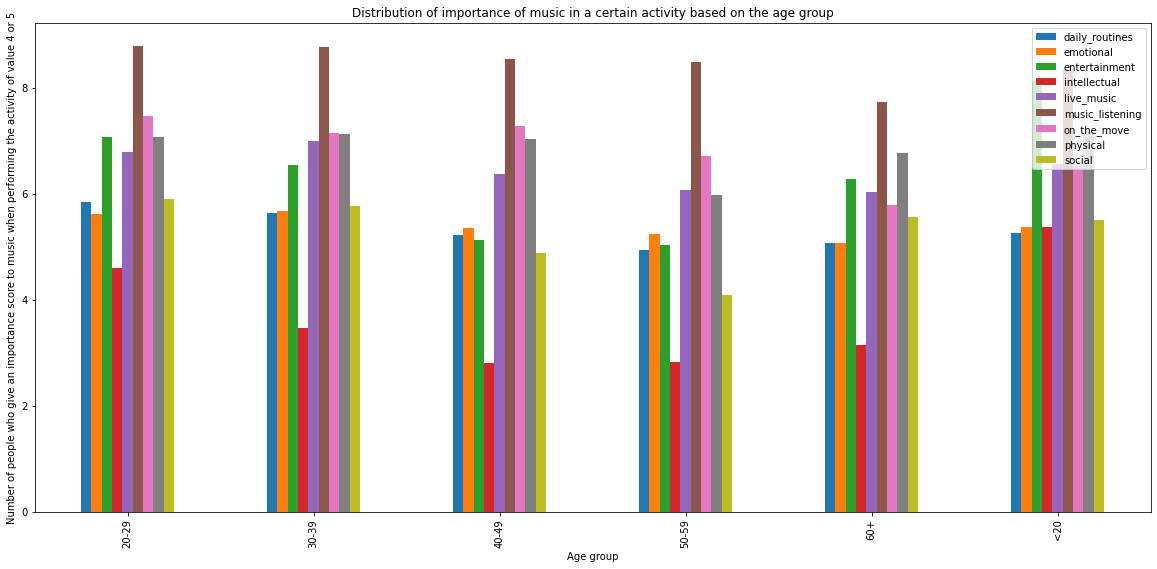

In [288]:
ax = plotpivot_df_activities_musical_users_group_query.plot.bar(figsize=(20,9))
ax.set_ylabel('Number of people who give an importance score to music when performing the activity of value 4 or 5')
ax.set_xlabel('Age group')
ax.set_title('Distribution of importance of music in a certain activity based on the age group')
ax.legend(loc='upper right')
plt.show()

For young people music is very important when performing physical activities and daily routines, as we are used to see them walking with headphones on, or listening to music while moving from one place to another (for example on buses or trains). Also social activities are performed listening to music, and we can think about bars, pubs, discos etc. It is also quite common to see young people listening to music while studying in order to concentrate.

#### MUSICAL EXPERTIES

I think it's interesting to see how respondent with different levels of musical expertise rated the importance of music in performing the above mentioned activities.

In [289]:
df_activities_musical_users_exp_query = df_activities_musical_users.groupby(['expertise','activity','preferenceDegree']).agg({'userid':'count'})
df_activities_musical_users_exp_query.rename(columns = {'userid':'count'}, inplace = True)
df_activities_musical_users_exp_query['percentage'] = round(df_activities_musical_users_exp_query.groupby(level=['expertise']).apply(lambda x:100 * x / float(x.sum())),2)
df_activities_musical_users_exp_query = df_activities_musical_users_exp_query.query("preferenceDegree == 5 or preferenceDegree == 4")
df_activities_musical_users_exp_query.head(15)

count  percentage
expertise     activity        preferenceDegree                   
1 Nonmusician daily_routines  4                   179        3.02
                              5                    84        1.42
              emotional       4                   157        2.65
                              5                   109        1.84
              entertainment   4                   226        3.82
                              5                   118        1.99
              intellectual    4                   140        2.36
                              5                    50        0.84
              live_music      4                   146        2.47
                              5                   162        2.74
              music_listening 4                   163        2.75
                              5                   265        4.47
              on_the_move     4                   208        3.51
                              5                   144        2.43
              physical        4                   222        3.75

In [290]:
df_activities_musical_users_exp_query = df_activities_musical_users_exp_query.groupby(level=['expertise', 'activity'], axis=0).sum()
df_activities_musical_users_exp_query

count  percentage
expertise                    activity                          
1 Nonmusician                daily_routines     263        4.44
                             emotional          266        4.49
                             entertainment      344        5.81
                             intellectual       190        3.20
                             live_music         308        5.21
                             music_listening    428        7.22
                             on_the_move        352        5.94
                             physical           352        5.95
                             social             275        4.65
2 Music-loving nonmusician   daily_routines     613        5.69
                             emotional          607        5.64
                             entertainment      727        6.76
                             intellectual       400        3.72
                             live_music         764        7.11
                             music_listening   1007        9.36
                             on_the_move        831        7.72
                             physical           797        7.41
                             social             610        5.67
3 Amateur musician           daily_routines     243        6.36
                             emotional          243        6.35
                             entertainment      258        6.74
                             intellectual       155        4.05
                             live_music         276        7.22
                             music_listening    330        8.63
                             on_the_move        278        7.27
                             physical           277        7.25
                             social             239        6.25
4 Serious amateur musician   daily_routines      55        5.77
                             emotional           51        5.35
                             entertainment       60        6.29
                             intellectual        52        5.45
                             live_music          71        7.45
                             music_listening     83        8.70
                             on_the_move         72        7.54
                             physical            66        6.92
                             social              58        6.08
5 Semi-professional musician daily_routines      54        8.22
                             emotional           49        7.46
                             entertainment       57        8.67
                             intellectual        51        7.76
                             live_music          63        9.59
                             music_listening     71       10.81
                             on_the_move         61        9.28
                             physical            58        8.83
                             social              50        7.61
6 Professional musician      daily_routines      38        8.79
                             emotional           40        9.26
                             entertainment       38        8.80
                             intellectual        30        6.95
                             live_music          40        9.26
                             music_listening     44       10.18
                             on_the_move         37        8.56
                             physical            37        8.56
                             social              36        8.34

In [291]:
plotpivot_df_activities_musical_users_exp_query = pd.pivot_table(df_activities_musical_users_exp_query, index='expertise', columns='activity', values='percentage')
plotpivot_df_activities_musical_users_exp_query

activity,daily_routines,emotional,entertainment,intellectual,live_music,music_listening,on_the_move,physical,social
expertise,,,,,,,,,
1 Nonmusician,4.44,4.49,5.81,3.20,5.21,7.22,5.94,5.95,4.65
2 Music-loving nonmusician,5.69,5.64,6.76,3.72,7.11,9.36,7.72,7.41,5.67
3 Amateur musician,6.36,6.35,6.74,4.05,7.22,8.63,7.27,7.25,6.25
4 Serious amateur musician,5.77,5.35,6.29,5.45,7.45,8.70,7.54,6.92,6.08
5 Semi-professional musician,8.22,7.46,8.67,7.76,9.59,10.81,9.28,8.83,7.61
6 Professional musician,8.79,9.26,8.80,6.95,9.26,10.18,8.56,8.56,8.34


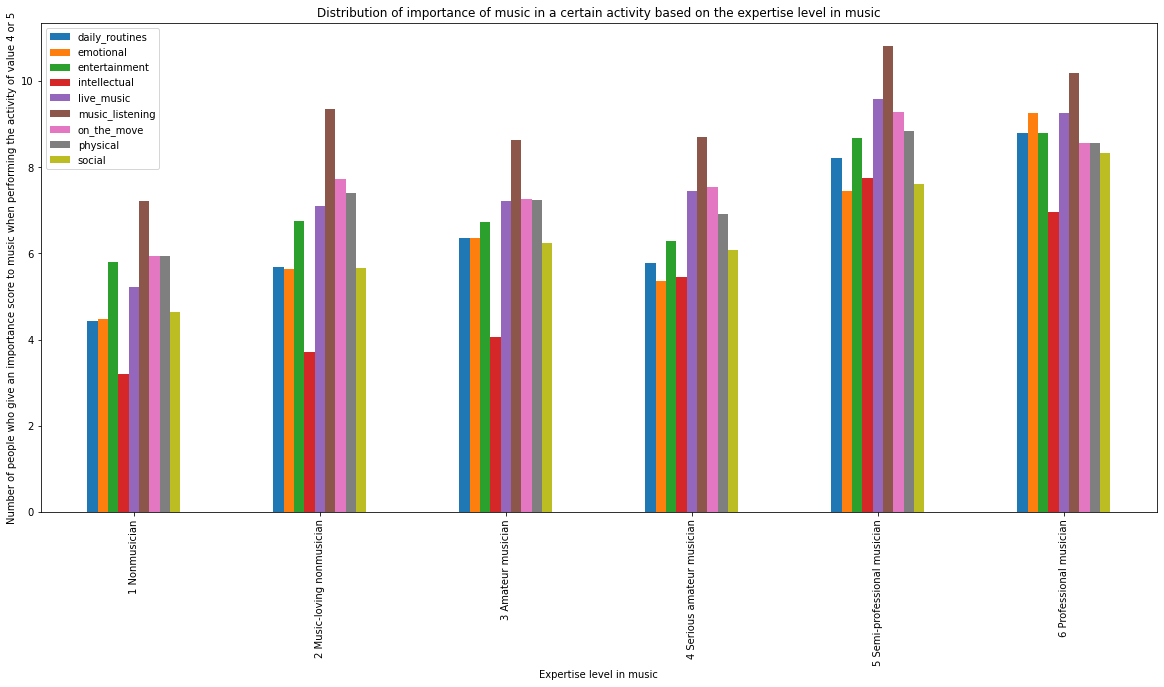

In [292]:
ax = plotpivot_df_activities_musical_users_exp_query.plot.bar(figsize=(20,9))
ax.set_ylabel('Number of people who give an importance score to music when performing the activity of value 4 or 5')
ax.set_xlabel('Expertise level in music')
ax.set_title('Distribution of importance of music in a certain activity based on the expertise level in music')
ax.legend(loc='upper left')
plt.show()

As expected, the higher the level of expertise, the higher is the importance of music when performing other activities (excluded listening to music).
Entertainment has a higher value for semi-professional and professional users, I think this is related to the fact that they perform on stages or go more often to concerts than nonmusicians respondent.

## HUMAN ANNOTATIONS ACTIVITIES

### <b>Mood-activity tagging</b>

#### Check all activities that in your opinion fit music expressing the mood {X}

In [293]:
df_moodactivity = pd.read_csv('Data/moods_and_activities_in_music/moodactivity.csv')

In [294]:
df_moodactivity.head()

,userid,mood,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,5,encouraged,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5,inspired,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,5,smooth,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,6,peaceful,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,tragic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's see how many moods have been taken into consideration during this experiment.

In [295]:
df_moodactivity['mood'].nunique()

88

There are 88 unique moods


In [736]:
df_moodactivity.shape

(18559, 11)

Let's analyse the content of the dataset.

In [737]:
df_moodactivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18559 entries, 0 to 18558
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   userid                    18559 non-null  int64  
 1   mood                      18559 non-null  object 
 2   activity.daily_routines   17603 non-null  float64
 3   activity.emotional        17603 non-null  float64
 4   activity.entertainment    17603 non-null  float64
 5   activity.intellectual     17603 non-null  float64
 6   activity.live_music       17603 non-null  float64
 7   activity.music_listening  17603 non-null  float64
 8   activity.on_the_move      17603 non-null  float64
 9   activity.physical         17603 non-null  float64
 10  activity.social           17603 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.6+ MB


In [296]:
df_moodactivity.isna().sum()

userid                        0
mood                          0
activity.daily_routines     956
activity.emotional          956
activity.entertainment      956
activity.intellectual       956
activity.live_music         956
activity.music_listening    956
activity.on_the_move        956
activity.physical           956
activity.social             956
dtype: int64

In [297]:
df_moodactivity.loc[df_moodactivity['activity.daily_routines'].isna()]

,userid,mood,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
182,24,loud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,25,angry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,25,bitchy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,25,delighted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,25,fantastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18424,3359,in_love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18453,3367,loud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18456,3367,sorry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18496,3384,satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like people did not put neither 0 nor 1 when a mood was not familiar to them. We can say it was 'skipped'.

In [311]:
df_moodactivity.fillna(3, inplace=True)
df_moodactivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18559 entries, 0 to 18558
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   userid                    18559 non-null  int64 
 1   mood                      18559 non-null  object
 2   activity.daily_routines   18559 non-null  int32 
 3   activity.emotional        18559 non-null  int32 
 4   activity.entertainment    18559 non-null  int32 
 5   activity.intellectual     18559 non-null  int32 
 6   activity.live_music       18559 non-null  int32 
 7   activity.music_listening  18559 non-null  int32 
 8   activity.on_the_move      18559 non-null  int32 
 9   activity.physical         18559 non-null  int32 
 10  activity.social           18559 non-null  int32 
dtypes: int32(9), int64(1), object(1)
memory usage: 942.6+ KB


In [312]:
#Convert all the values into integers values to facilitate the rename operation performed in the next cell
columns_to_convert = df_moodactivity.columns[2:]
df_moodactivity[columns_to_convert] = df_moodactivity[columns_to_convert].astype(int)
df_moodactivity

,userid,mood,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,5,encouraged,0,1,0,0,0,0,1,0,0
1,5,inspired,1,1,0,1,1,0,0,1,0
2,5,smooth,1,1,1,1,1,0,0,1,1
3,6,peaceful,0,0,0,0,0,0,1,0,0
4,6,tragic,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18554,3416,intense,0,0,0,0,0,0,0,1,0
18555,3417,enthusiastic,0,0,0,0,0,1,1,1,0
18556,3417,happy,0,0,1,0,1,0,1,1,1
18557,3418,driving,0,0,0,0,0,0,1,1,0


Let's replace for a better understanding the numerical categorisation with a textual one.

In [315]:
replace = {1:'fits', 0:'does not fit', 3:'unfamiliar mood'}

In [316]:
df_moodactivity_rep = df_moodactivity.replace(replace)
df_moodactivity_rep

,userid,mood,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,5,encouraged,does not fit,fits,does not fit,does not fit,does not fit,does not fit,fits,does not fit,does not fit
1,5,inspired,fits,fits,does not fit,fits,fits,does not fit,does not fit,fits,does not fit
2,5,smooth,fits,fits,fits,fits,fits,does not fit,does not fit,fits,fits
3,6,peaceful,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,fits,does not fit,does not fit
4,6,tragic,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit
...,...,...,...,...,...,...,...,...,...,...,...
18554,3416,intense,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,fits,does not fit
18555,3417,enthusiastic,does not fit,does not fit,does not fit,does not fit,does not fit,fits,fits,fits,does not fit
18556,3417,happy,does not fit,does not fit,fits,does not fit,fits,does not fit,fits,fits,fits
18557,3418,driving,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,fits,fits,does not fit


Now I perform the unpivot.

In [319]:
df_moodactivity_unpivot = df_moodactivity_rep.melt(id_vars=['userid','mood'], var_name='activity', value_name='fits_or_not')
df_moodactivity_unpivot['activity'].replace('activity.','', regex=True,inplace=True)
df_moodactivity_unpivot.loc[df_moodactivity_unpivot['userid'] == 5]

,userid,mood,activity,fits_or_not
0,5,encouraged,daily_routines,does not fit
1,5,inspired,daily_routines,fits
2,5,smooth,daily_routines,fits
18559,5,encouraged,emotional,fits
18560,5,inspired,emotional,fits
18561,5,smooth,emotional,fits
37118,5,encouraged,entertainment,does not fit
37119,5,inspired,entertainment,does not fit
37120,5,smooth,entertainment,fits
55677,5,encouraged,intellectual,does not fit


Put together information about users.

In [320]:
df_moodactivity_users = pd.merge( df_moodactivity_unpivot, df_users, how='left', on='userid' )
df_moodactivity_users.loc[df_moodactivity_users['userid'] == 5]

,userid,mood,activity,fits_or_not,expertise,language_skill,gender,age,country,continent,age_group
0,5,encouraged,daily_routines,does not fit,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
1,5,inspired,daily_routines,fits,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
2,5,smooth,daily_routines,fits,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
18559,5,encouraged,emotional,fits,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
18560,5,inspired,emotional,fits,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
18561,5,smooth,emotional,fits,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
37118,5,encouraged,entertainment,does not fit,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
37119,5,inspired,entertainment,does not fit,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
37120,5,smooth,entertainment,fits,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39
55677,5,encouraged,intellectual,does not fit,4 Serious amateur musician,4 Professional working proficiency,male,32.0,GB,Europe,30-39


Group by activity and mood to see how many "fits" the users gave to each activity.

In [321]:
df_moodactivity_users_grouped = df_moodactivity_users.groupby(['activity','mood','fits_or_not']).agg({'userid':'count'})
df_moodactivity_users_grouped.rename(columns = {'userid':'count'}, inplace = True)
#df_moodactivity_users_grouped['percentage'] = round(df_moodactivity_users_grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
df_moodactivity_users_grouped

count
activity       mood       fits_or_not           
daily_routines adorable   does not fit       149
                          fits                50
                          unfamiliar mood     12
               aggressive does not fit       169
                          fits                32
...                                          ...
social         tranquil   fits                33
                          unfamiliar mood      8
               uplifting  does not fit       152
                          fits                42
                          unfamiliar mood     16

[2376 rows x 1 columns]

Lets' filter only on the activity that the user identified as "fitting with the mood".

In [322]:
df_moodactivity_users_grouped_fits = df_moodactivity_users_grouped.loc[df_moodactivity_users_grouped.index.get_level_values(2) == 'fits']
df_moodactivity_users_grouped_fits_sorted = df_moodactivity_users_grouped_fits.sort_values(by=df_moodactivity_users_grouped_fits.columns[0], ascending=False)
df_moodactivity_users_grouped_fits_sorted

count
activity      mood        fits_or_not       
on_the_move   driving     fits           117
emotional     emotional   fits           113
              in_love     fits           111
              romantic    fits           111
              sentimental fits           110
...                                      ...
intellectual  pulsating   fits            15
entertainment melancholic fits            15
intellectual  dancing     fits            15
              furious     fits            14
              angry       fits            11

[792 rows x 1 columns]

Let's create variables filtered on the index type of activity to create multiple subplots in the visualisation.

In [323]:
music_listening = df_moodactivity_users_grouped_fits_sorted.loc[df_moodactivity_users_grouped_fits_sorted.index.get_level_values(0) == 'music_listening'].droplevel(2)
physical = df_moodactivity_users_grouped_fits_sorted.loc[df_moodactivity_users_grouped_fits_sorted.index.get_level_values(0) == 'physical'].droplevel(2)
intellectual = df_moodactivity_users_grouped_fits_sorted.loc[df_moodactivity_users_grouped_fits_sorted.index.get_level_values(0) == 'intellectual'].droplevel(2)
on_the_move = df_moodactivity_users_grouped_fits_sorted.loc[df_moodactivity_users_grouped_fits_sorted.index.get_level_values(0) == 'on_the_move'].droplevel(2)
daily_routines = df_moodactivity_users_grouped_fits_sorted.loc[df_moodactivity_users_grouped_fits_sorted.index.get_level_values(0) == 'daily_routines'].droplevel(2)
entertainment = df_moodactivity_users_grouped_fits_sorted.loc[df_moodactivity_users_grouped_fits_sorted.index.get_level_values(0) == 'entertainment'].droplevel(2)
emotional = df_moodactivity_users_grouped_fits_sorted.loc[df_moodactivity_users_grouped_fits_sorted.index.get_level_values(0) == 'emotional'].droplevel(2)
social = df_moodactivity_users_grouped_fits_sorted.loc[df_moodactivity_users_grouped_fits_sorted.index.get_level_values(0) == 'social'].droplevel(2)

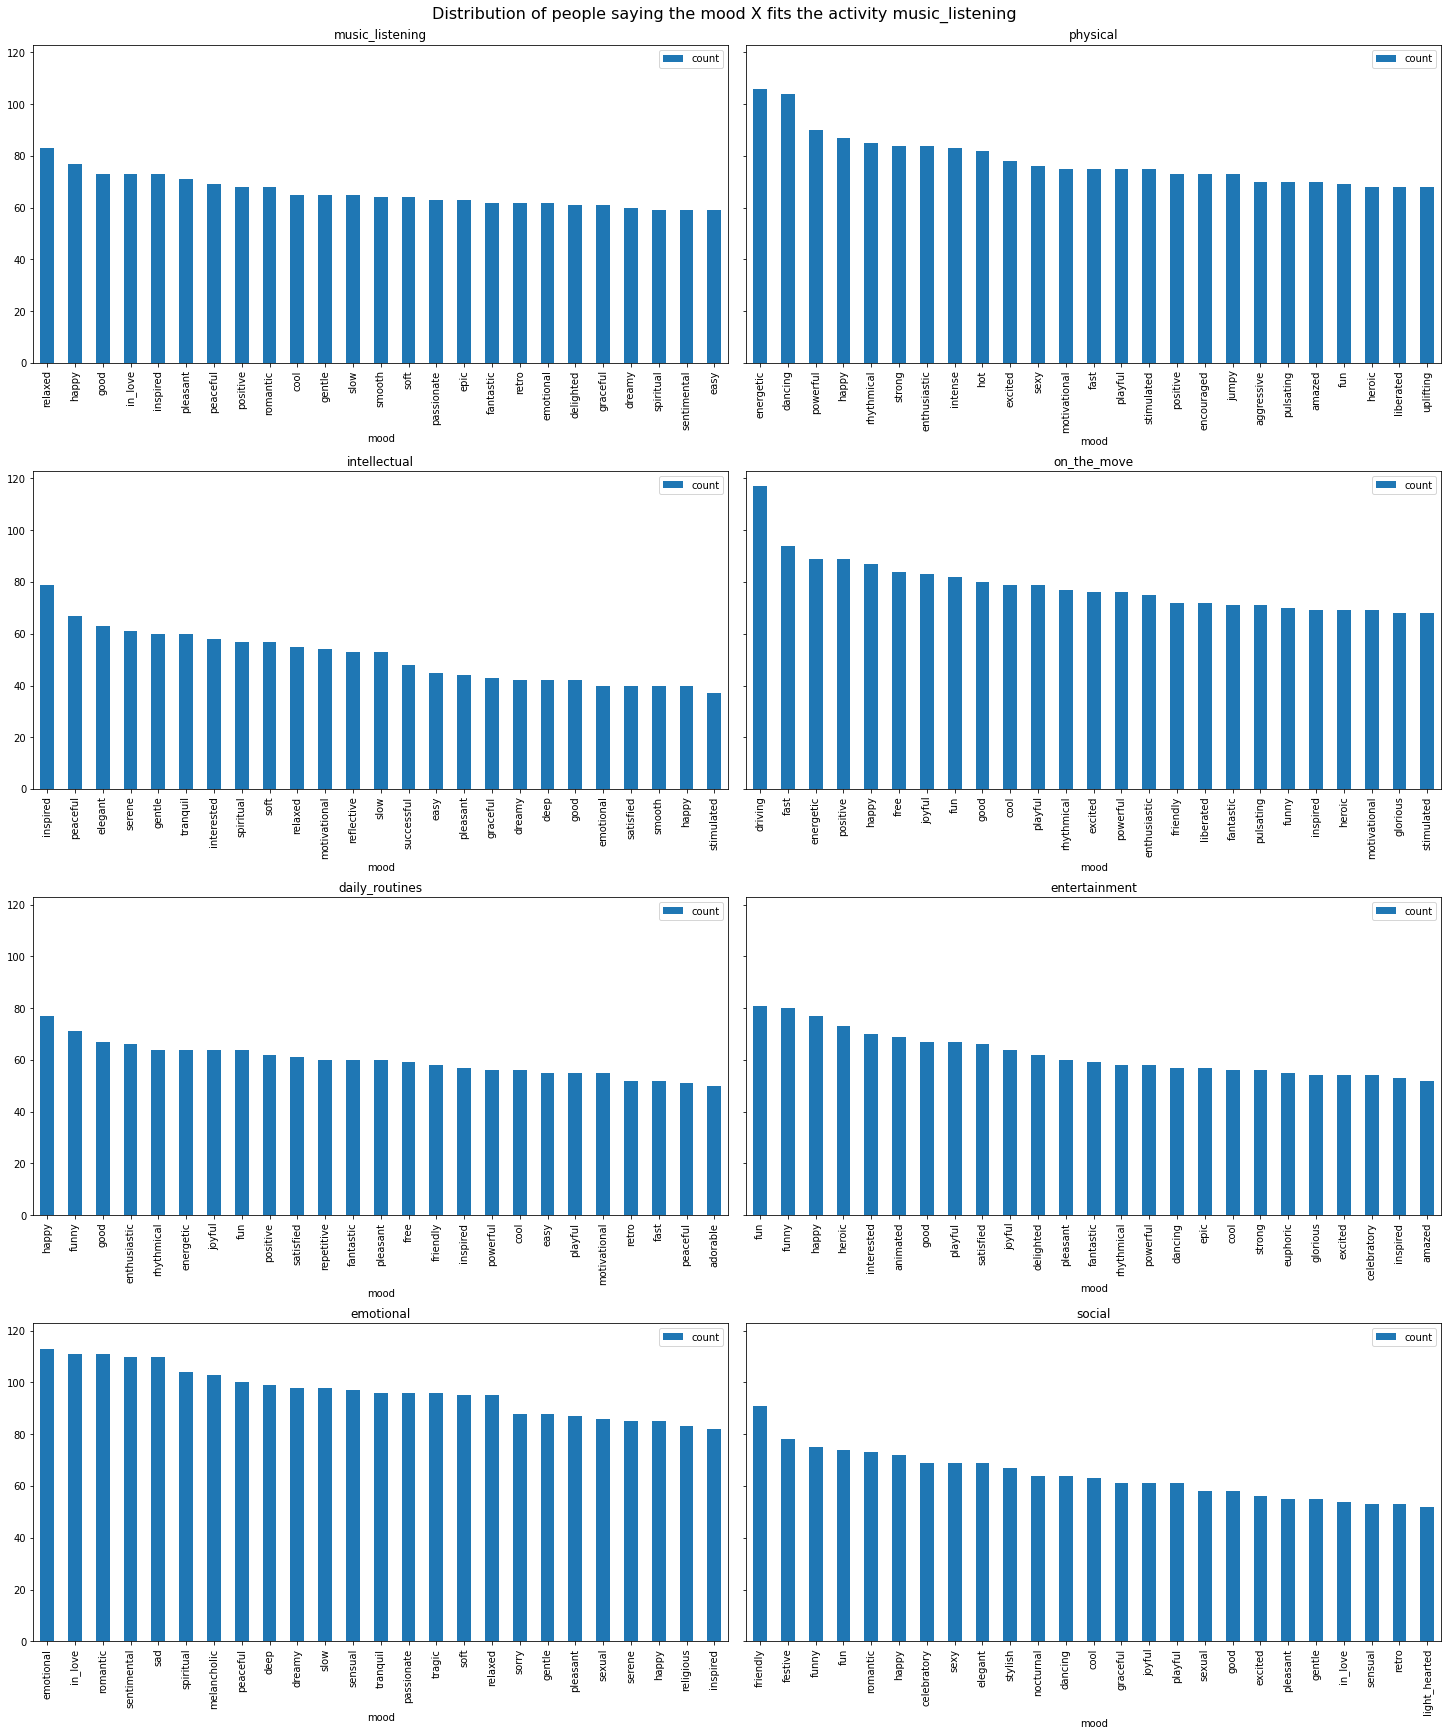

In [328]:
f, ax = plt.subplots(ncols=2, nrows=4, sharey=True, layout='constrained', figsize=(20,24))

music_listening.reset_index(['activity']).head(25).plot(ax=ax[0,0], kind='bar', rot=90)
physical.reset_index(['activity']).head(25).plot(ax=ax[0,1], kind='bar', rot=90)
intellectual.reset_index(['activity']).head(25).plot(ax=ax[1,0], kind='bar', rot=90)
on_the_move.reset_index(['activity']).head(25).plot(ax=ax[1,1], kind='bar', rot=90)
daily_routines.reset_index(['activity']).head(25).plot(ax=ax[2,0], kind='bar', rot=90)
entertainment.reset_index(['activity']).head(25).plot(ax=ax[2,1], kind='bar', rot=90)
emotional.reset_index(['activity']).head(25).plot(ax=ax[3,0], kind='bar', rot=90)
social.reset_index(['activity']).head(25).plot(ax=ax[3,1], kind='bar', rot=90)

# Set titles for subplots
ax[0,0].set_title('music_listening')
ax[0,1].set_title('physical')
ax[1,0].set_title('intellectual')
ax[1,1].set_title('on_the_move')
ax[2,0].set_title('daily_routines')
ax[2,1].set_title('entertainment')
ax[3,0].set_title('emotional')
ax[3,1].set_title('social')

f.suptitle('Distribution of people saying the mood X fits the activity music_listening', fontsize=16 )
plt.show()

I've selected the top 20 ranked moods for each activity, and from the subplots we can see that some moods fit more than one activity.
We can see that the concept of mood has a very broad significate, because terms like "driving, stylish, in love" are not really moods, but more physical and mental states.

### <b>Mood-search</b><br> 

First, a user was given a list of moods and were presented a question: <b> "Select a mood term that you can associate with a music example". </b><br>
Then, a track was searched and submitted <b>"Search and submit a music example that expresses the mood {selected mood}". </b><br>
Finally, activities were associated for the track <b>"Check all activities that fit the selected track expressing the mood {selected mood}".</b>

In [376]:
df_tracks = pd.read_csv('Data/moods_and_activities_in_music/tracks.csv')

There are 5129 tracks.

In [334]:
df_tracks.shape

(5129, 8)

In [335]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5129 entries, 0 to 5128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   trackid       5129 non-null   int64 
 1   artistname    5129 non-null   object
 2   tracknumber   5129 non-null   int64 
 3   duration      5129 non-null   int64 
 4   artistid      5129 non-null   int64 
 5   tracktitle    5129 non-null   object
 6   releasetitle  5129 non-null   object
 7   releaseid     5129 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 320.7+ KB


In [336]:
df_tracks.head(20)

,trackid,artistname,tracknumber,duration,artistid,tracktitle,releasetitle,releaseid
0,148,Blink 182,8,168,2,All The Small Things,Enema Of The State,20
1,155,Blink 182,3,193,2,Aliens Exist,Enema Of The State,20
2,565,India.Arie,16,245,64,Interested,Voyage To India (Limited Edition),49
3,684,Amy Winehouse,4,201,4,Fuck Me Pumps,Frank,56
4,688,Amy Winehouse,13,797,4,Amy Amy Amy / Outro,Frank,56
5,695,Amy Winehouse,6,209,4,Moody's Mood For Love / Teo Licks,Frank,56
6,1445,Erykah Badu,2,226,103,On & On,Baduizm,106
7,1492,Blink 182,10,251,2,Always,blink-182,109
8,1502,Blink 182,3,227,2,I Miss You,blink-182,109
9,1528,Keane,12,278,1,Bedshaped,Hopes And Fears,112


Use a regex to replace unicode symbols representing characters.

In [367]:
repl = {'%u2019':'\'', '&amp;': '&' }

In [368]:
df_tracks['artistname'] = df_tracks['artistname'].replace(repl)

Let's see how many artist where chosen for this experiment.

In [369]:
df_tracks['artistname'].drop_duplicates().count()

2456

2.456 were chosen for this experiment.

In [341]:
df_tracks['artistname'].value_counts()

Michael Jackson                 35
Madonna                         35
Eminem                          34
Queen                           32
Various Artists                 31
                                ..
Tito Paris                       1
Music Instructor (Feat. ABE)     1
Augustus Pablo                   1
Ben Howard                       1
Reyes De Cancion                 1
Name: artistname, Length: 2456, dtype: int64

Let's see the artists name in a list.

In [342]:
artists = df_tracks['artistname'].unique().tolist()
print(artists)

['Blink 182', 'India.Arie', 'Amy Winehouse', 'Erykah Badu', 'Keane', '3 Doors Down', 'Bob Marley & The Wailers', 'Nick Drake', 'Coldplay', 'Pulp', 'Counting Crows', 'Black Eyed Peas', 'Kool & The Gang', 'U2', 'JoJo', 'Norah Jones', 'Gorillaz', 'Frank Sinatra', 'Robbie Williams', 'Jamelia', 'Pet Shop Boys', 'Shirley Bassey', 'The Beach Boys', "Fun Lovin' Criminals", 'Radiohead', 'Supergrass', 'The Verve', 'Massive Attack', 'Morrissey', 'David Bowie', 'Pink Floyd', 'Arturo Sandoval', 'Rammstein', 'Marilyn Manson', 'Blue', 'Megadeth', 'Gwen Stefani', 'Shania Twain', 'Jay Sean', 'Orbital', 'Anouk', "Guns N' Roses", 'Soft Cell', 'The Wonder Stuff', 'Rainbow', 'The Cure', 'Sting', 'Dire Straits', 'Game', 'Tears For Fears', 'Keith Sweat', 'Michael Bublé', 'Ambrosia', 'Madonna', 'The Corrs', 'Simple Plan', 'Red Hot Chili Peppers', 'The Polyphonic Spree', '50 Cent', 'The Smashing Pumpkins', 'Daft Punk', 'Brian Eno', 'The Pussycat Dolls', 'Archive', 'Bond', 'Alphaville', 'America', 'Extremoduro'

Let's see a wordlcloud graphical visualisation, representing with a bigger font the most recurrent artists.

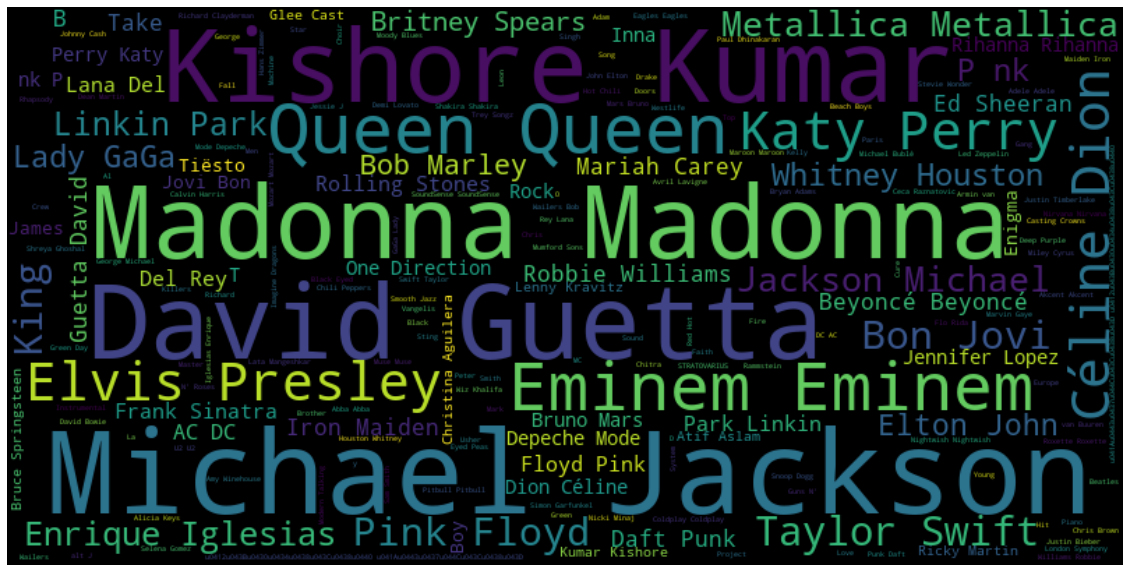

In [343]:
from wordcloud import WordCloud
import re

# Concatenate all text from the 'Text' column
text = ' '.join(df_tracks['artistname'])
text = re.sub(r"amp|%|%\w*\d\b|Music|Karaoke|Band|DJ|Orchestra|feat|Various|Artists", "", text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 12)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

There are very famous artists like Madonna, Michael Jackson, David Guetta, Elvis Presley, Eminem, etc.

#### Search and submit a music example that expresses the mood {X} and check all activities that fit the selected track expressing the mood {X}

In [344]:
df_searches = pd.read_csv('Data/moods_and_activities_in_music/searches.csv')
df_searches

,userid,trackid,mood.adorable,mood.aggressive,mood.amazed,mood.angry,mood.animated,mood.bitchy,mood.bored,mood.celebratory,...,mood.uplifting,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,5,16634384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,0,0,1,1,0,0,1
1,5,13167237,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1,1,0,1,1,1,0,1,0
2,5,32230027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,1,0
3,10,3698192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,1,0,1
4,7,9660809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,2429,33576075,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,1,0,1,0,1,1,1,1,1
8677,2470,168497,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,1,1,0,0,0,1,1,0,1
8678,1607,38751606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,1,1,0,0,1,1,0,1,1
8679,2429,33576075,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,...,NaN,1,0,1,0,1,1,1,1,1


In [345]:
df_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8681 entries, 0 to 8680
Data columns (total 99 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   userid                    8681 non-null   int64  
 1   trackid                   8681 non-null   int64  
 2   mood.adorable             1812 non-null   float64
 3   mood.aggressive           1693 non-null   float64
 4   mood.amazed               1778 non-null   float64
 5   mood.angry                1772 non-null   float64
 6   mood.animated             1757 non-null   float64
 7   mood.bitchy               1808 non-null   float64
 8   mood.bored                1760 non-null   float64
 9   mood.celebratory          1760 non-null   float64
 10  mood.cool                 1556 non-null   float64
 11  mood.dancing              1534 non-null   float64
 12  mood.deep                 1833 non-null   float64
 13  mood.delighted            1754 non-null   float64
 14  mood.dra

Let's do as done before: the NaN values must be replaced with a numerical value 3.

In [346]:
columns_to_convert = df_searches.columns[2:]

df_searches[columns_to_convert] = df_searches[columns_to_convert].fillna(3).astype(int)
df_searches

,userid,trackid,mood.adorable,mood.aggressive,mood.amazed,mood.angry,mood.animated,mood.bitchy,mood.bored,mood.celebratory,...,mood.uplifting,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,5,16634384,3,3,3,3,3,3,3,3,...,3,1,1,0,0,1,1,0,0,1
1,5,13167237,3,3,3,1,3,3,3,3,...,3,1,1,0,1,1,1,0,1,0
2,5,32230027,3,3,3,3,3,3,3,3,...,3,0,0,0,0,0,0,0,1,0
3,10,3698192,3,3,3,3,3,3,3,3,...,3,0,0,0,0,0,0,1,0,1
4,7,9660809,3,3,3,3,3,3,3,3,...,3,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,2429,33576075,3,3,0,3,3,0,0,3,...,3,1,0,1,0,1,1,1,1,1
8677,2470,168497,0,3,3,3,3,0,0,0,...,3,1,1,0,0,0,1,1,0,1
8678,1607,38751606,3,3,3,3,3,3,3,0,...,0,1,1,0,0,1,1,0,1,1
8679,2429,33576075,1,3,3,0,0,3,3,0,...,3,1,0,1,0,1,1,1,1,1


Now I change again the numerical value with a textual value.

In [347]:
replacements = {1:'fits', 0:'does not fit', 3:'missing'}

df_searches_rep = df_searches.replace(replacements)
df_searches_rep

,userid,trackid,mood.adorable,mood.aggressive,mood.amazed,mood.angry,mood.animated,mood.bitchy,mood.bored,mood.celebratory,...,mood.uplifting,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,5,16634384,missing,missing,missing,missing,missing,missing,missing,missing,...,missing,fits,fits,does not fit,does not fit,fits,fits,does not fit,does not fit,fits
1,5,13167237,missing,missing,missing,fits,missing,missing,missing,missing,...,missing,fits,fits,does not fit,fits,fits,fits,does not fit,fits,does not fit
2,5,32230027,missing,missing,missing,missing,missing,missing,missing,missing,...,missing,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,fits,does not fit
3,10,3698192,missing,missing,missing,missing,missing,missing,missing,missing,...,missing,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,fits,does not fit,fits
4,7,9660809,missing,missing,missing,missing,missing,missing,missing,missing,...,missing,does not fit,does not fit,does not fit,does not fit,does not fit,fits,does not fit,does not fit,does not fit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,2429,33576075,missing,missing,does not fit,missing,missing,does not fit,does not fit,missing,...,missing,fits,does not fit,fits,does not fit,fits,fits,fits,fits,fits
8677,2470,168497,does not fit,missing,missing,missing,missing,does not fit,does not fit,does not fit,...,missing,fits,fits,does not fit,does not fit,does not fit,fits,fits,does not fit,fits
8678,1607,38751606,missing,missing,missing,missing,missing,missing,missing,does not fit,...,does not fit,fits,fits,does not fit,does not fit,fits,fits,does not fit,fits,fits
8679,2429,33576075,fits,missing,missing,does not fit,does not fit,missing,missing,does not fit,...,missing,fits,does not fit,fits,does not fit,fits,fits,fits,fits,fits


Unpivot and join with tracks informations

In [348]:
replacement = {'activity.': '', 'mood.': ''}

df_searches_rep_unpivot = df_searches_rep.melt(id_vars=['userid','trackid'], var_name='researched', value_name='fits_or_not')
df_searches_rep_unpivot['researched'] = df_searches_rep_unpivot['researched'].replace(replacement, regex=True)
df_searches_rep_unpivot.loc[df_searches_rep_unpivot['userid'] == 5]

,userid,trackid,researched,fits_or_not
0,5,16634384,adorable,missing
1,5,13167237,adorable,missing
2,5,32230027,adorable,missing
8681,5,16634384,aggressive,missing
8682,5,13167237,aggressive,missing
...,...,...,...,...
824696,5,13167237,physical,fits
824697,5,32230027,physical,fits
833376,5,16634384,social,fits
833377,5,13167237,social,does not fit


In [349]:
df_searches_rep_unpivot_fit = df_searches_rep_unpivot.loc[df_searches_rep_unpivot['fits_or_not'] == 'fits']
df_searches_rep_unpivot_fit

,userid,trackid,researched,fits_or_not
191,141,15071300,adorable,fits
253,389,8602464,adorable,fits
503,1076,7381171,adorable,fits
506,1076,7381171,adorable,fits
507,1076,7381171,adorable,fits
...,...,...,...,...
842046,1282,42665678,social,fits
842052,2429,33576075,social,fits
842053,2470,168497,social,fits
842054,1607,38751606,social,fits


In [350]:
df_searches_rep_unpivot_fit = pd.merge(df_searches_rep_unpivot_fit.iloc[:,:-1], df_tracks[['artistname','tracktitle','trackid']], how='left', on='trackid' )
df_searches_rep_unpivot_fit

,userid,trackid,researched,artistname,tracktitle
0,141,15071300,adorable,One Direction,What Makes You Beautiful
1,389,8602464,adorable,Aline Barros,Tempo de Mudar
2,1076,7381171,adorable,Enya,Orinoco Flow (2009 Remastered Version)
3,1076,7381171,adorable,Enya,Orinoco Flow (2009 Remastered Version)
4,1076,7381171,adorable,Enya,Orinoco Flow (2009 Remastered Version)
...,...,...,...,...,...
31713,1282,42665678,social,KK,Jhoom Barabar Jhoom
31714,2429,33576075,social,Pharrell Williams,Happy (From &quot;Despicable Me 2&quot;)
31715,2470,168497,social,The Righteous Brothers,Unchained Melody
31716,1607,38751606,social,Céline Dion,My Heart Will Go On (Love Theme from &quot;Tit...


Let's check with a random track id how the dataset structure looks like:

In [351]:
df_searches_rep_unpivot_fit.loc[df_searches_rep_unpivot_fit['trackid'] == 15071300]

,userid,trackid,researched,artistname,tracktitle
0,141,15071300,adorable,One Direction,What Makes You Beautiful
5519,391,15071300,playful,One Direction,What Makes You Beautiful
8194,689,15071300,stimulated,One Direction,What Makes You Beautiful
8736,141,15071300,daily_routines,One Direction,What Makes You Beautiful
11243,141,15071300,emotional,One Direction,What Makes You Beautiful
12679,391,15071300,emotional,One Direction,What Makes You Beautiful
15250,391,15071300,entertainment,One Direction,What Makes You Beautiful
17873,141,15071300,live_music,One Direction,What Makes You Beautiful
18917,391,15071300,live_music,One Direction,What Makes You Beautiful
19212,689,15071300,live_music,One Direction,What Makes You Beautiful


Let's group by artist name and researched mood.

In [352]:
df_searches_rep_unpivot_fit_grouped = df_searches_rep_unpivot_fit.groupby(['researched', 'artistname', 'tracktitle']).agg({'userid':'count'})
df_searches_rep_unpivot_fit_grouped.rename(columns = {'userid':'count'}, inplace = True)
#df_moodactivity_users_grouped['percentage'] = round(df_moodactivity_users_grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
df_searches_rep_unpivot_fit_grouped.tail(50)

count
researched artistname                        tracktitle                                               
uplifting  Eminem                            Space Bound                                             1
           Eminem ft. - Dr. Dre Tribute Band I need a doctor                                         1
           Inna                              Endless                                                 1
           Jordin Sparks                     One Step at a Time                                      1
           Justice Crew                      Que Sera                                                1
           Katy Perry                        Roar                                                    1
                                             Wide Awake                                              1
           Lenny Kravitz                     Are You Gonna Go My Way                                 2
           Living Colour                     Cult of Personality                                     1
           M People                          Renaissance (Roger S Uplifting Club Mix)                1
           M83                               Midnight City                                           1
           Marcos Witt                       Yo Te Busco                                             1
           Marvin Gaye                       Sexual Healing                                          1
           Michelle Branch                   You Set Me Free                                         1
           Mika                              Lollipop                                                1
           Moby                              Lift Me Up                                              1
           Mogwai                            Summer                                                  1
           Mukesh                            Suhana Safar (From &quot;Madhumati&quot;)               1
           Muse                              Butterflies and Hurricanes                              1
           Nirvana                           Smells Like Teen Spirit                                 1
           Noelia                            Spell (Ralphi Rosario Club Master) [feat. Timba...      1
           One Direction                     They Don't Know About Us                                1
           P!nk                              Beam Me Up                                              1
                                             Just Give Me a Reason                                   1
                                             True Love                                               1
           Pantera                           Uplift                                                  1
           Pendulum                          Tarantula (Ft. Fresh, $Pyda & Tenor Fly)                1
           Queen                             Don't Stop Me Now                                       1
           Rage Against The Machine          Killing In The Name (Album Version)                     1
           Rata Blanca                       Sólo Para Amarte                                        1
           Red Hot Chili Peppers             By The Way                                              1
           Regina Spektor                    Ghost Of Corporate Future                               1
           Robbie Williams                   Feel (Album Version)                                    1
           Sara Bareilles                    Brave                                                   1
           Sheppard                          Geronimo                                                1
           Sugarland                         Find The Beat Again                                     1
           TMC Movie Tunez                   Gonna Fly Now (Theme from Rocky) [From &quot;Ro...      1
           Take That                         The Flood                          

I will perform some visualisation on the dataset coming from the next activity which is basically the same activity, but in this first round people were asked to choose a song out of a database based on a mood suggested. <br>
In the next activity instead, people were asked to check moods based on a song they are listening. <br>
The difference, therefore, is that I can analyse how many users checked which type of activity and mood while being prompted with a song. <br>
The main difference is that maybe a mood to me evocates one song, but to another person that mood makes them remember another song. With the second analysis the same song is prompted to more users, so we have a common factor between each responendt.

### <b> Mood-tagging </b>

First, a user was asked to listen a given music example and was presented a list of moods. <br>
The user was then asked to tag the exmple with moods  <b> "Check zero or more moods that the music example expresses".  </b> <br>
Finally, activities were associated for the track <b> "Check all activities that in your opinion fit the music clip". </b> <br>

In [353]:
df_tags = pd.read_csv('Data/moods_and_activities_in_music/tags.csv')

In [354]:
df_tags.shape

(28550, 99)

In [355]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28550 entries, 0 to 28549
Data columns (total 99 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   userid                    28550 non-null  int64  
 1   trackid                   28550 non-null  int64  
 2   mood.adorable             7102 non-null   float64
 3   mood.aggressive           7174 non-null   float64
 4   mood.amazed               7172 non-null   float64
 5   mood.angry                7150 non-null   float64
 6   mood.animated             7169 non-null   float64
 7   mood.bitchy               7156 non-null   float64
 8   mood.bored                7102 non-null   float64
 9   mood.celebratory          7079 non-null   float64
 10  mood.cool                 7135 non-null   float64
 11  mood.dancing              7184 non-null   float64
 12  mood.deep                 7124 non-null   float64
 13  mood.delighted            7134 non-null   float64
 14  mood.d

In [356]:
df_tags.head(20)

,userid,trackid,mood.adorable,mood.aggressive,mood.amazed,mood.angry,mood.animated,mood.bitchy,mood.bored,mood.celebratory,...,mood.uplifting,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,1459,88887,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0,0,0,0,0,0,1,0,0
1,1147,1354038,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1,0,0,0,0,0,0,0
2,1147,6687288,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1,0,0,0,0,0,0,0
3,1147,6930066,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,1,0
4,1459,44725762,0.0,NaN,NaN,NaN,0.0,0.0,1.0,NaN,...,NaN,1,0,0,0,0,0,0,0,0
5,1147,3537881,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,0,1,0,0,0,0,0,0
6,1459,9566570,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0,0,0,0,0,0,1,0,0
7,1459,41036785,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,1,0,0,0,0,0,0,0,0
8,680,44892173,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,1,1,0,1,1,0,1,1,1
9,1459,4684617,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0,0,1,0,0,0,0,0,0


Same replace operation as the one performed above.

In [357]:
columns_to_convert = df_tags.columns[2:]

df_tags[columns_to_convert] = df_tags[columns_to_convert].fillna(3).astype(int)
df_tags

,userid,trackid,mood.adorable,mood.aggressive,mood.amazed,mood.angry,mood.animated,mood.bitchy,mood.bored,mood.celebratory,...,mood.uplifting,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,1459,88887,0,3,3,0,3,3,3,0,...,3,0,0,0,0,0,0,1,0,0
1,1147,1354038,3,0,0,3,3,3,3,3,...,3,0,1,0,0,0,0,0,0,0
2,1147,6687288,0,3,0,3,3,3,3,3,...,3,0,1,0,0,0,0,0,0,0
3,1147,6930066,3,0,3,3,3,3,3,3,...,3,0,0,0,0,0,0,0,1,0
4,1459,44725762,0,3,3,3,0,0,1,3,...,3,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28545,2182,11021050,3,3,0,3,3,3,3,1,...,0,1,0,1,0,1,1,1,1,1
28546,2182,20505129,3,3,3,0,3,3,3,3,...,3,0,0,0,0,0,0,0,1,0
28547,455,3237369,0,1,3,0,3,3,0,0,...,3,1,0,0,0,1,1,1,0,0
28548,2893,13688483,0,1,0,3,1,3,0,3,...,3,1,0,1,0,0,1,1,0,0


In [358]:
replacements = {1:'fits', 0:'does not fit', 3:'missing'}

df_tags_rep = df_tags.replace(replacements)
df_tags_rep

,userid,trackid,mood.adorable,mood.aggressive,mood.amazed,mood.angry,mood.animated,mood.bitchy,mood.bored,mood.celebratory,...,mood.uplifting,activity.daily_routines,activity.emotional,activity.entertainment,activity.intellectual,activity.live_music,activity.music_listening,activity.on_the_move,activity.physical,activity.social
0,1459,88887,does not fit,missing,missing,does not fit,missing,missing,missing,does not fit,...,missing,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,fits,does not fit,does not fit
1,1147,1354038,missing,does not fit,does not fit,missing,missing,missing,missing,missing,...,missing,does not fit,fits,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit
2,1147,6687288,does not fit,missing,does not fit,missing,missing,missing,missing,missing,...,missing,does not fit,fits,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit
3,1147,6930066,missing,does not fit,missing,missing,missing,missing,missing,missing,...,missing,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,fits,does not fit
4,1459,44725762,does not fit,missing,missing,missing,does not fit,does not fit,fits,missing,...,missing,fits,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28545,2182,11021050,missing,missing,does not fit,missing,missing,missing,missing,fits,...,does not fit,fits,does not fit,fits,does not fit,fits,fits,fits,fits,fits
28546,2182,20505129,missing,missing,missing,does not fit,missing,missing,missing,missing,...,missing,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,does not fit,fits,does not fit
28547,455,3237369,does not fit,fits,missing,does not fit,missing,missing,does not fit,does not fit,...,missing,fits,does not fit,does not fit,does not fit,fits,fits,fits,does not fit,does not fit
28548,2893,13688483,does not fit,fits,does not fit,missing,fits,missing,does not fit,missing,...,missing,fits,does not fit,fits,does not fit,does not fit,fits,fits,does not fit,does not fit


In [379]:
replacement = {'activity.': '', 'mood.': ''}

df_tags_rep_unpivot = df_tags_rep.melt(id_vars=['userid','trackid'], var_name='researched', value_name='fits_or_not')
df_tags_rep_unpivot['researched'] = df_tags_rep_unpivot['researched'].replace(replacement, regex=True)
df_tags_rep_unpivot_fit = df_tags_rep_unpivot.loc[df_tags_rep_unpivot['fits_or_not'] == 'fits']
df_tags_rep_unpivot_fit

,userid,trackid,researched,fits_or_not
28,680,15462689,adorable,fits
89,1459,29795232,adorable,fits
143,1459,228857,adorable,fits
149,602,20285608,adorable,fits
192,2143,148254,adorable,fits
...,...,...,...,...
2769331,1410,2899043,social,fits
2769340,1991,36689066,social,fits
2769342,1410,10658342,social,fits
2769343,1940,41682993,social,fits


And now if we check with the same track id we have more moods appearing, this confirm my hypothesis that not all songs come to the mind of the respondent if they are not suggested to the user.

In [360]:
df_tags_rep_unpivot_fit.loc[df_tags_rep_unpivot_fit['trackid'] == 15071300]

,userid,trackid,researched,fits_or_not
413237,2444,15071300,driving,fits
554120,3009,15071300,energetic,fits
568814,691,15071300,energetic,fits
584537,2444,15071300,enthusiastic,fits
597364,691,15071300,enthusiastic,fits
854314,691,15071300,fun,fits
982370,3009,15071300,good,fits
1182220,3009,15071300,intense,fits
1533325,219,15071300,passionate,fits
1669437,2444,15071300,powerful,fits


Let's put together the information about tracks.

In [380]:
df_tags_rep_unpivot_fit = pd.merge(df_tags_rep_unpivot_fit.iloc[:,:-1], df_tracks[['artistname','tracktitle','trackid']], how='left', on='trackid' )
df_tags_rep_unpivot_fit

,userid,trackid,researched,artistname,tracktitle
0,680,15462689,adorable,Pink Floyd,Money (2011 Remastered Version)
1,1459,29795232,adorable,Ella Fitzgerald,I've Got You Under My Skin
2,1459,228857,adorable,The Moody Blues,Legend Of A Mind
3,602,20285608,adorable,Lara Fabian,Je t'aime encore
4,2143,148254,adorable,Nirvana,Smells Like Teen Spirit
...,...,...,...,...,...
126919,1410,2899043,social,Billy Idol,Rebel Yell (1999 - Remaster)
126920,1991,36689066,social,Coldplay,A Sky Full of Stars
126921,1410,10658342,social,Las Hormiguitas de Navidad,"La, La, La Legó Santo Clos"
126922,1940,41682993,social,Avantasia,Avantasia


In [381]:
df_tags_rep_unpivot_fit_grouped = df_tags_rep_unpivot_fit.groupby(['researched','tracktitle', 'artistname']).agg({'userid':'count'})
df_tags_rep_unpivot_fit_grouped.rename(columns = {'userid':'count'}, inplace = True)
df_tags_rep_unpivot_fit_grouped.tail(20)

count
researched tracktitle                                         artistname                 
uplifting  Worldwide Choppers (feat. Ceza, JL B.Hood, Uso,... Tech N9ne                 1
           Wrapped Up                                         Olly Murs                 1
           Y Quisiera                                         Ella Baila Sola           1
           Ya Nabi Salam Alayka                               Maher Zain                2
           Yeah!                                              Usher                     1
           Yep Yop Yap                                        Cardo & Elia              1
           You Da One                                         Rihanna                   1
           You Don't Care About Me                            Shakira                   1
           You Don't Have To Say You Love Me                  Dusty Springfield         1
           You Need Me, I Don't Need You                      Ed Sheeran                1
           You Raise Me Up                                    Josh Groban               1
           You're a Germ                                      Wolf Alice                1
           Your Call                                          Second Hand Serenade      1
           Your Love Is King                                  Sade                      1
           Your Love Is Mine                                  I Am They                 1
           Your Song                                          Elton John                1
           Zindagi Ka Safar (From &quot;Safar&quot;)          Kishore Kumar             1
           will.i.am feat. Mick Jagger & Jennifer Lopez - ... DJ Top Gun                1
           ¿No Podiamos Ser Agua?                             Maldita Nerea             1
           Ölürüm Sana                                        Tarkan                    1

Let's filter some moods and activities for visualisation.

In [382]:
physical = df_tags_rep_unpivot_fit_grouped.loc[df_tags_rep_unpivot_fit_grouped.index.get_level_values(0) == 'physical'].sort_values(by='count', ascending=False)
on_the_move = df_tags_rep_unpivot_fit_grouped.loc[df_tags_rep_unpivot_fit_grouped.index.get_level_values(0) == 'on_the_move'].sort_values(by='count', ascending=False)
adorable = df_tags_rep_unpivot_fit_grouped.loc[df_tags_rep_unpivot_fit_grouped.index.get_level_values(0) == 'adorable'].sort_values(by='count',  ascending=False)
nocturnal = df_tags_rep_unpivot_fit_grouped.loc[df_tags_rep_unpivot_fit_grouped.index.get_level_values(0) == 'nocturnal'].sort_values(by='count',  ascending=False)
emotional = df_tags_rep_unpivot_fit_grouped.loc[df_tags_rep_unpivot_fit_grouped.index.get_level_values(0) == 'emotional'].sort_values(by='count',  ascending=False)
angry = df_tags_rep_unpivot_fit_grouped.loc[df_tags_rep_unpivot_fit_grouped.index.get_level_values(0) == 'angry'].sort_values(by='count',  ascending=False)
sexy = df_tags_rep_unpivot_fit_grouped.loc[df_tags_rep_unpivot_fit_grouped.index.get_level_values(0) == 'sexy'].sort_values(by='count',  ascending=False)
melancholic = df_tags_rep_unpivot_fit_grouped.loc[df_tags_rep_unpivot_fit_grouped.index.get_level_values(0) == 'melancholic'].sort_values(by='count',  ascending=False)

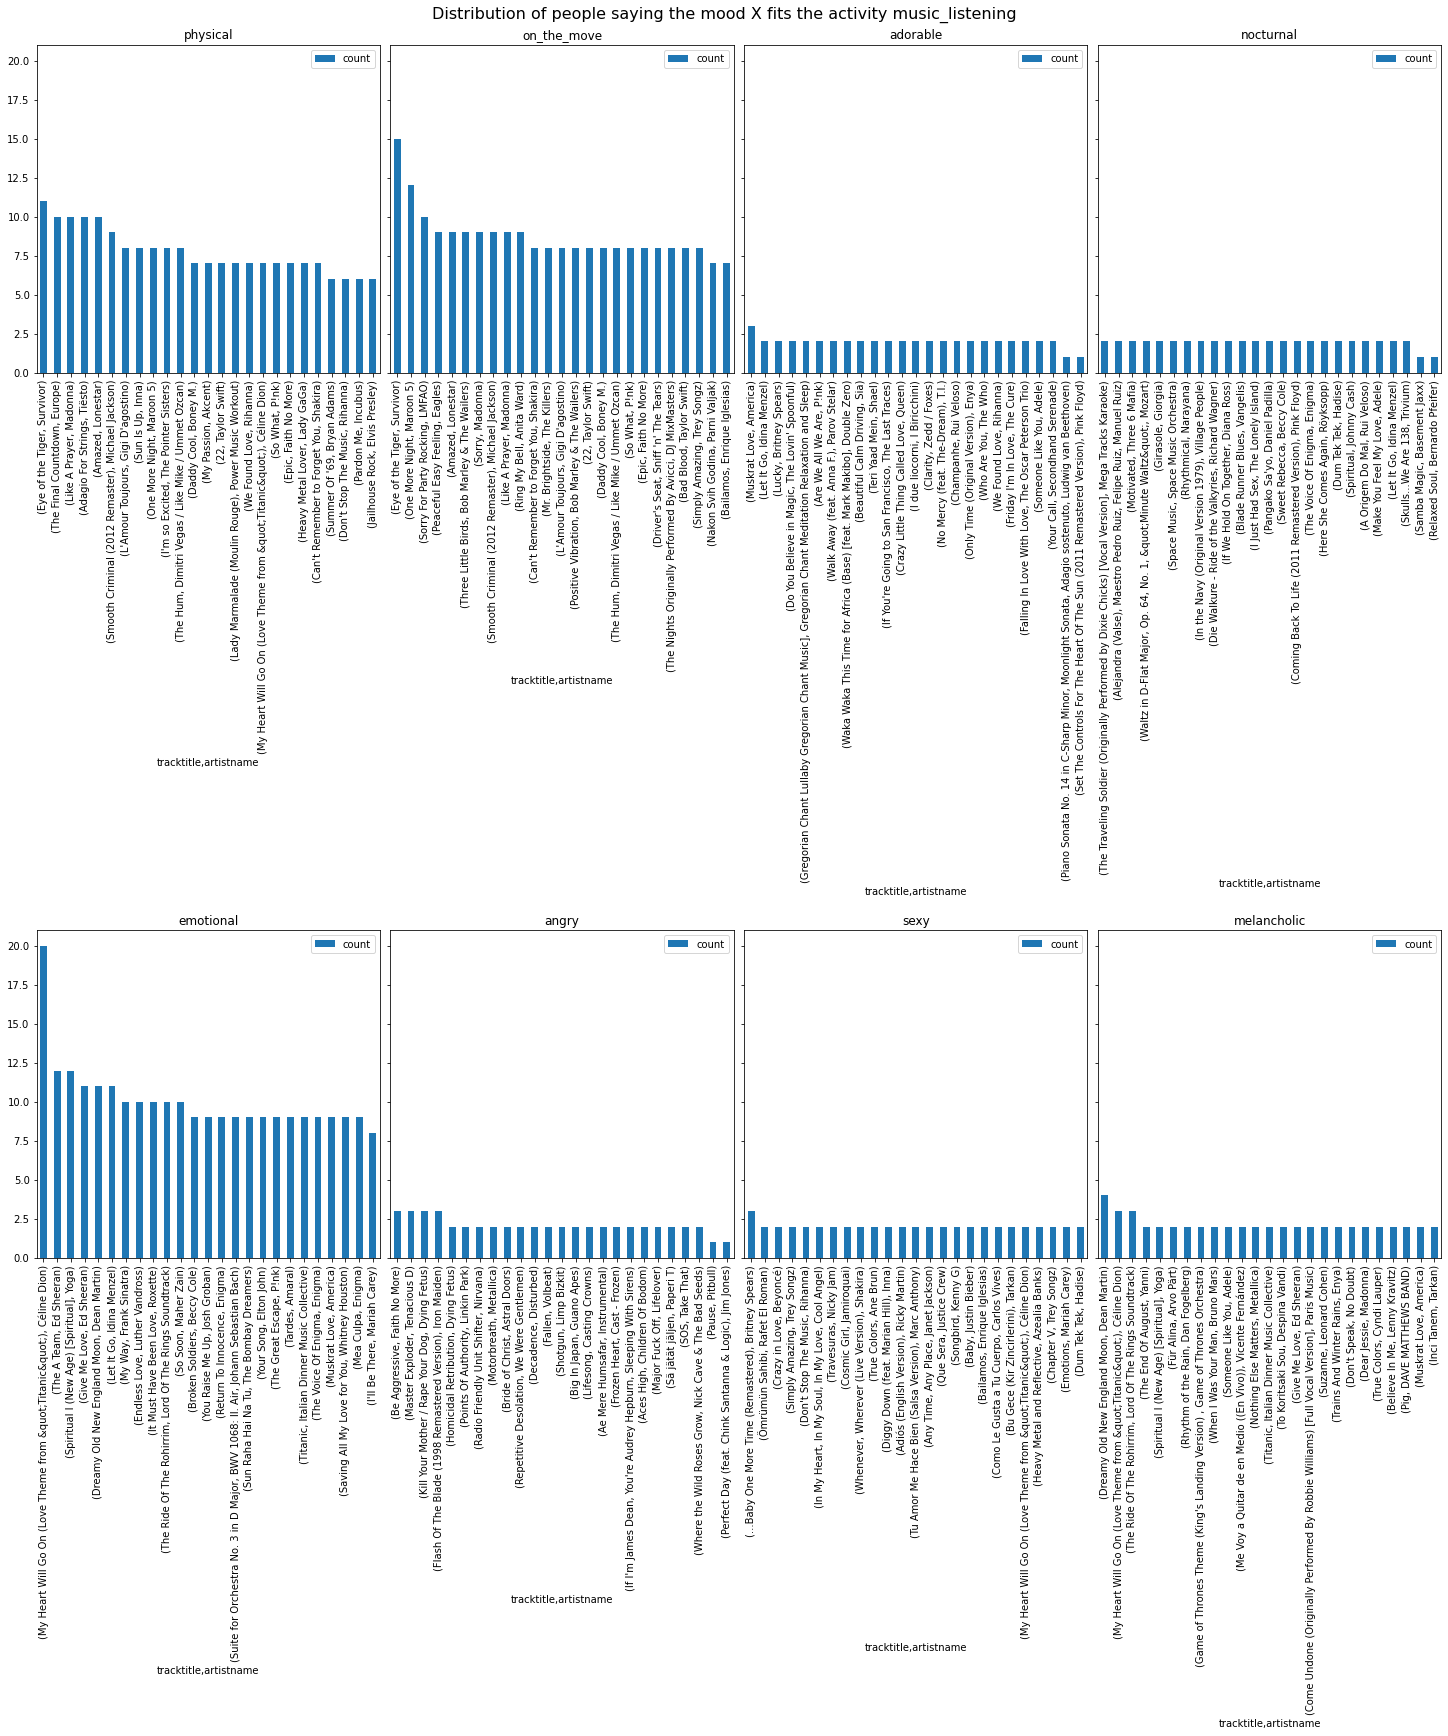

In [383]:
f, ax = plt.subplots(ncols=4, nrows=2, sharey=True, layout='constrained', figsize=(20,24))

physical.reset_index(['researched']).head(25).plot(ax=ax[0,0], kind='bar', rot=90)
on_the_move.reset_index(['researched']).head(25).plot(ax=ax[0,1], kind='bar', rot=90)
adorable.reset_index(['researched']).head(25).plot(ax=ax[0,2], kind='bar', rot=90)
nocturnal.reset_index(['researched']).head(25).plot(ax=ax[0,3], kind='bar', rot=90)
emotional.reset_index(['researched']).head(25).plot(ax=ax[1,0], kind='bar', rot=90)
angry.reset_index(['researched']).head(25).plot(ax=ax[1,1], kind='bar', rot=90)
sexy.reset_index(['researched']).head(25).plot(ax=ax[1,2], kind='bar', rot=90)
melancholic.reset_index(['researched']).head(25).plot(ax=ax[1,3], kind='bar', rot=90)

# Set titles for subplots
ax[0,0].set_title('physical')
ax[0,1].set_title('on_the_move')
ax[0,2].set_title('adorable')
ax[0,3].set_title('nocturnal')
ax[1,0].set_title('emotional')
ax[1,1].set_title('angry')
ax[1,2].set_title('sexy')
ax[1,3].set_title('melancholic')

f.suptitle('Distribution of people saying the mood X fits the activity music_listening', fontsize=16 )
plt.show()

In [386]:
df_tags_rep_unpivot_track_grouped = df_tags_rep_unpivot_fit.groupby(['tracktitle','artistname',  'researched']).agg({'userid':'count'})
df_tags_rep_unpivot_track_grouped.rename(columns = {'userid':'count'}, inplace = True)
df_tags_rep_unpivot_track_grouped.tail(20)

count
tracktitle     artistname     researched            
Ömrümün Sahibi Rafet El Roman intellectual         3
                              liked                1
                              melancholic          1
                              music_listening      2
                              nocturnal            1
                              on_the_move          2
                              passionate           2
                              physical             1
                              pleasant             1
                              relaxed              1
                              romantic             2
                              sensual              1
                              sexual               1
                              sexy                 2
                              slow                 1
                              social               2
                              soft                 2
                              spontaneous          1
                              stylish              1
                              tragic               1

Now I filtered some of the most famous songs, trying to differentiate the genres to see if the moods tagged are the one we might expect to see related to that famous songs.

In [387]:
scomgnr = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'Sweet Child O\' Mine'].sort_values(by='count', ascending=False)
frozen = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'Frozen'].sort_values(by='count', ascending=False)
candyshop = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'Candy Shop'].sort_values(by='count',  ascending=False)
isl = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'Isn\'t She Lovely'].sort_values(by='count',  ascending=False)
slts  = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'Smells Like Teen Spirit'].sort_values(by='count',  ascending=False)
lrpr = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'Last Resort'].sort_values(by='count',  ascending=False)
ite = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'In The End'].sort_values(by='count',  ascending=False)
yclyho = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'You Can Leave Your Hat On'].sort_values(by='count',  ascending=False)
btb = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'Back To Black'].sort_values(by='count',  ascending=False)
wowu = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'With Or Without You'].sort_values(by='count',  ascending=False)
vsvr = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'Vita Spericolata (Live In London)'].sort_values(by='count',  ascending=False)
scmj = df_tags_rep_unpivot_track_grouped.loc[df_tags_rep_unpivot_track_grouped.index.get_level_values(0) == 'Smooth Criminal (2012 Remaster)'].sort_values(by='count',  ascending=False)

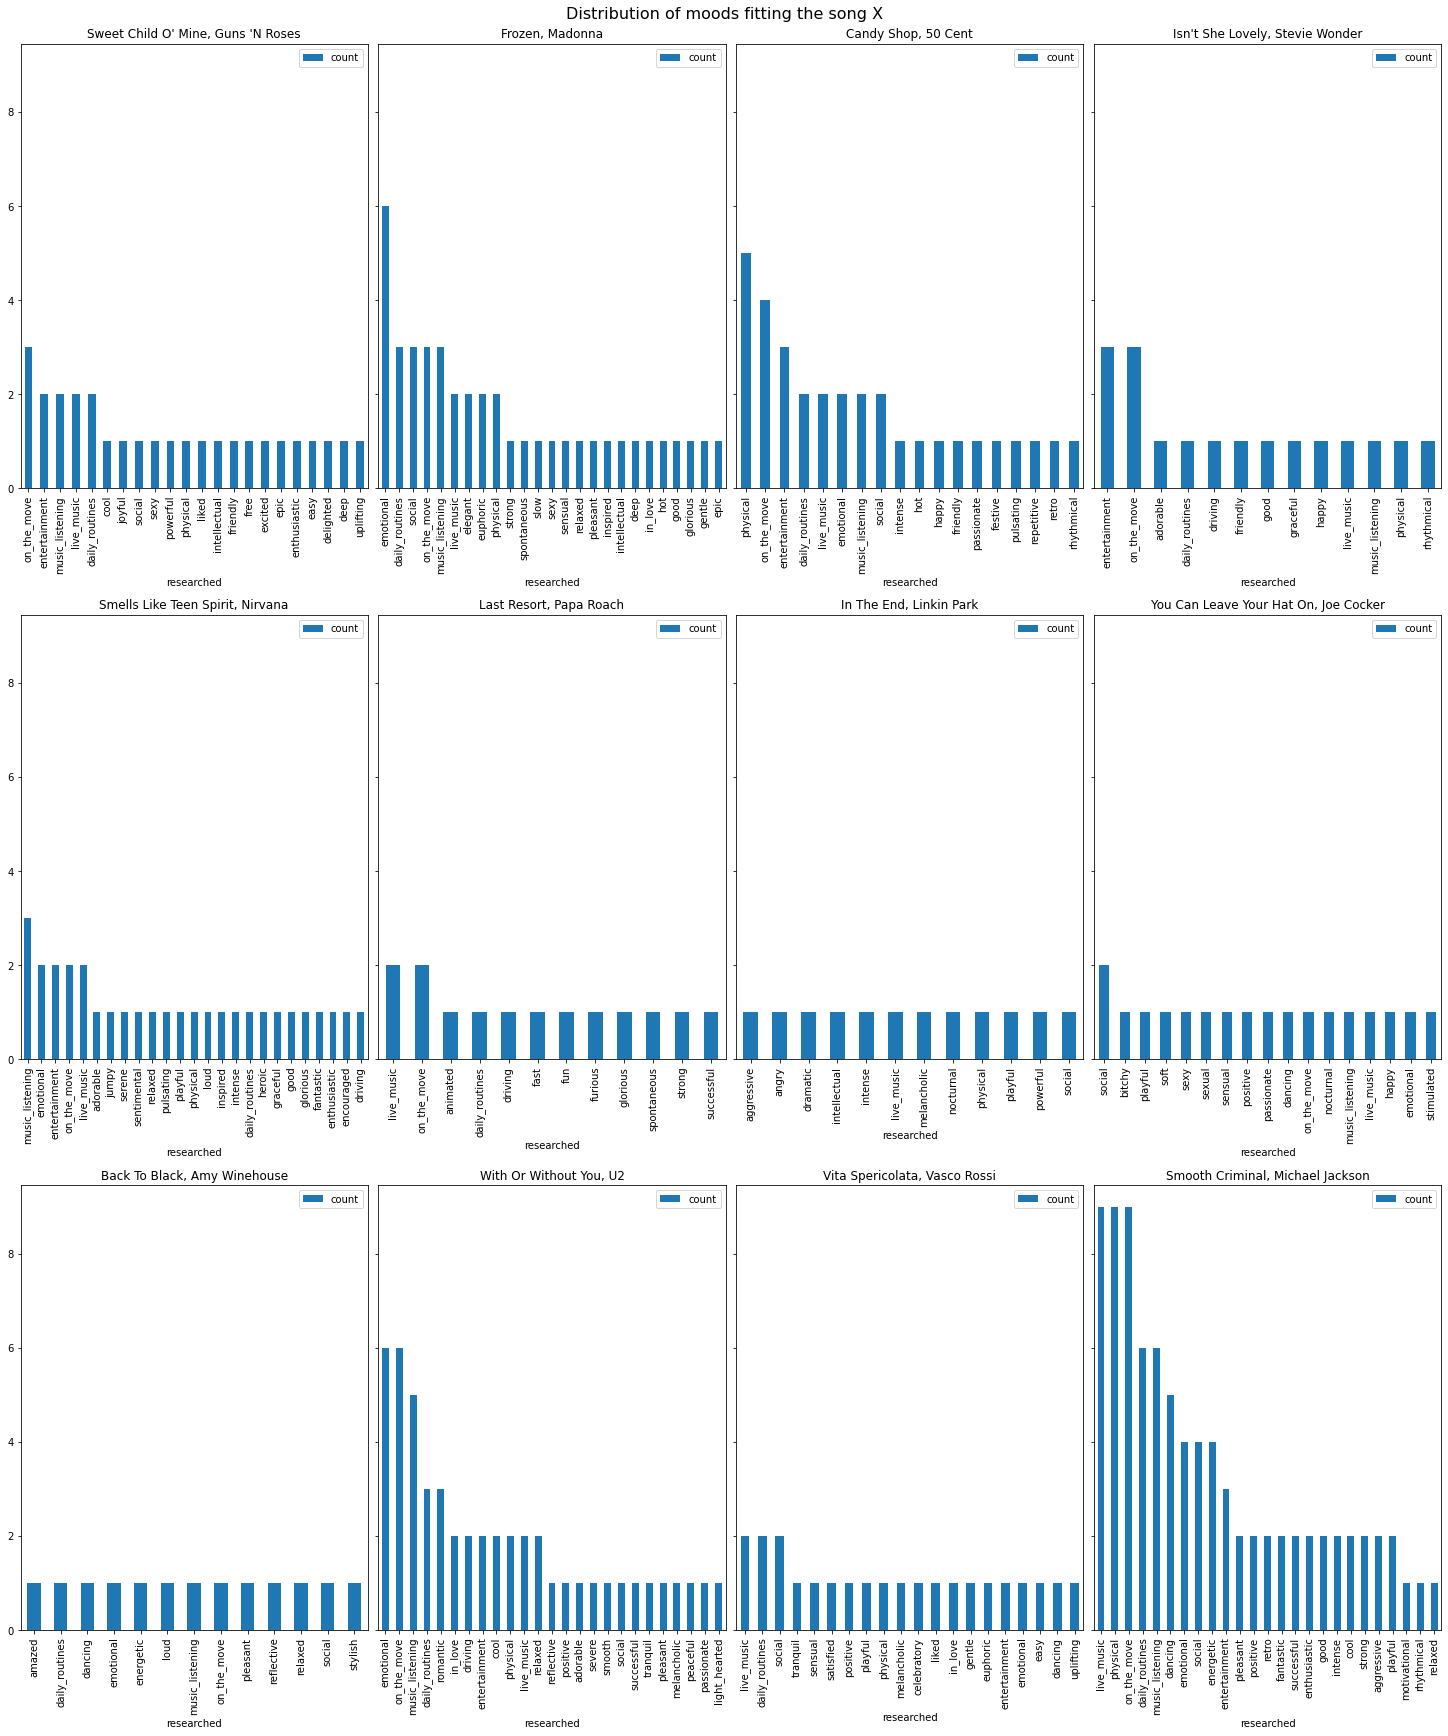

In [388]:
f, ax = plt.subplots(ncols=4, nrows=3, sharey=True, layout='constrained', figsize=(20,24))

scomgnr.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[0,0], kind='bar', rot=90)
frozen.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[0,1], kind='bar', rot=90)
candyshop.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[0,2], kind='bar', rot=90)
isl.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[0,3], kind='bar', rot=90)
slts.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[1,0], kind='bar', rot=90)
lrpr.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[1,1], kind='bar', rot=90)
ite.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[1,2], kind='bar', rot=90)
yclyho.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[1,3], kind='bar', rot=90)
btb.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[2,0], kind='bar', rot=90)
wowu.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[2,1], kind='bar', rot=90)
vsvr.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[2,2], kind='bar', rot=90)
scmj.reset_index(['tracktitle','artistname']).head(25).plot(ax=ax[2,3], kind='bar', rot=90)

# Set titles for subplots
ax[0,0].set_title('Sweet Child O\' Mine, Guns \'N Roses')
ax[0,1].set_title('Frozen, Madonna')
ax[0,2].set_title('Candy Shop, 50 Cent')
ax[0,3].set_title('Isn\'t She Lovely, Stevie Wonder')
ax[1,0].set_title('Smells Like Teen Spirit, Nirvana')
ax[1,1].set_title('Last Resort, Papa Roach')
ax[1,2].set_title('In The End, Linkin Park')
ax[1,3].set_title('You Can Leave Your Hat On, Joe Cocker')
ax[2,0].set_title('Back To Black, Amy Winehouse')
ax[2,1].set_title('With Or Without You, U2')
ax[2,2].set_title('Vita Spericolata, Vasco Rossi')
ax[2,3].set_title('Smooth Criminal, Michael Jackson')

f.suptitle('Distribution of moods fitting the song X', fontsize=16 )
plt.show()